# Cluster and Cloud Computing Assignment 2 - Big Data Analytics on the Cloud
**Note**: Before executing this notebook's code, you must first run:

```bash
kubectl port-forward service/router -n fission 8080:80
```
## Scenario 1: AFL Analysis
#### Data: Reddit and Bluesky
#### Analytics：
- Overall Comparative Analytics of Posts from Reddit and Bluesky 
- Cross-Platform Sentiment Comparison: Top/Bottom 5 Teams by Total Sentiment Score
- Cross-Platform Sentiment Trends and Match Results Comparison after 2024 (by week) for Top/Bottom 5 Team
- Cross-Platform Sentiment Trends and Match Win Rates Comparison in 2024 for Top/Bottom 5 Team
- Home Advantage Analytics
- Cross-Platform Subscribers Comparison: Top/Bottom 5 Teams by Number of Subscribers
- Sentiments and Subscribers Analytics after 2025-05-01 (by day) for Top/Bottom 5 Team

In [213]:
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from adjustText import adjust_text
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid") 
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['legend.frameon'] = True 

### 1. Overall Comparative Analytics of Posts from Reddit and Bluesky
#### 1.1 Comparison of Post Volumes

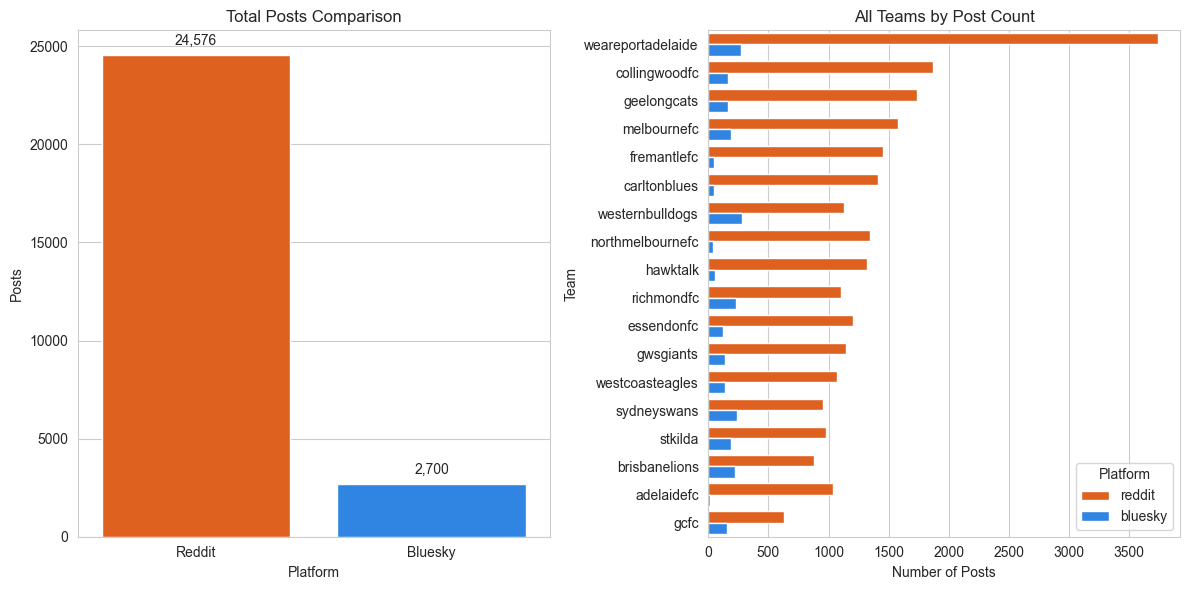

In [215]:
response = requests.get('http://localhost:8080/afl/post/comparison')
data = response.json()

# Prepare data
total_posts = pd.DataFrame({
    'Platform': ['Reddit', 'Bluesky'],
    'Posts': [data['total_posts']['reddit'], data['total_posts']['bluesky']]
})

team_comparison = pd.DataFrame(data['team_comparison'])
all_teams = team_comparison['name'].tolist()

# Comparison of total number of posts
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
ax1 = sns.barplot(x='Platform', y='Posts', data=total_posts, palette=['#FF5700', '#1184FF'])
plt.title('Total Posts Comparison')
for p in ax1.patches:
    ax1.annotate(f"{p.get_height():,.0f}", 
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Comparison of the number of posts of each team
plt.subplot(1, 2, 2)
comparison_melted = team_comparison[team_comparison['name'].isin(all_teams)].melt(
    id_vars='name', 
    value_vars=['reddit_posts', 'bluesky_posts'],
    var_name='Platform', 
    value_name='Posts'
)
comparison_melted['Platform'] = comparison_melted['Platform'].str.replace('_posts', '')

ax2 = sns.barplot(x='Posts', y='name', hue='Platform', data=comparison_melted,
                 palette={'reddit': '#FF5700', 'bluesky': '#1184FF'})
plt.title('All Teams by Post Count')
plt.ylabel('Team')
plt.xlabel('Number of Posts')
plt.legend(title='Platform')

plt.tight_layout()
plt.show()

#### 1.2 Comparison of Sentiment Scores

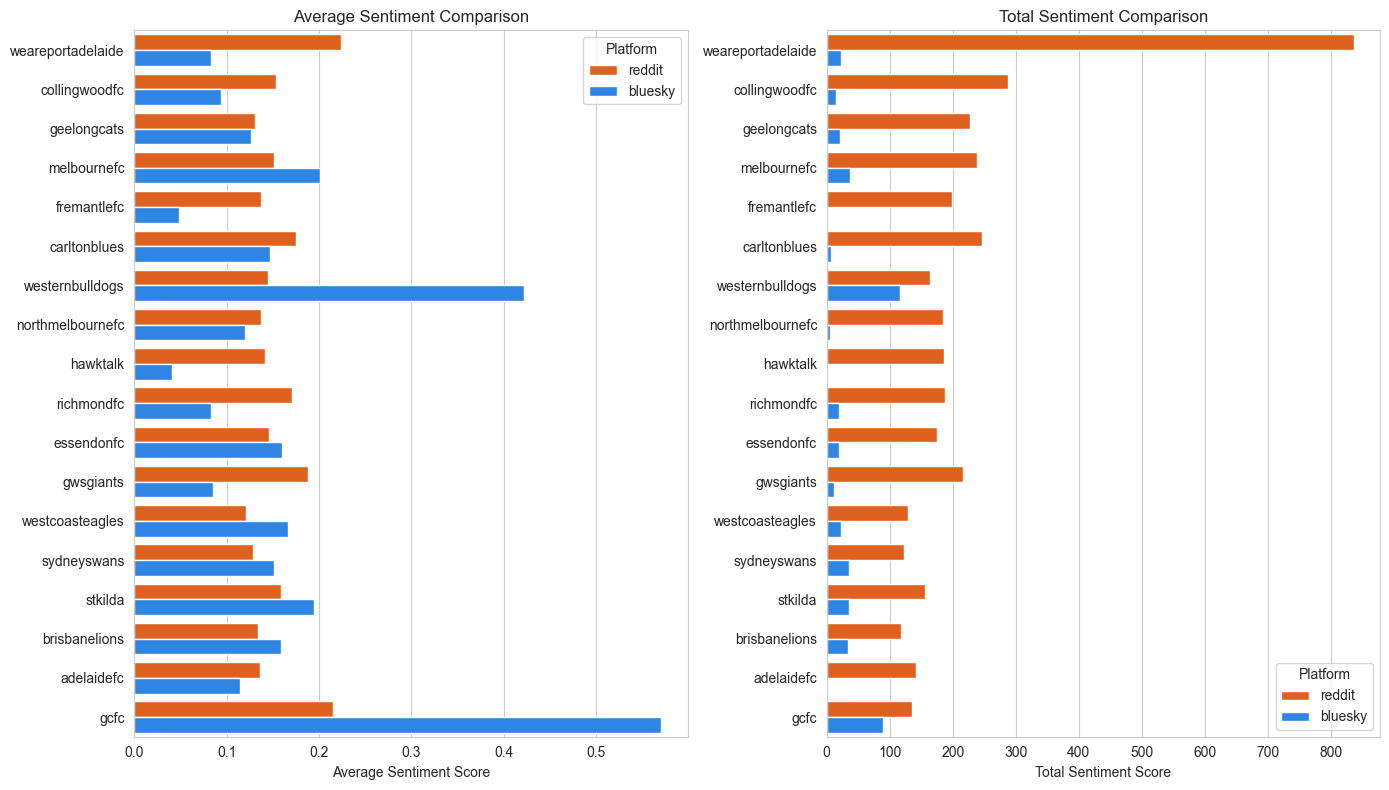

In [217]:
# Sentiment comparison
plt.figure(figsize=(14, 8))

# Average
plt.subplot(1, 2, 1)
avg_sentiment = team_comparison[team_comparison['name'].isin(all_teams)].melt(
    id_vars='name',
    value_vars=['reddit_avg_sentiment', 'bluesky_avg_sentiment'],
    var_name='Platform',
    value_name='Avg_Sentiment'
)
avg_sentiment['Platform'] = avg_sentiment['Platform'].str.replace('_avg_sentiment', '')

sns.barplot(x='Avg_Sentiment', y='name', hue='Platform', data=avg_sentiment,
           palette={'reddit': '#FF5700', 'bluesky': '#1184FF'})
plt.title('Average Sentiment Comparison')
plt.ylabel('')
plt.xlabel('Average Sentiment Score')
plt.legend(title='Platform')

# Total
plt.subplot(1, 2, 2)
total_sentiment = team_comparison[team_comparison['name'].isin(all_teams)].melt(
    id_vars='name',
    value_vars=['reddit_total_sentiment', 'bluesky_total_sentiment'],
    var_name='Platform',
    value_name='Total_Sentiment'
)
total_sentiment['Platform'] = total_sentiment['Platform'].str.replace('_total_sentiment', '')

sns.barplot(x='Total_Sentiment', y='name', hue='Platform', data=total_sentiment,
           palette={'reddit': '#FF5700', 'bluesky': '#1184FF'})
plt.title('Total Sentiment Comparison')
plt.ylabel('')
plt.xlabel('Total Sentiment Score')
plt.legend(title='Platform')

plt.tight_layout()
plt.show()

### 2. Cross-Platform Sentiment Comparison: Top/Bottom 5 Teams by Total Sentiment Score
#### Reddit

==== The top 5 teams with the highest total sentiments from Reddit ====
             name  Total-sentiment  Average-sentiment  Number of posts
weareportadelaide       836.121901           0.223682             3738
    collingwoodfc       287.658300           0.153910             1869
     carltonblues       246.992899           0.174800             1413
      melbournefc       239.180301           0.151284             1581
      geelongcats       226.703900           0.130365             1739

==== The top 5 teams with the lowest total sentiments from Reddit ====
           name  Total-sentiment  Average-sentiment  Number of posts
  brisbanelions         117.1154           0.133846              875
    sydneyswans         122.1055           0.128397              951
westcoasteagles         129.4275           0.121187             1068
           gcfc         135.5463           0.214812              631
     adelaidefc         141.2073           0.136038             1038


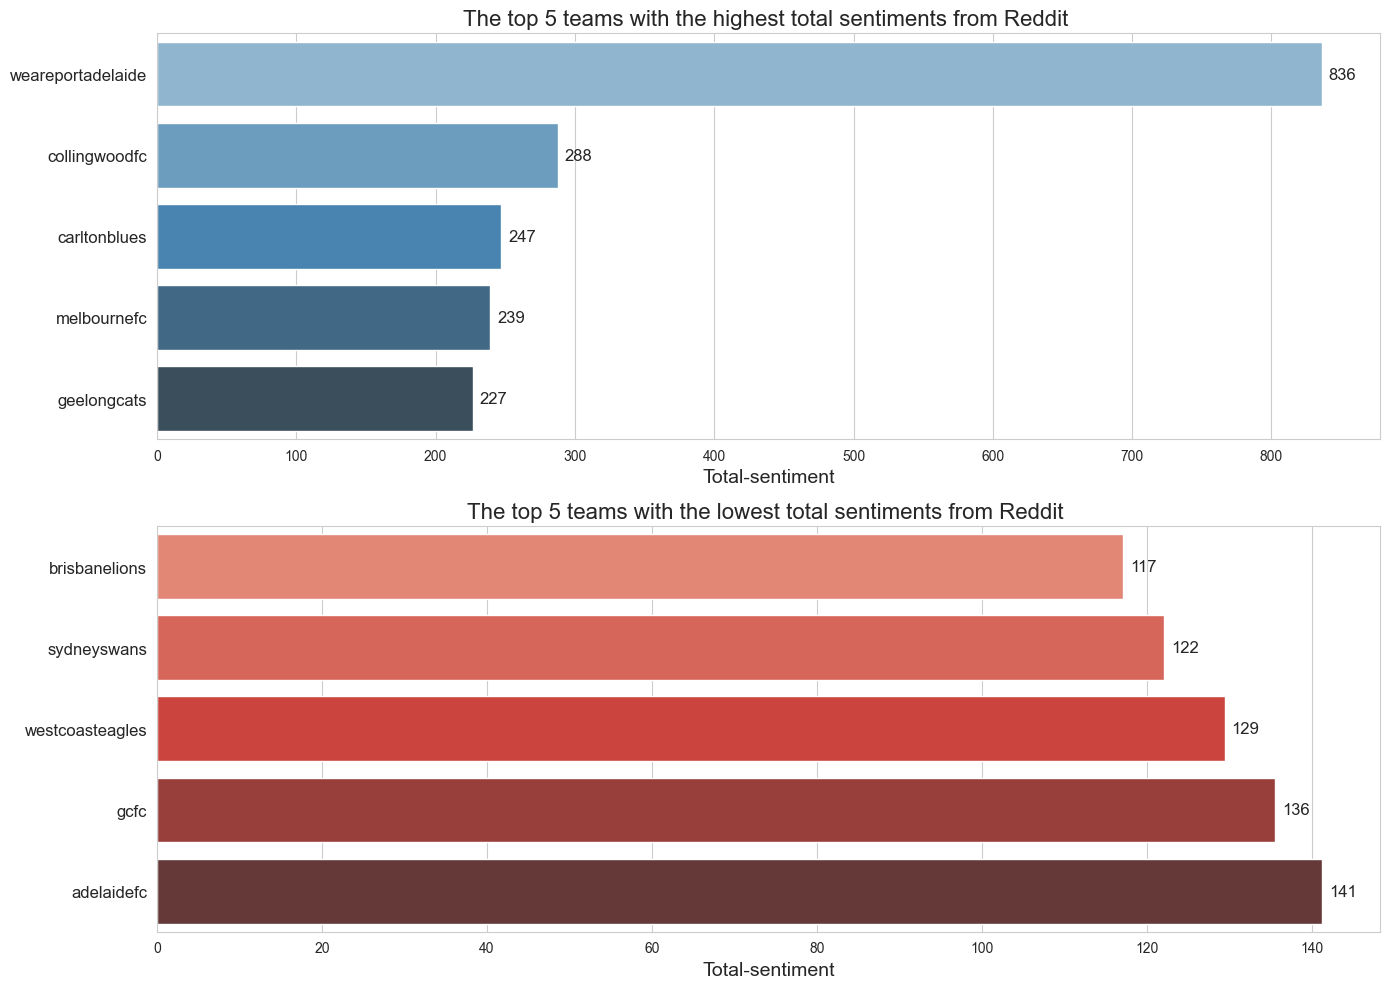

In [219]:
response = requests.get('http://localhost:8080/afl/sentiment/reddit')
data = response.json()

if 'top_5_teams_reddit' not in data:
    print("Error:", data.get('error', 'data error'))
else:
    # Create DataFrame
    top_df_reddit = pd.DataFrame(data['top_5_teams_reddit'])
    bottom_df_reddit = pd.DataFrame(data['bottom_5_teams_reddit'])
    all_df_reddit = pd.DataFrame(data['all_teams_reddit'])  # All teams data
    
    # Print result
    print("==== The top 5 teams with the highest total sentiments from Reddit ====")
    print(top_df_reddit[['name', 'total_sentiment_reddit', 'avg_sentiment_reddit', 'doc_count_reddit']]
          .rename(columns={
              'total_sentiment_reddit': 'Total-sentiment',
              'avg_sentiment_reddit': 'Average-sentiment',
              'doc_count_reddit': 'Number of posts'
          }).to_string(index=False))
    
    print("\n==== The top 5 teams with the lowest total sentiments from Reddit ====")
    print(bottom_df_reddit[['name', 'total_sentiment_reddit', 'avg_sentiment_reddit', 'doc_count_reddit']]
          .rename(columns={
              'total_sentiment_reddit': 'Total-sentiment',
              'avg_sentiment_reddit': 'Average-sentiment',
              'doc_count_reddit': 'Number of posts'
          }).to_string(index=False))
    
plt.figure(figsize=(14, 10))

# top 5
plt.subplot(2, 1, 1)
ax1 = sns.barplot(x='total_sentiment_reddit', y='name', data=top_df_reddit, palette='Blues_d')
plt.title('The top 5 teams with the highest total sentiments from Reddit ', fontsize=16)
plt.xlabel('Total-sentiment', fontsize=14)
plt.ylabel('')
ax1.set_yticklabels(top_df_reddit['name'], fontsize=12)

for p in ax1.patches:
    ax1.annotate(f"{p.get_width():.0f}", 
                (p.get_width(), p.get_y() + p.get_height()/2),
                ha='left', va='center',
                xytext=(5, 0),  # Offset from bar end
                textcoords='offset points',
                fontsize=12)

# bottom 5
plt.subplot(2, 1, 2)
ax2 = sns.barplot(x='total_sentiment_reddit', y='name', data=bottom_df_reddit, palette='Reds_d')
plt.title('The top 5 teams with the lowest total sentiments from Reddit ', fontsize=16)
plt.xlabel('Total-sentiment', fontsize=14)
plt.ylabel('')
ax2.set_yticklabels(bottom_df_reddit['name'], fontsize=12)

for p in ax2.patches:
    ax2.annotate(f"{p.get_width():.0f}", 
                (p.get_width(), p.get_y() + p.get_height()/2),
                ha='left', va='center',
                xytext=(5, 0),  # Offset from bar end
                textcoords='offset points',
                fontsize=12)

plt.tight_layout()
plt.show()

#### Bluesky

==== The top 5 teams with the highest total sentiments from Bluesky ====
           name  Total-sentiment  Average-sentiment  Number of posts
westernbulldogs       116.404003           0.421754              276
           gcfc        89.003001           0.570532              156
    melbournefc        37.278000           0.201503              185
        stkilda        36.132000           0.194258              186
    sydneyswans        35.796000           0.151038              237

==== The top 5 teams with the lowest total sentiments from Bluesky ====
            name  Total-sentiment  Average-sentiment  Number of posts
      adelaidefc            1.944           0.114353               17
     fremantlefc            2.277           0.048447               47
        hawktalk            2.347           0.040466               58
northmelbournefc            4.917           0.119927               41
    carltonblues            7.358           0.147160               50


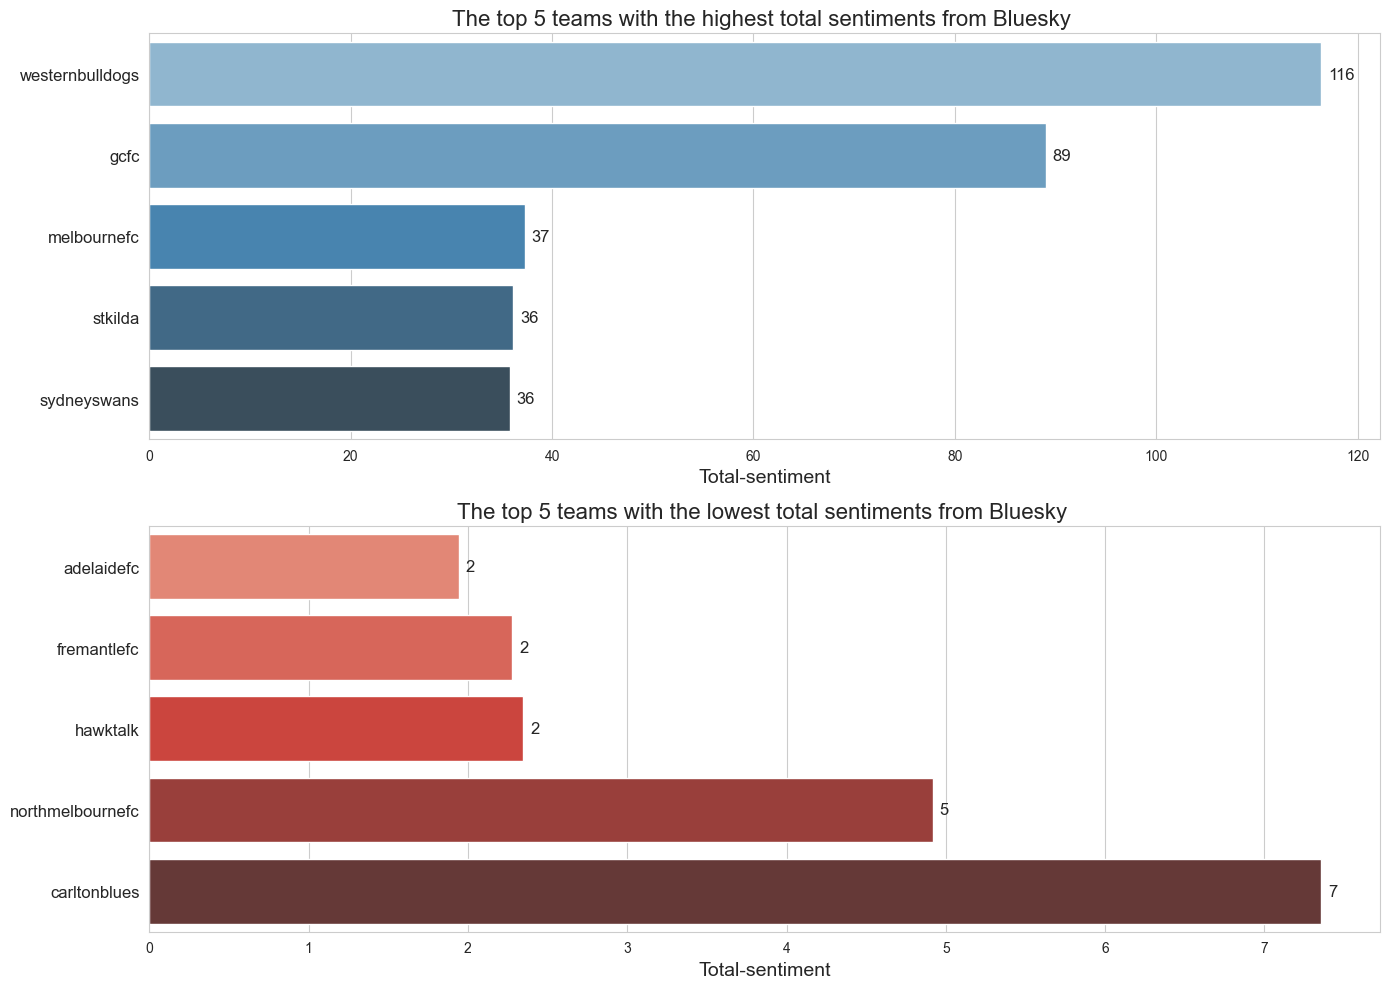

In [221]:
response = requests.get('http://localhost:8080/afl/sentiment/bluesky')
data = response.json()

if 'top_5_teams_bluesky' not in data:
    print("Error:", data.get('error', 'data error'))
else:
    # Create DataFrame
    top_df_bluesky = pd.DataFrame(data['top_5_teams_bluesky'])
    bottom_df_bluesky = pd.DataFrame(data['bottom_5_teams_bluesky'])
    all_df_bluesky = pd.DataFrame(data['all_teams_bluesky'])  # All teams data
    
    # Print result
    print("==== The top 5 teams with the highest total sentiments from Bluesky ====")
    print(top_df_bluesky[['name', 'total_sentiment_bluesky', 'avg_sentiment_bluesky', 'doc_count_bluesky']]
          .rename(columns={
              'total_sentiment_bluesky': 'Total-sentiment',
              'avg_sentiment_bluesky': 'Average-sentiment',
              'doc_count_bluesky': 'Number of posts'
          }).to_string(index=False))
    
    print("\n==== The top 5 teams with the lowest total sentiments from Bluesky ====")
    print(bottom_df_bluesky[['name', 'total_sentiment_bluesky', 'avg_sentiment_bluesky', 'doc_count_bluesky']]
          .rename(columns={
              'total_sentiment_bluesky': 'Total-sentiment',
              'avg_sentiment_bluesky': 'Average-sentiment',
              'doc_count_bluesky': 'Number of posts'
          }).to_string(index=False))

plt.figure(figsize=(14, 10))

# top 5
plt.subplot(2, 1, 1)
ax1 = sns.barplot(x='total_sentiment_bluesky', y='name', data=top_df_bluesky, palette='Blues_d')
plt.title('The top 5 teams with the highest total sentiments from Bluesky ', fontsize=16)
plt.xlabel('Total-sentiment', fontsize=14)
plt.ylabel('')
ax1.set_yticklabels(top_df_bluesky['name'], fontsize=12)

for p in ax1.patches:
    ax1.annotate(f"{p.get_width():.0f}", 
                (p.get_width(), p.get_y() + p.get_height()/2),
                ha='left', va='center',
                xytext=(5, 0),  # Offset from bar end
                textcoords='offset points',
                fontsize=12)

# bottom 5
plt.subplot(2, 1, 2)
ax2 = sns.barplot(x='total_sentiment_bluesky', y='name', data=bottom_df_bluesky, palette='Reds_d')
plt.title('The top 5 teams with the lowest total sentiments from Bluesky ', fontsize=16)
plt.xlabel('Total-sentiment', fontsize=14)
plt.ylabel('')
ax2.set_yticklabels(bottom_df_bluesky['name'], fontsize=12)

for p in ax2.patches:
    ax2.annotate(f"{p.get_width():.0f}", 
                (p.get_width(), p.get_y() + p.get_height()/2),
                ha='left', va='center',
                xytext=(5, 0),  # Offset from bar end
                textcoords='offset points',
                fontsize=12)

plt.tight_layout()
plt.show()

### 3. Cross-Platform Sentiment Trends and Match Results Comparison after 2024 (by week) for Top/Bottom 5 Team
#### Reddit
- Average sentiment trends and match results after 2024 (by week) for top 5 teams


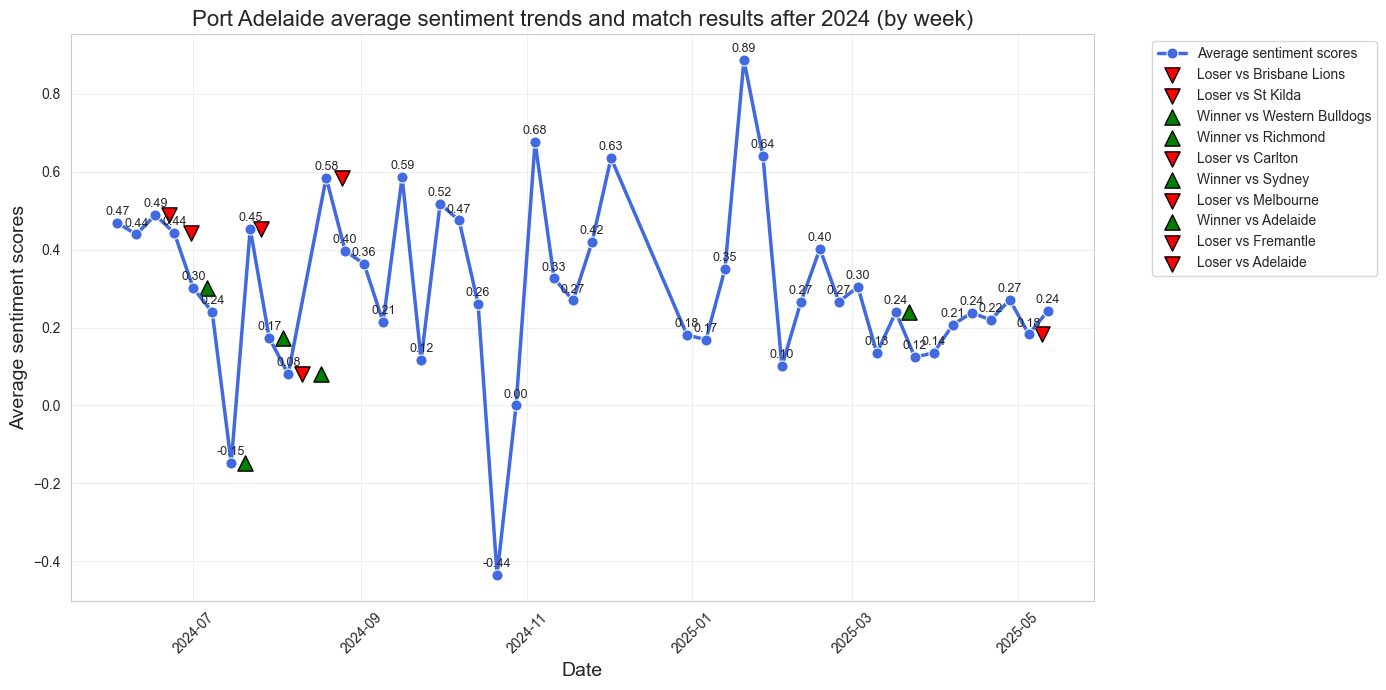

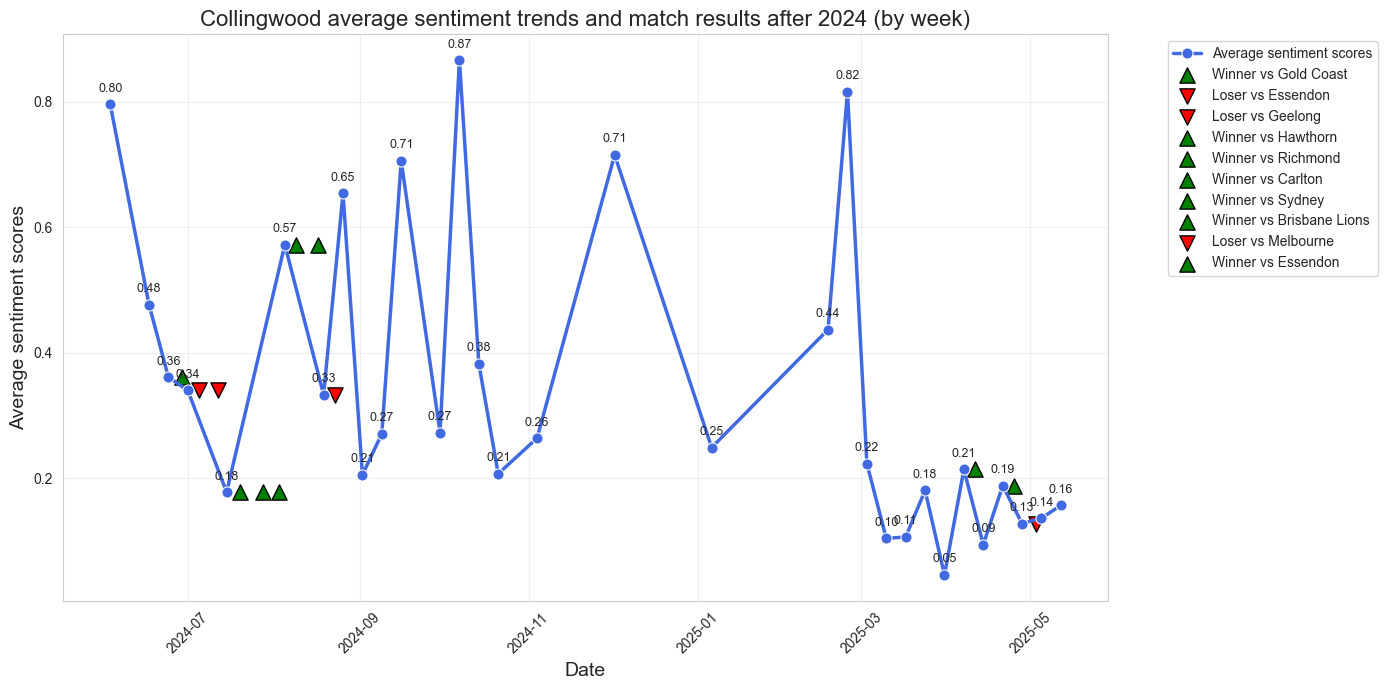

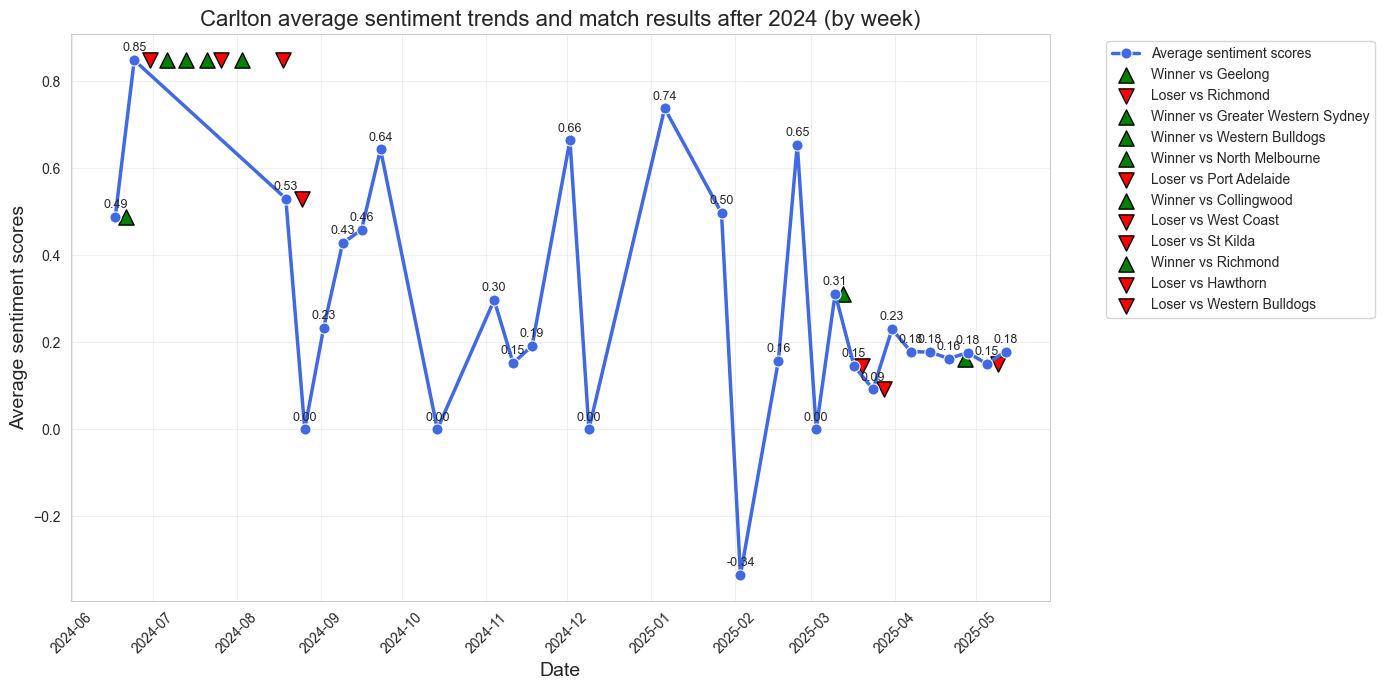

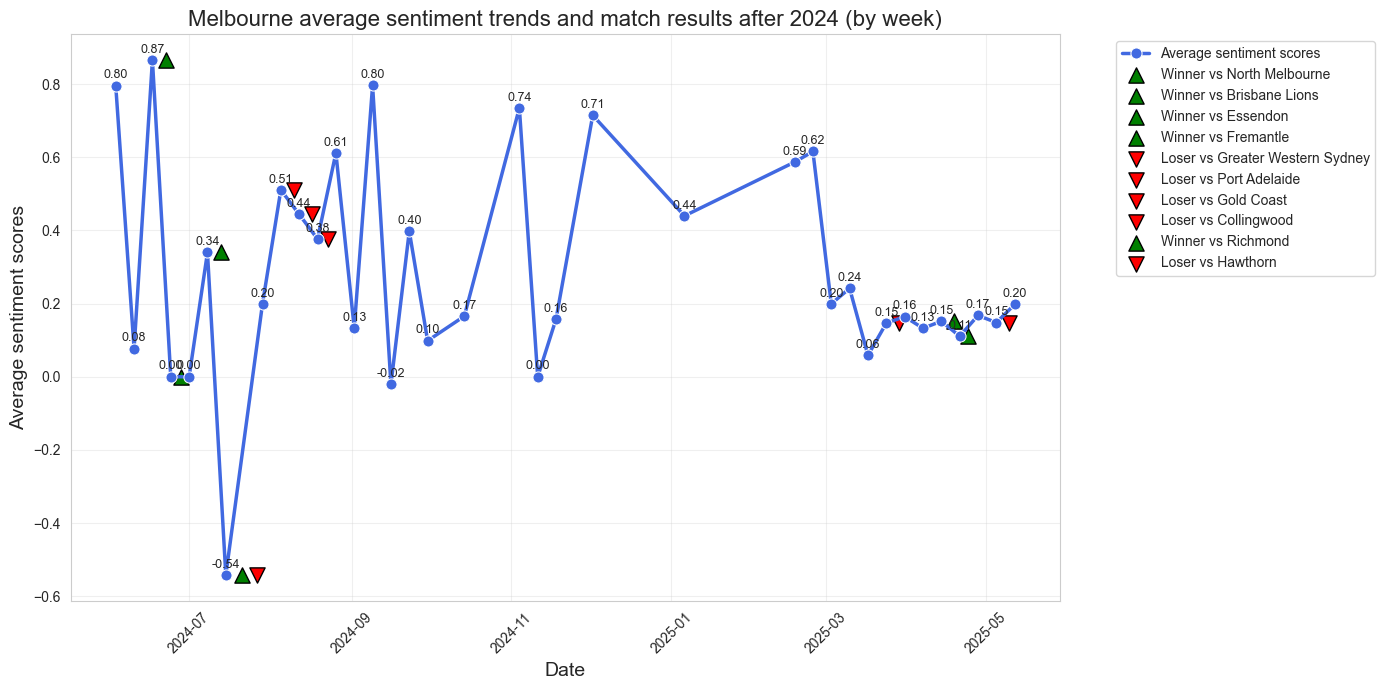

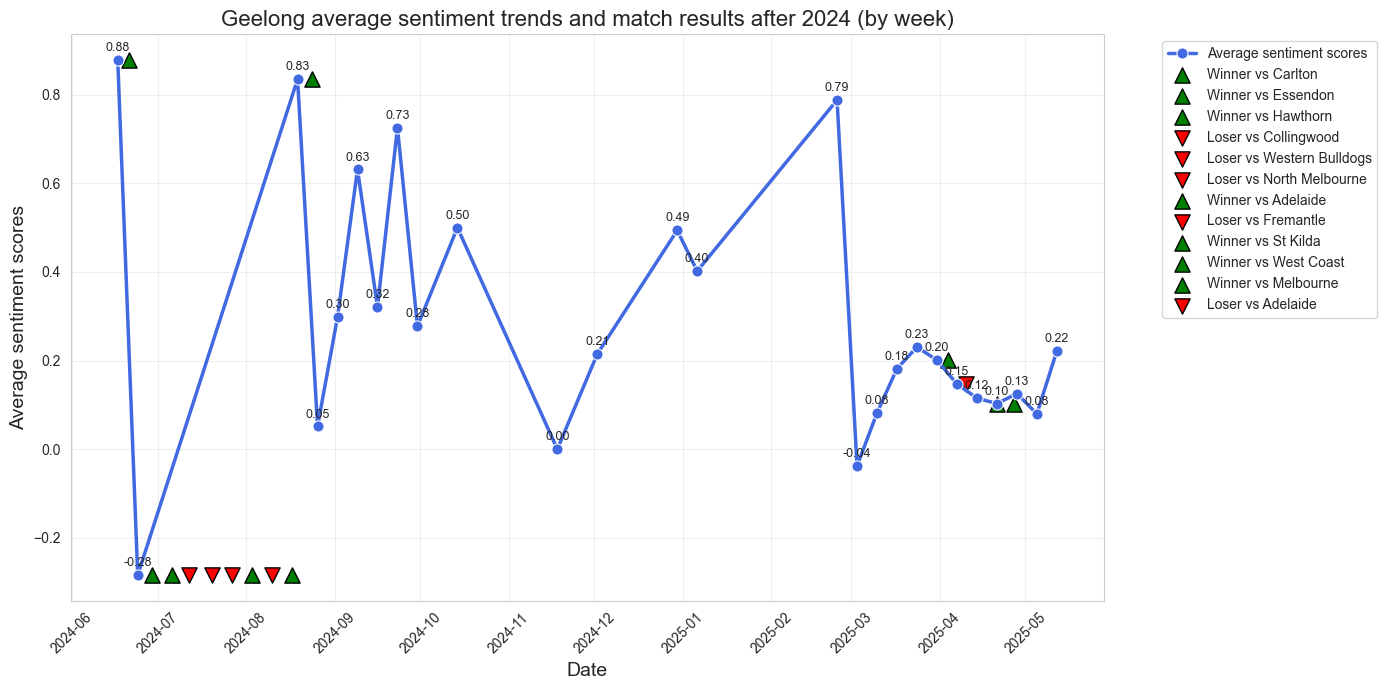

In [223]:
# Average sentiment trends and match results after 2024 (by week) for top 5 teams
response = requests.get('http://localhost:8080/afl/result/sentiment/reddit', headers={'X-Date-Format': 'week'})
data = response.json()

# Extract data
sentiment_data = data['sentiment_data']
all_teams = sentiment_data['all_teams']
top_teams_data = sentiment_data['top_5']
TEAM_MAPPING = data['team_mapping']
top_teams = [TEAM_MAPPING.get(t['name'], t['name']) for t in top_teams_data]

# Create a sentiment time series DataFrame and standardise the team names
time_dfs = []
for team in all_teams:
    df = pd.DataFrame(team['time_series'])
    standardised_name = TEAM_MAPPING.get(team['name'], team['name'])
    df['team'] = standardised_name
    time_dfs.append(df)
time_df = pd.concat(time_dfs)
time_df['date'] = pd.to_datetime(time_df['date'])
time_df = time_df[time_df['date'] >= '2024-01-01']

# Prepare match data and standardise team names
matches_df = pd.DataFrame(data['match_data'])
matches_df['date'] = pd.to_datetime(matches_df['date'].str.split().str[0])
matches_df['team'] = matches_df['team'].apply(lambda x: TEAM_MAPPING.get(x, x))

# Create a chart for each top 5 team
for team in top_teams:
    plt.figure(figsize=(14, 7))

    team_sentiment = time_df[time_df['team'] == team]
    if team_sentiment.empty:
        print(f"[Warning] cannot find sentiment data of {team}, skip.")
        continue

    sns.lineplot(x='date', y='avg_sentiment', 
                 data=team_sentiment, 
                 color='royalblue',
                 linewidth=2.5,
                 marker='o',
                 markersize=8,
                 label='Average sentiment scores')

    team_matches = matches_df[matches_df['team'] == team].sort_values('date')
    for _, match in team_matches.iterrows():
        # Find the sentiment data point closest to the date before the game
        past_data = team_sentiment[team_sentiment['date'] <= match['date']]
        if past_data.empty:
            continue
        closest_idx = past_data['date'].idxmax()
        sentiment_value = team_sentiment.loc[closest_idx, 'avg_sentiment']

        # Mark the results of the match
        if match['result'] == "Winner":
            marker = '^'
            color = 'green'
            label = f"Winner vs {match['opponent']}"
        elif match['result'] == "Loser":
            marker = 'v'
            color = 'red'
            label = f"Loser vs {match['opponent']}"
        else:
            marker = 'o'
            color = 'gray'
            label = f"Draw vs {match['opponent']}"

        plt.scatter(match['date'], sentiment_value,
                    marker=marker, color=color, s=120,
                    edgecolors='black', linewidths=1,
                    label=label)

    # Marking Values
    for _, row in team_sentiment.iterrows():
        plt.text(row['date'], row['avg_sentiment'] + 0.02,
                 f"{row['avg_sentiment']:.2f}",
                 fontsize=9, ha='center')

    plt.title(f'{team} average sentiment trends and match results after 2024 (by week)', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Average sentiment scores', fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)

    # Remove duplicate legends
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(),
               bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    plt.show()

- Average sentiment trends and match results after 2024 (by week) for bottom 5 teams

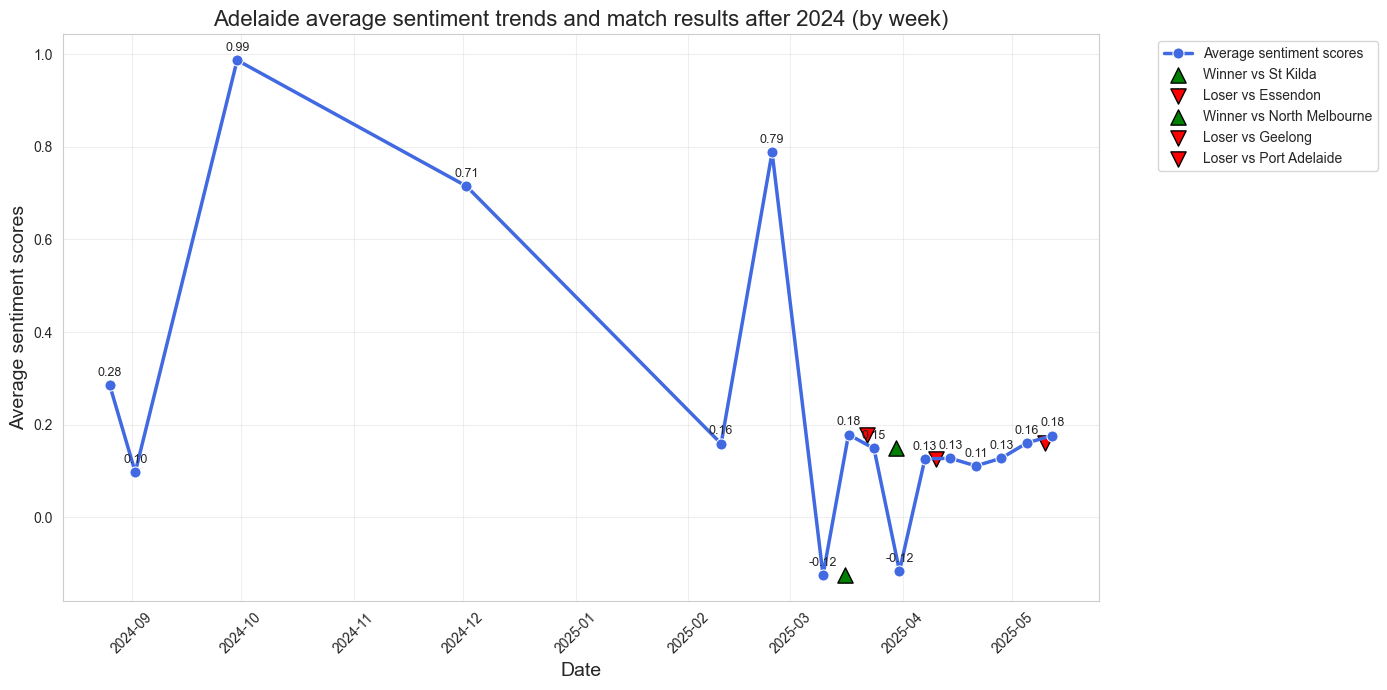

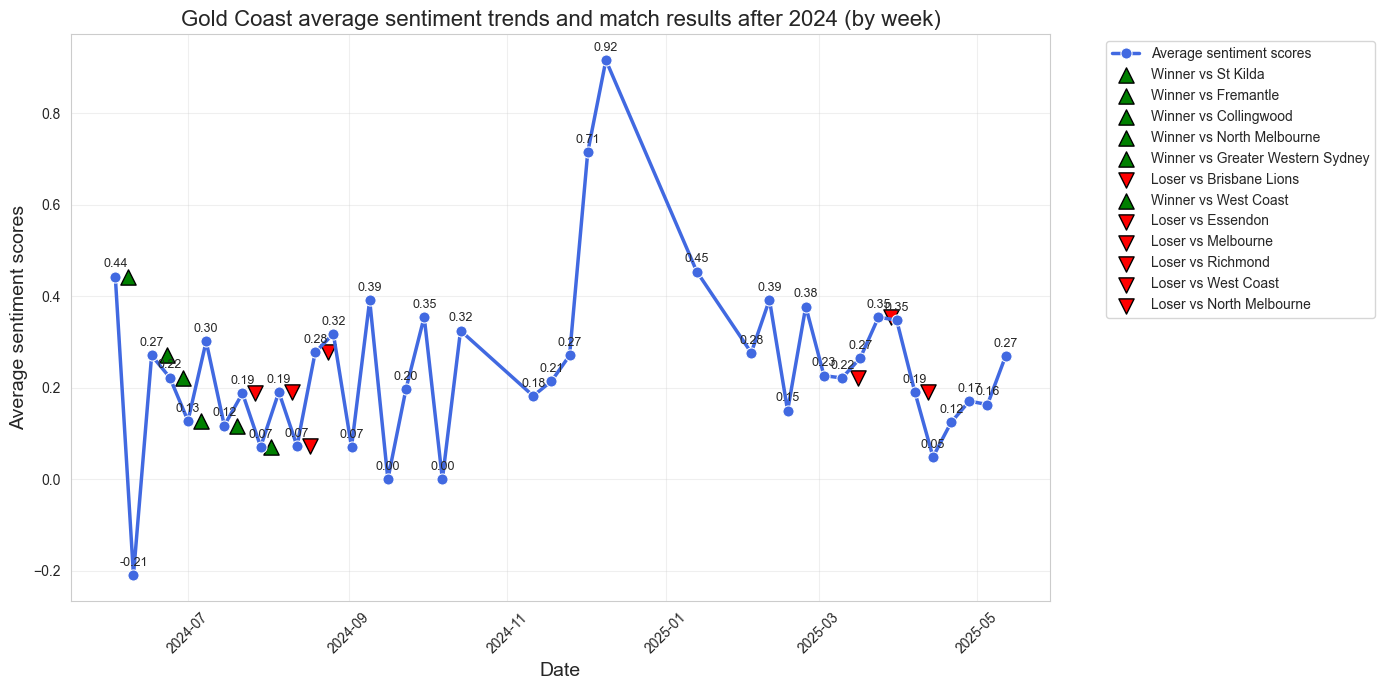

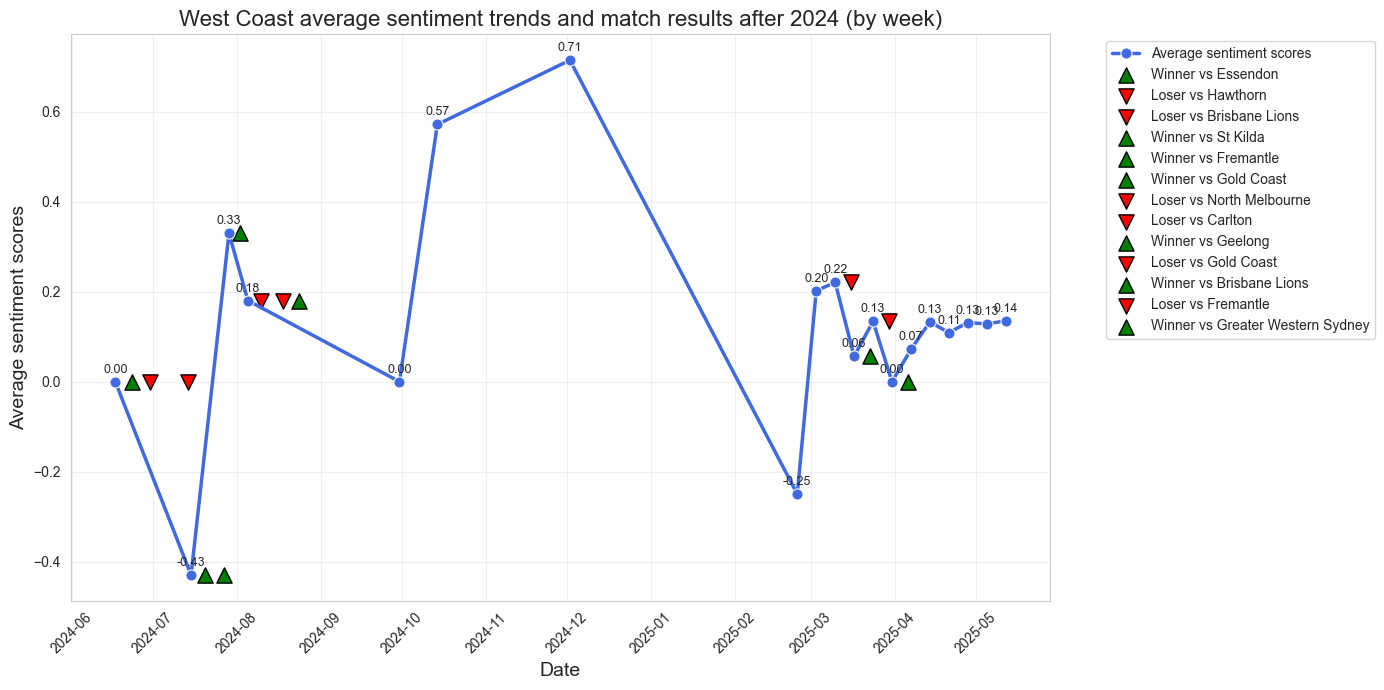

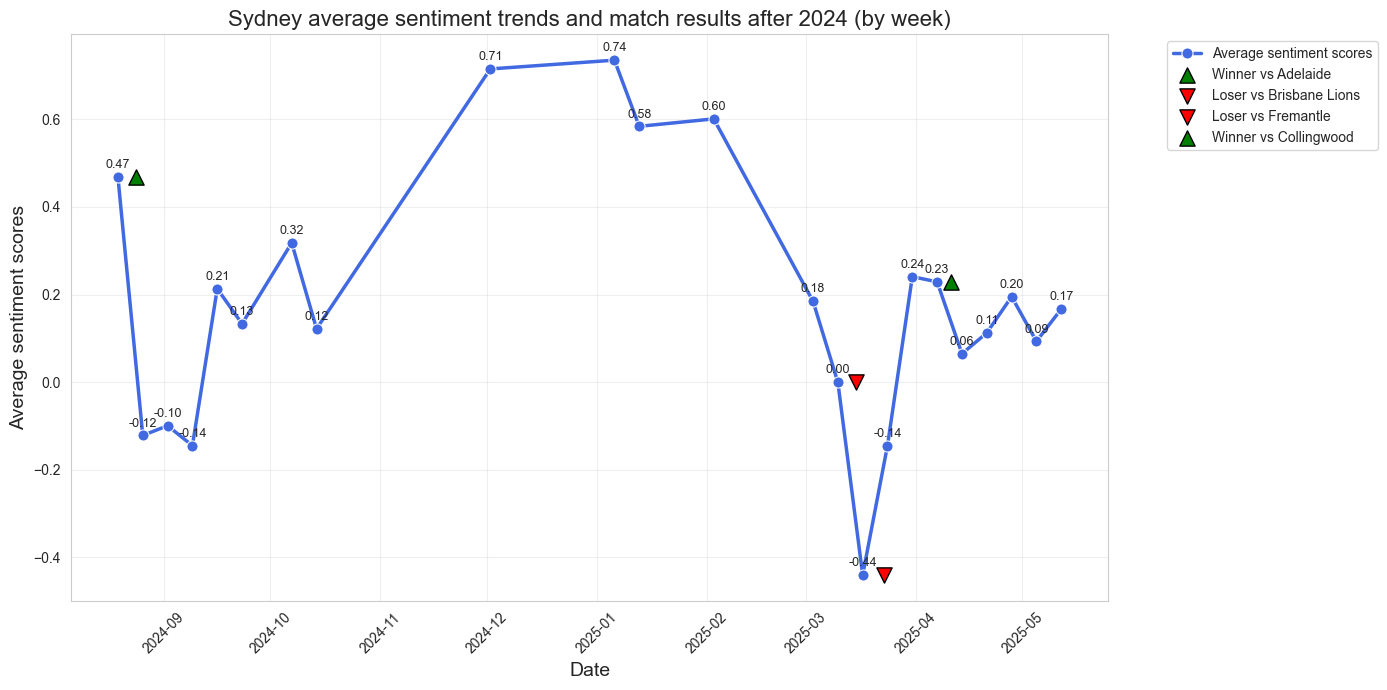

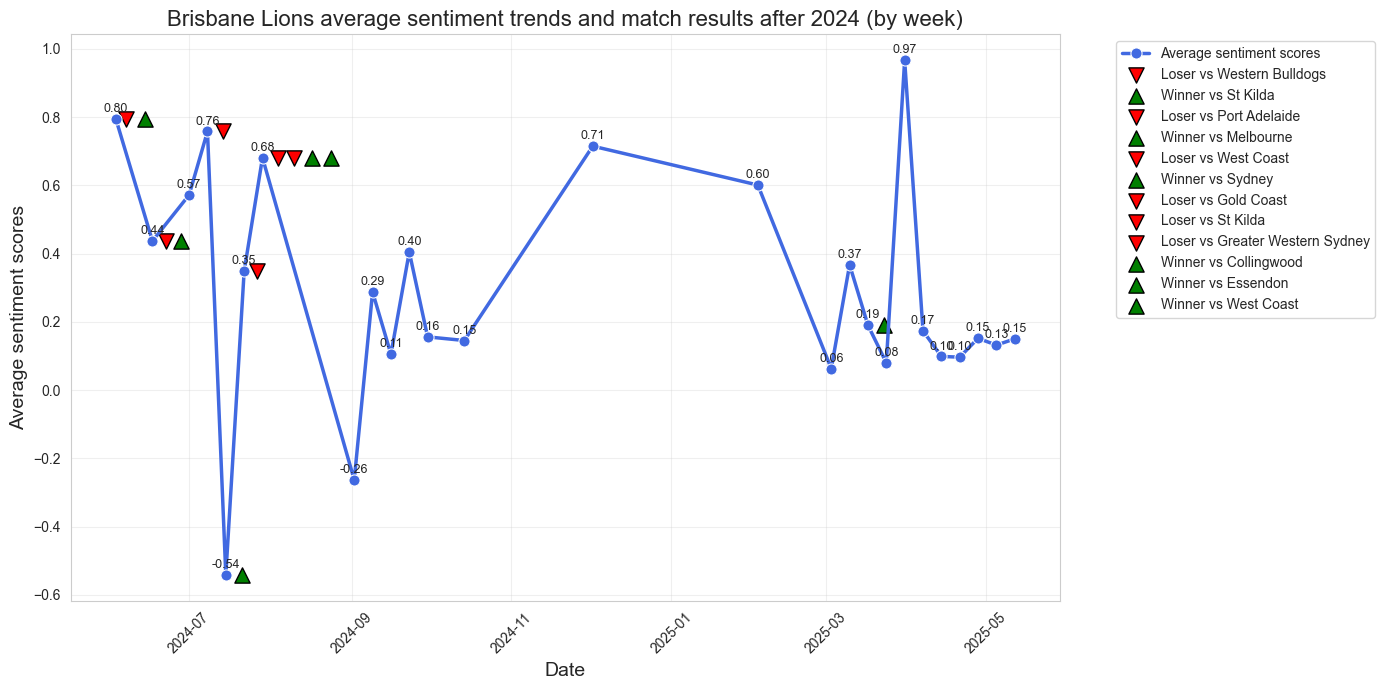

In [225]:
# Average sentiment trends and match results after 2024 (by week) for bottom 5 teams
response = requests.get('http://localhost:8080/afl/result/sentiment/reddit', headers={'X-Date-Format': 'week'})
data = response.json()

# Extract data
sentiment_data = data['sentiment_data']
all_teams = sentiment_data['all_teams']
bottom_teams_data = sentiment_data['bottom_5']
TEAM_MAPPING = data['team_mapping']
bottom_teams = [TEAM_MAPPING.get(t['name'], t['name']) for t in bottom_teams_data]

# Create a sentiment time series DataFrame and standardise the team names
time_dfs = []
for team in all_teams:
    df = pd.DataFrame(team['time_series'])
    standardised_name = TEAM_MAPPING.get(team['name'], team['name'])
    df['team'] = standardised_name
    time_dfs.append(df)
time_df = pd.concat(time_dfs)
time_df['date'] = pd.to_datetime(time_df['date'])
time_df = time_df[time_df['date'] >= '2024-01-01']

# Prepare match data and standardise team names
matches_df = pd.DataFrame(data['match_data'])
matches_df['date'] = pd.to_datetime(matches_df['date'].str.split().str[0])
matches_df['team'] = matches_df['team'].apply(lambda x: TEAM_MAPPING.get(x, x))

# Create a chart for each bottom 5 team
for team in bottom_teams:
    plt.figure(figsize=(14, 7))

    team_sentiment = time_df[time_df['team'] == team]
    if team_sentiment.empty:
        print(f"[Warning] cannot find sentiment data of {team}, skip.")
        continue

    sns.lineplot(x='date', y='avg_sentiment', 
                 data=team_sentiment, 
                 color='royalblue',
                 linewidth=2.5,
                 marker='o',
                 markersize=8,
                 label='Average sentiment scores')

    team_matches = matches_df[matches_df['team'] == team].sort_values('date')
    for _, match in team_matches.iterrows():
        # Find the sentiment data point closest to the date before the game
        past_data = team_sentiment[team_sentiment['date'] <= match['date']]
        if past_data.empty:
            continue
        closest_idx = past_data['date'].idxmax()
        sentiment_value = team_sentiment.loc[closest_idx, 'avg_sentiment']

        # Mark the results of the match
        if match['result'] == "Winner":
            marker = '^'
            color = 'green'
            label = f"Winner vs {match['opponent']}"
        elif match['result'] == "Loser":
            marker = 'v'
            color = 'red'
            label = f"Loser vs {match['opponent']}"
        else:
            marker = 'o'
            color = 'gray'
            label = f"Draw vs {match['opponent']}"

        plt.scatter(match['date'], sentiment_value,
                    marker=marker, color=color, s=120,
                    edgecolors='black', linewidths=1,
                    label=label)

    # Marking Values
    for _, row in team_sentiment.iterrows():
        plt.text(row['date'], row['avg_sentiment'] + 0.02,
                 f"{row['avg_sentiment']:.2f}",
                 fontsize=9, ha='center')

    plt.title(f'{team} average sentiment trends and match results after 2024 (by week)', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Average sentiment scores', fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)

    # Remove duplicate legends
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(),
               bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

- Total sentiment trends and match results after 2024 (by week) for top 5 teams

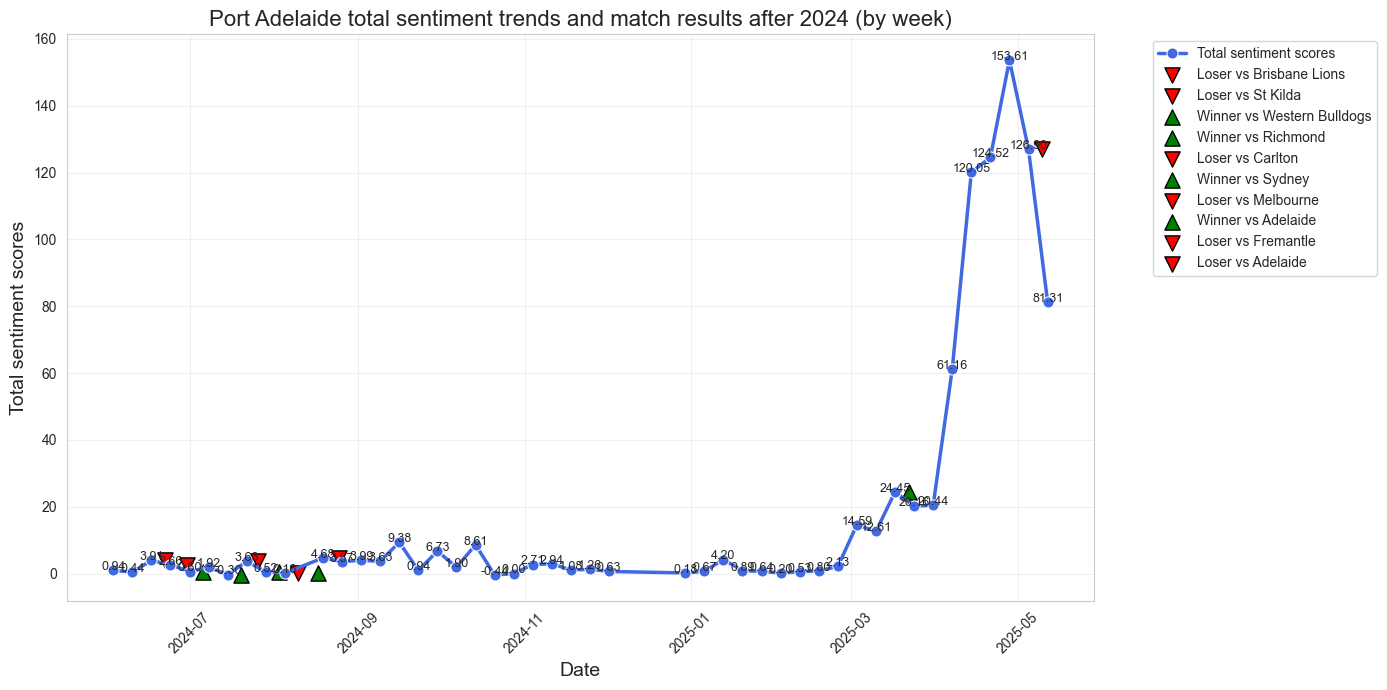

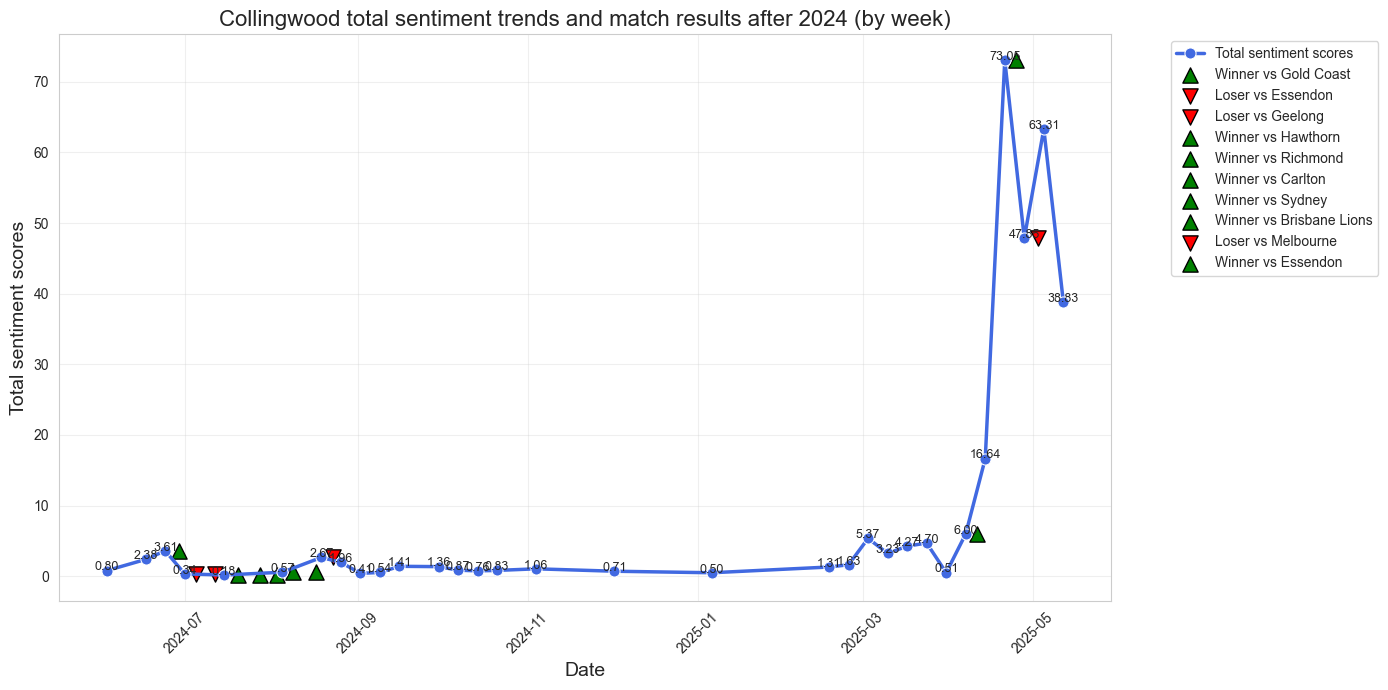

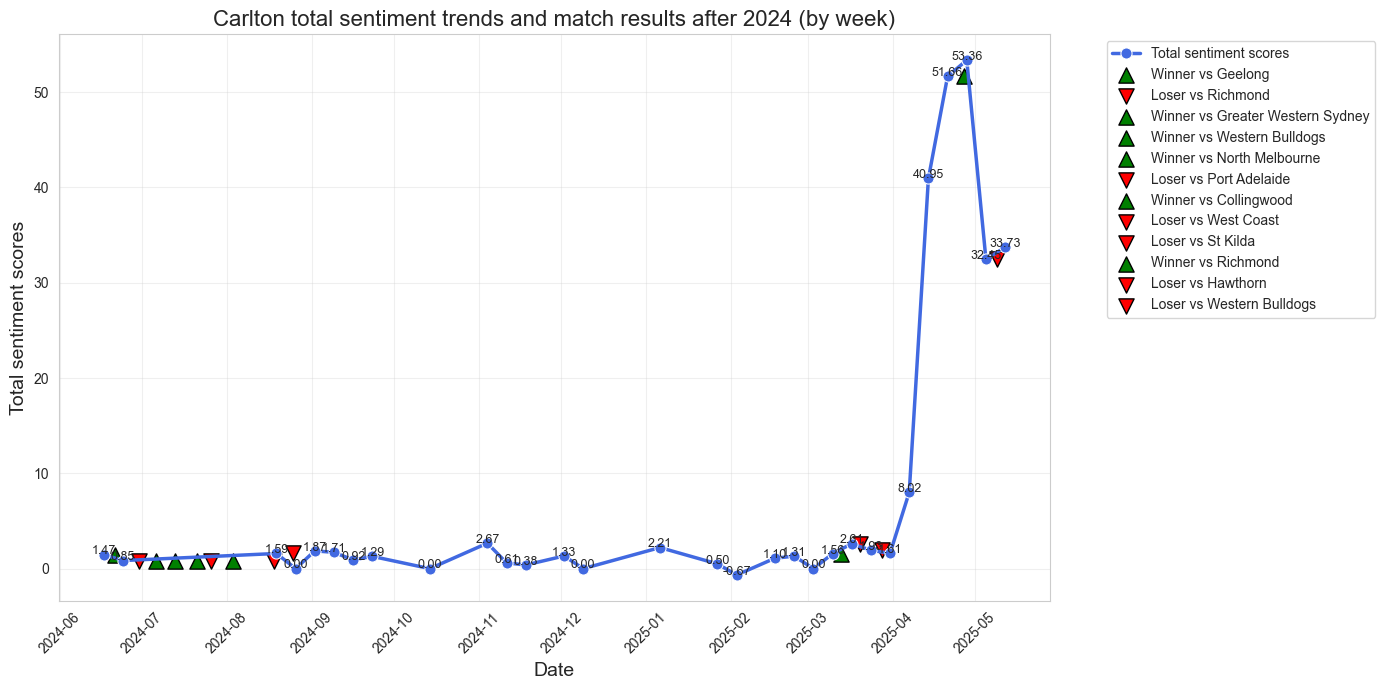

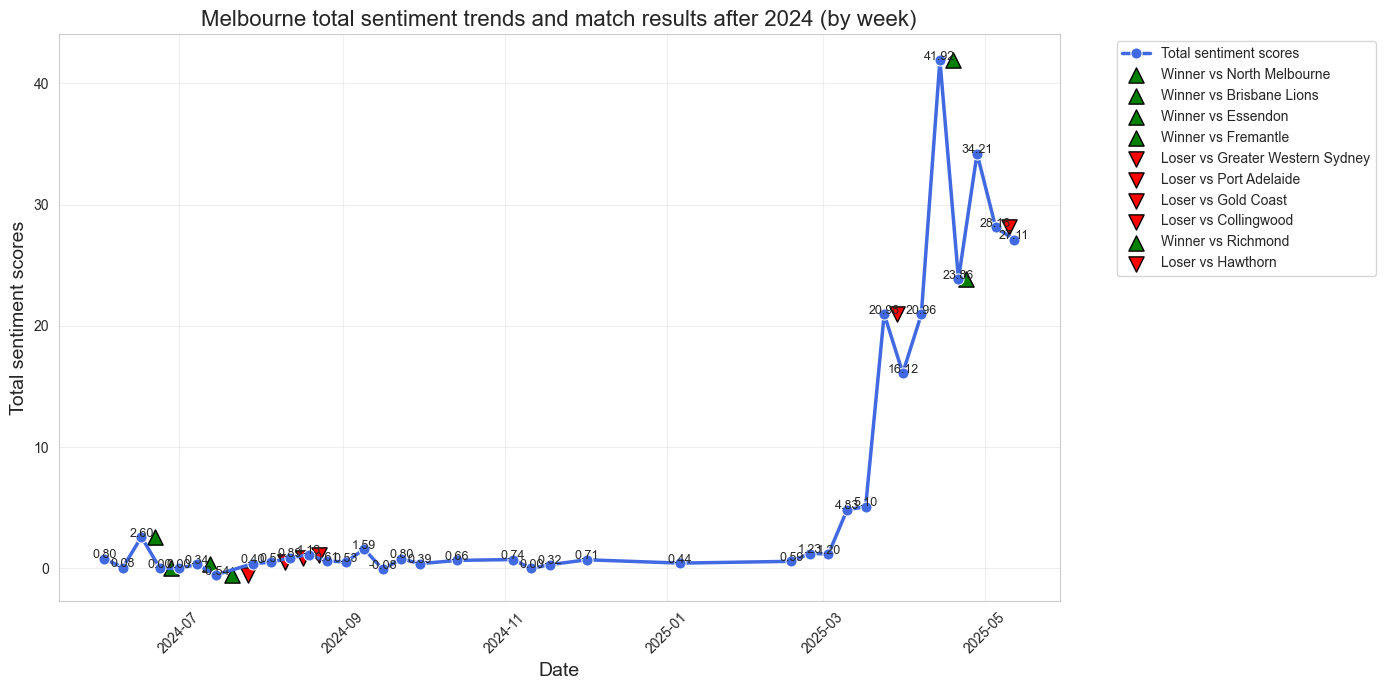

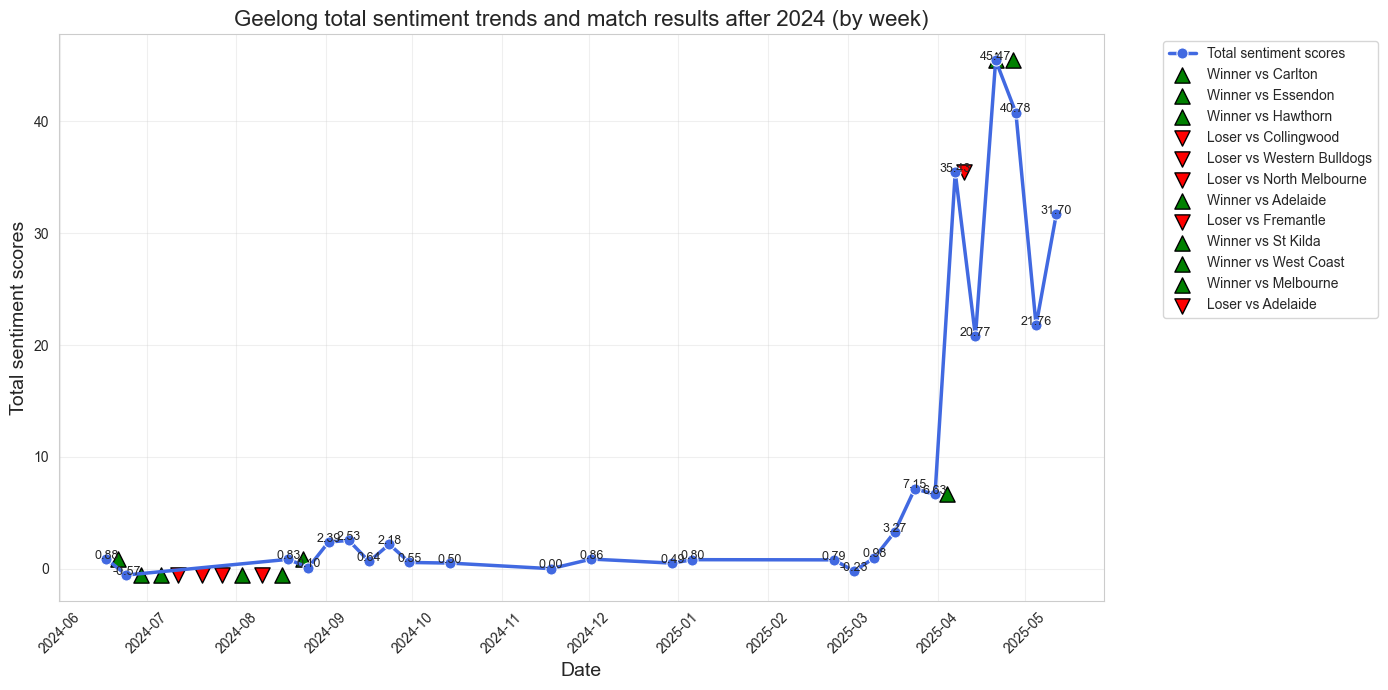

In [227]:
# Total sentiment trends and match results after 2024 (by week) for top 5 teams
response = requests.get('http://localhost:8080/afl/result/sentiment/reddit', headers={'X-Date-Format': 'week'})
data = response.json()

# Extract data
sentiment_data = data['sentiment_data']
all_teams = sentiment_data['all_teams']
top_teams_data = sentiment_data['top_5']
TEAM_MAPPING = data['team_mapping']
top_teams = [TEAM_MAPPING.get(t['name'], t['name']) for t in top_teams_data]

# Create a sentiment time series DataFrame and standardise the team names
time_dfs = []
for team in all_teams:
    df = pd.DataFrame(team['time_series'])
    standardised_name = TEAM_MAPPING.get(team['name'], team['name'])
    df['team'] = standardised_name
    time_dfs.append(df)
time_df = pd.concat(time_dfs)
time_df['date'] = pd.to_datetime(time_df['date'])
time_df = time_df[time_df['date'] >= '2024-01-01']

# Prepare match data and standardise team names
matches_df = pd.DataFrame(data['match_data'])
matches_df['date'] = pd.to_datetime(matches_df['date'].str.split().str[0])
matches_df['team'] = matches_df['team'].apply(lambda x: TEAM_MAPPING.get(x, x))

# Create a chart for each top 5 team
for team in top_teams:
    plt.figure(figsize=(14, 7))

    team_sentiment = time_df[time_df['team'] == team]
    if team_sentiment.empty:
        print(f"[Warning] cannot find sentiment data of {team}, skip.")
        continue

    sns.lineplot(x='date', y='total_sentiment', 
                 data=team_sentiment, 
                 color='royalblue',
                 linewidth=2.5,
                 marker='o',
                 markersize=8,
                 label='Total sentiment scores')

    team_matches = matches_df[matches_df['team'] == team].sort_values('date')
    for _, match in team_matches.iterrows():
        # Find the sentiment data point closest to the date before the game
        past_data = team_sentiment[team_sentiment['date'] <= match['date']]
        if past_data.empty:
            continue
        closest_idx = past_data['date'].idxmax()
        sentiment_value = team_sentiment.loc[closest_idx, 'total_sentiment']

        # Mark the results of the match
        if match['result'] == "Winner":
            marker = '^'
            color = 'green'
            label = f"Winner vs {match['opponent']}"
        elif match['result'] == "Loser":
            marker = 'v'
            color = 'red'
            label = f"Loser vs {match['opponent']}"
        else:
            marker = 'o'
            color = 'gray'
            label = f"Draw vs {match['opponent']}"

        plt.scatter(match['date'], sentiment_value,
                    marker=marker, color=color, s=120,
                    edgecolors='black', linewidths=1,
                    label=label)

    # Marking Values
    for _, row in team_sentiment.iterrows():
        plt.text(row['date'], row['total_sentiment'] + 0.03,
                 f"{row['total_sentiment']:.2f}",
                 fontsize=9, ha='center')

    plt.title(f'{team} total sentiment trends and match results after 2024 (by week)', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Total sentiment scores', fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)

    # Remove duplicate legends
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(),
               bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

- Total sentiment trends and match results after 2024 (by week) for bottom 5 teams

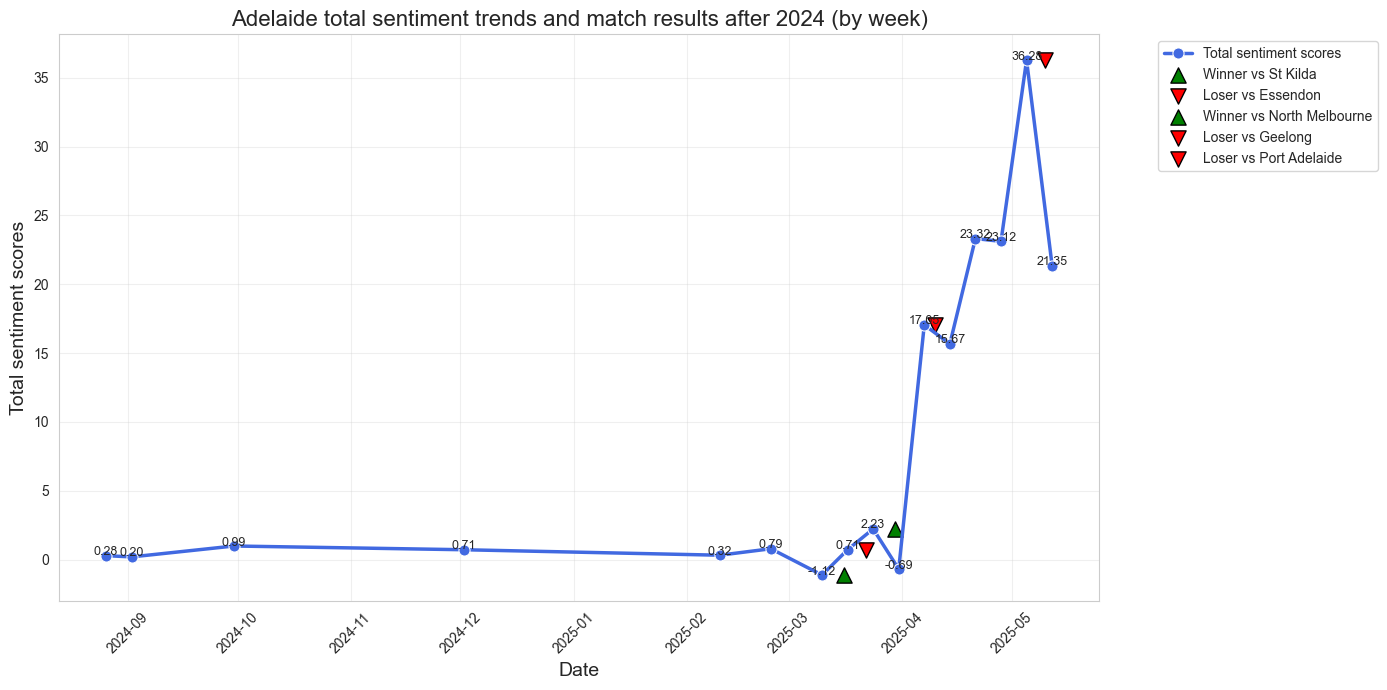

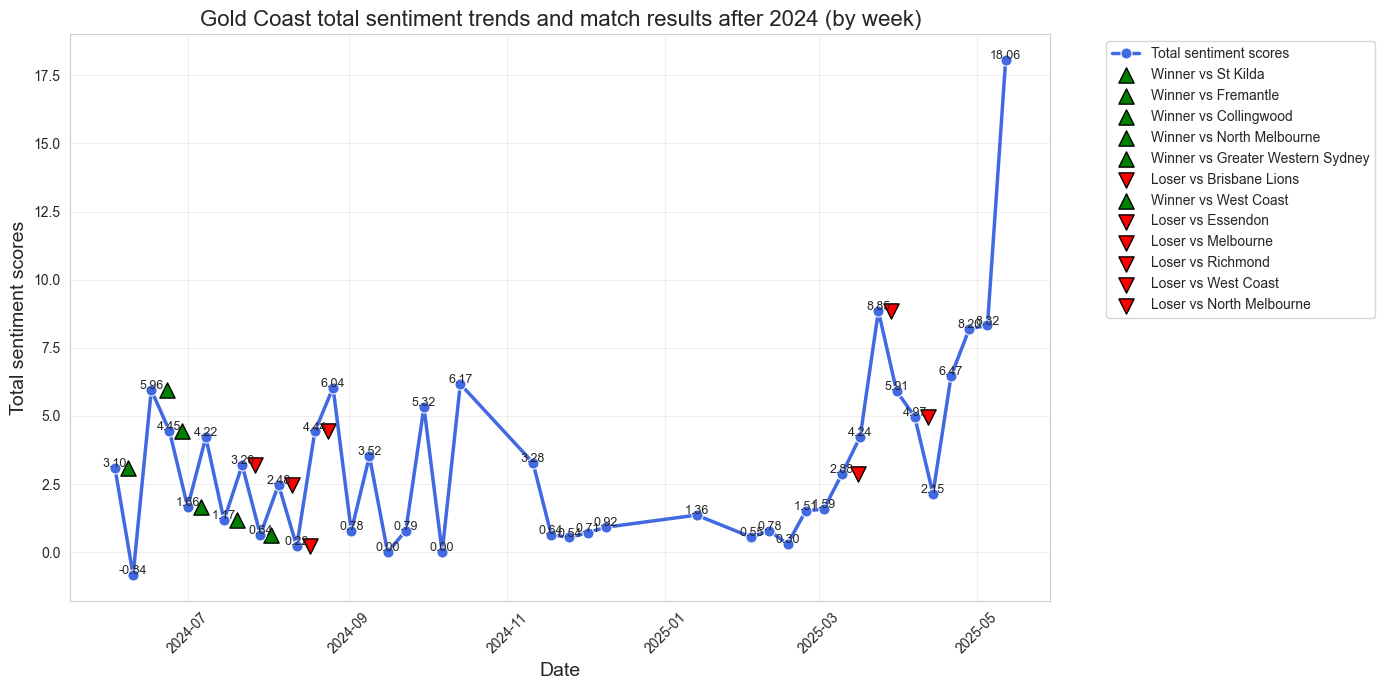

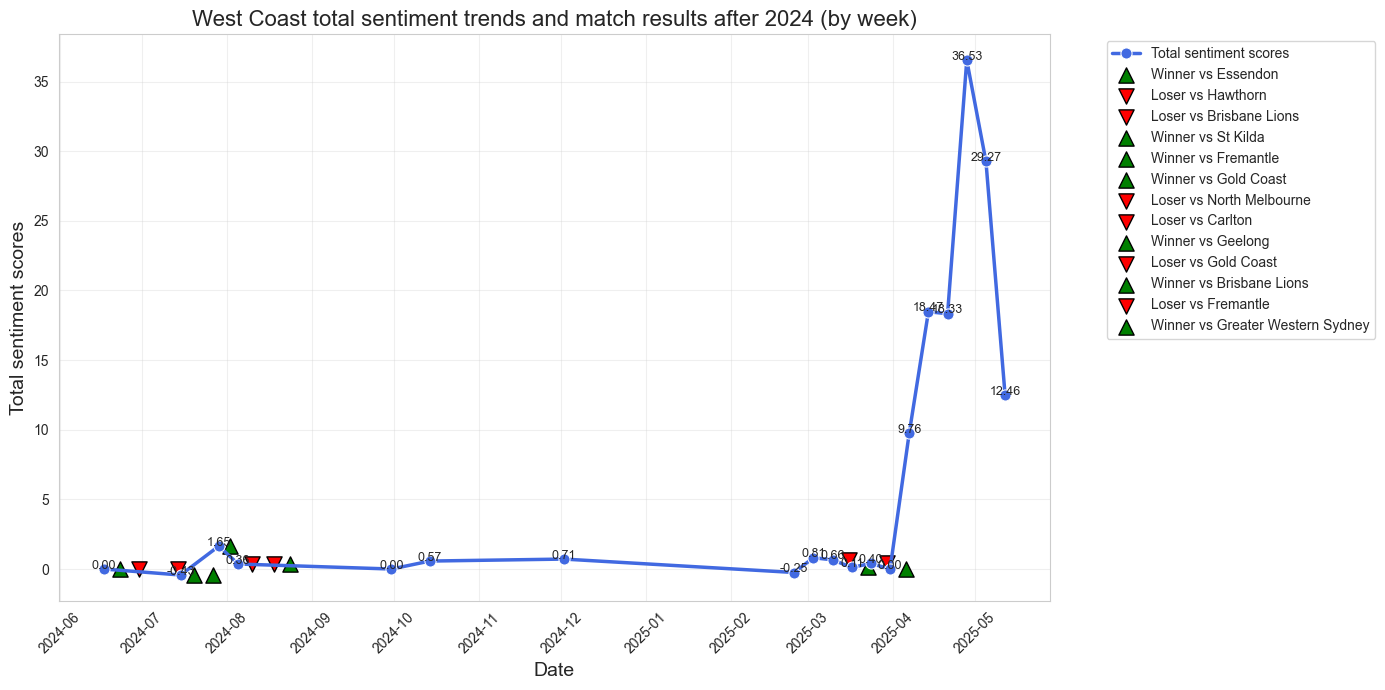

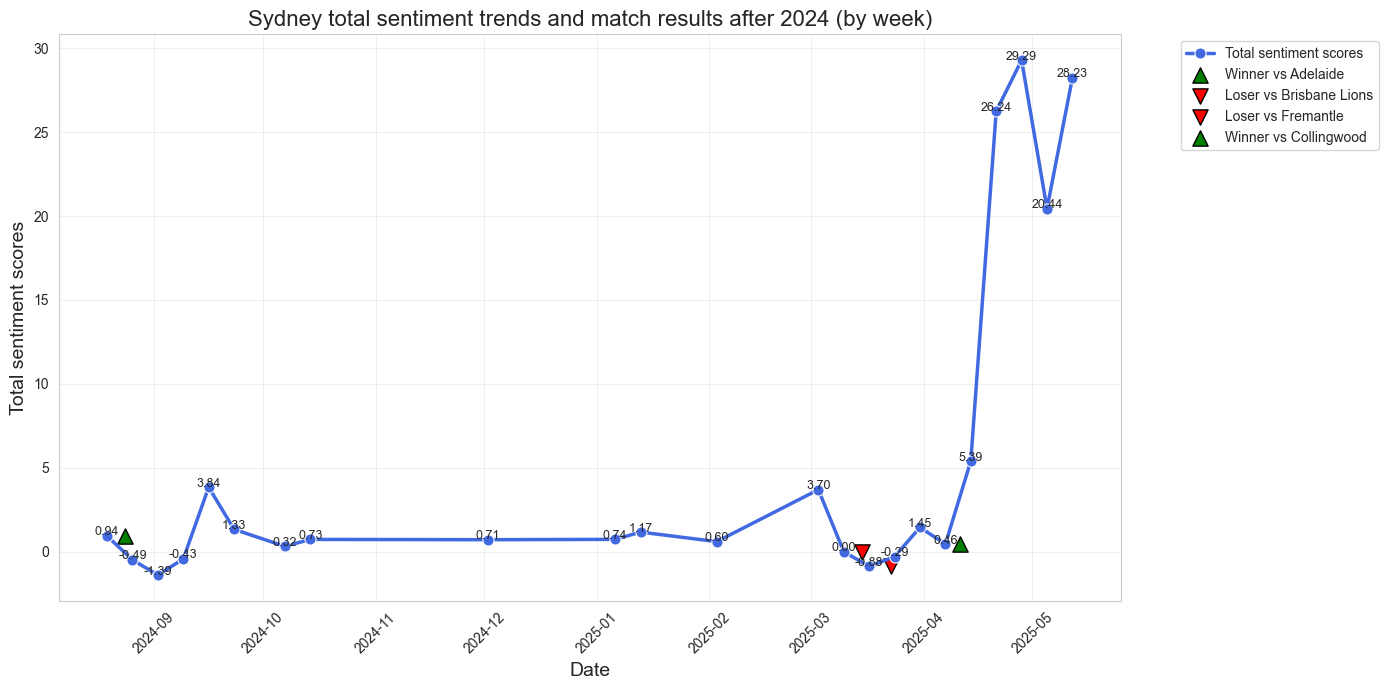

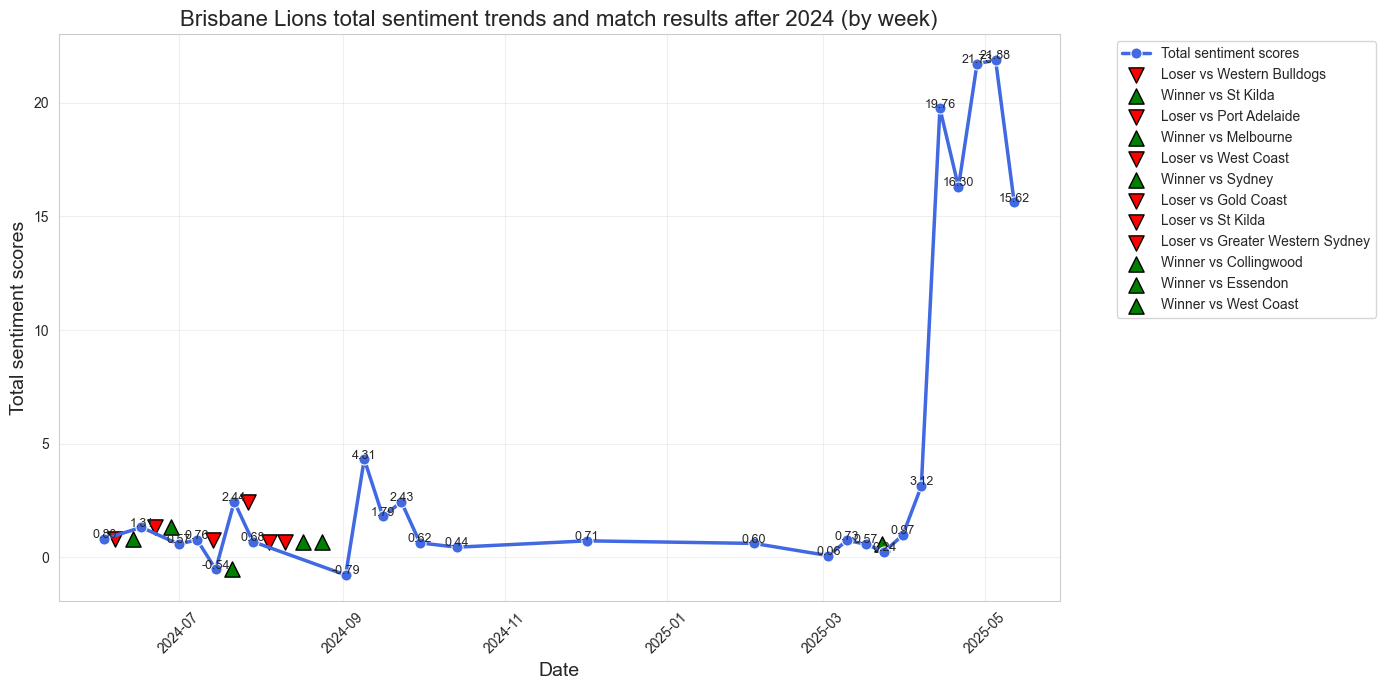

In [229]:
# Total sentiment trends and match results after 2024 (by week) for bottom 5 teams
response = requests.get('http://localhost:8080/afl/result/sentiment/reddit', headers={'X-Date-Format': 'week'})
data = response.json()

# Extract data
sentiment_data = data['sentiment_data']
all_teams = sentiment_data['all_teams']
bottom_teams_data = sentiment_data['bottom_5']
TEAM_MAPPING = data['team_mapping']
bottom_teams = [TEAM_MAPPING.get(t['name'], t['name']) for t in bottom_teams_data]

# Create a sentiment time series DataFrame and standardise the team names
time_dfs = []
for team in all_teams:
    df = pd.DataFrame(team['time_series'])
    standardised_name = TEAM_MAPPING.get(team['name'], team['name'])
    df['team'] = standardised_name
    time_dfs.append(df)
time_df = pd.concat(time_dfs)
time_df['date'] = pd.to_datetime(time_df['date'])
time_df = time_df[time_df['date'] >= '2024-01-01']

# Prepare match data and standardise team names
matches_df = pd.DataFrame(data['match_data'])
matches_df['date'] = pd.to_datetime(matches_df['date'].str.split().str[0])
matches_df['team'] = matches_df['team'].apply(lambda x: TEAM_MAPPING.get(x, x))

# Create a chart for each bottom 5 team
for team in bottom_teams:
    plt.figure(figsize=(14, 7))

    team_sentiment = time_df[time_df['team'] == team]
    if team_sentiment.empty:
        print(f"[Warning] cannot find sentiment data of {team}, skip.")
        continue

    sns.lineplot(x='date', y='total_sentiment', 
                 data=team_sentiment, 
                 color='royalblue',
                 linewidth=2.5,
                 marker='o',
                 markersize=8,
                 label='Total sentiment scores')

    team_matches = matches_df[matches_df['team'] == team].sort_values('date')
    for _, match in team_matches.iterrows():
        # Find the sentiment data point closest to the date before the game
        past_data = team_sentiment[team_sentiment['date'] <= match['date']]
        if past_data.empty:
            continue
        closest_idx = past_data['date'].idxmax()
        sentiment_value = team_sentiment.loc[closest_idx, 'total_sentiment']

        # Mark the results of the match
        if match['result'] == "Winner":
            marker = '^'
            color = 'green'
            label = f"Winner vs {match['opponent']}"
        elif match['result'] == "Loser":
            marker = 'v'
            color = 'red'
            label = f"Loser vs {match['opponent']}"
        else:
            marker = 'o'
            color = 'gray'
            label = f"Draw vs {match['opponent']}"

        plt.scatter(match['date'], sentiment_value,
                    marker=marker, color=color, s=120,
                    edgecolors='black', linewidths=1,
                    label=label)

    # Marking Values
    for _, row in team_sentiment.iterrows():
        plt.text(row['date'], row['total_sentiment'] + 0.03,
                 f"{row['total_sentiment']:.2f}",
                 fontsize=9, ha='center')

    plt.title(f'{team} total sentiment trends and match results after 2024 (by week)', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Total sentiment scores', fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)

    # Remove duplicate legends
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(),
               bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

#### Bluesky
- Average sentiment trends and match results after 2024 (by week) for top 5 teams

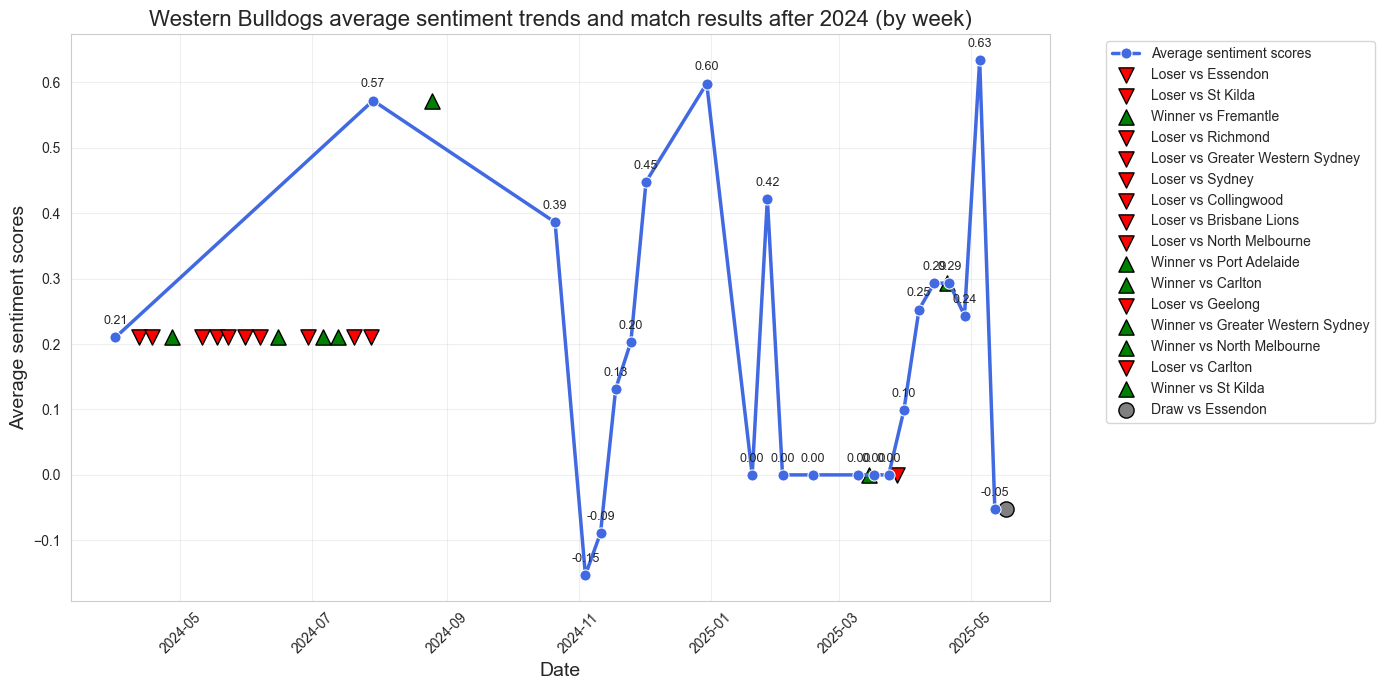

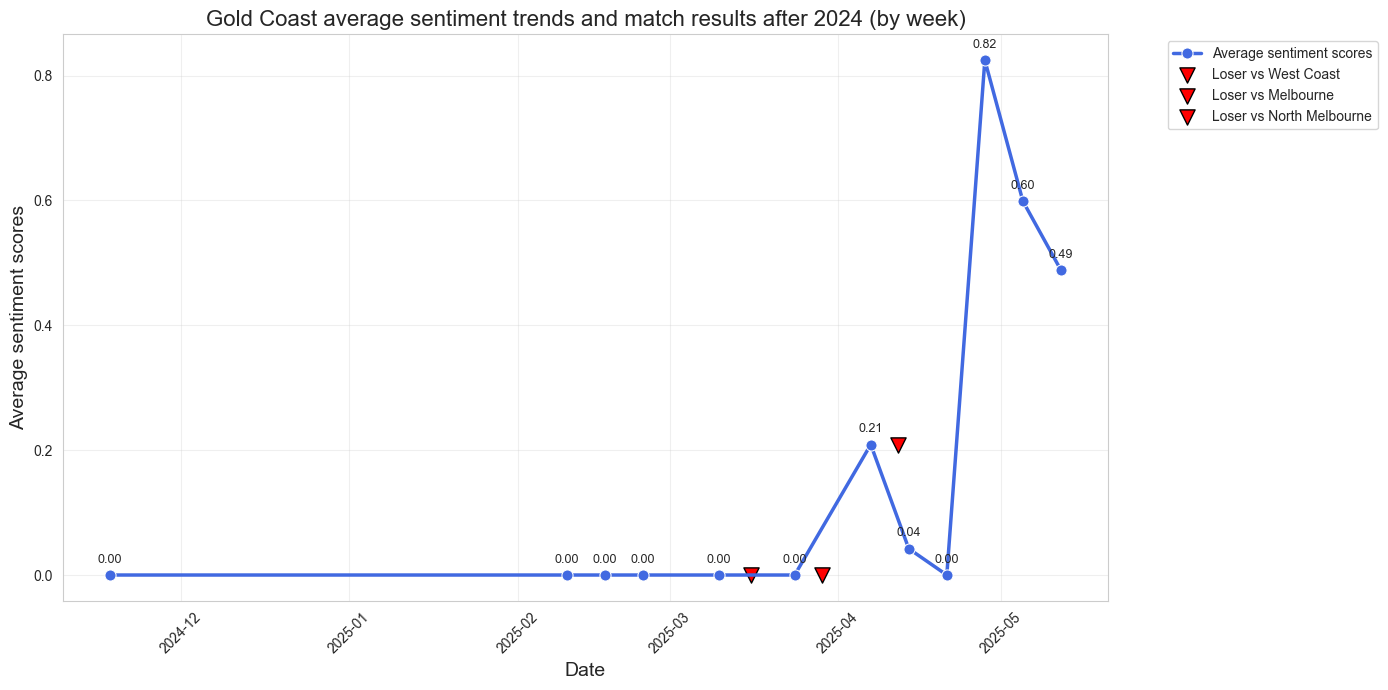

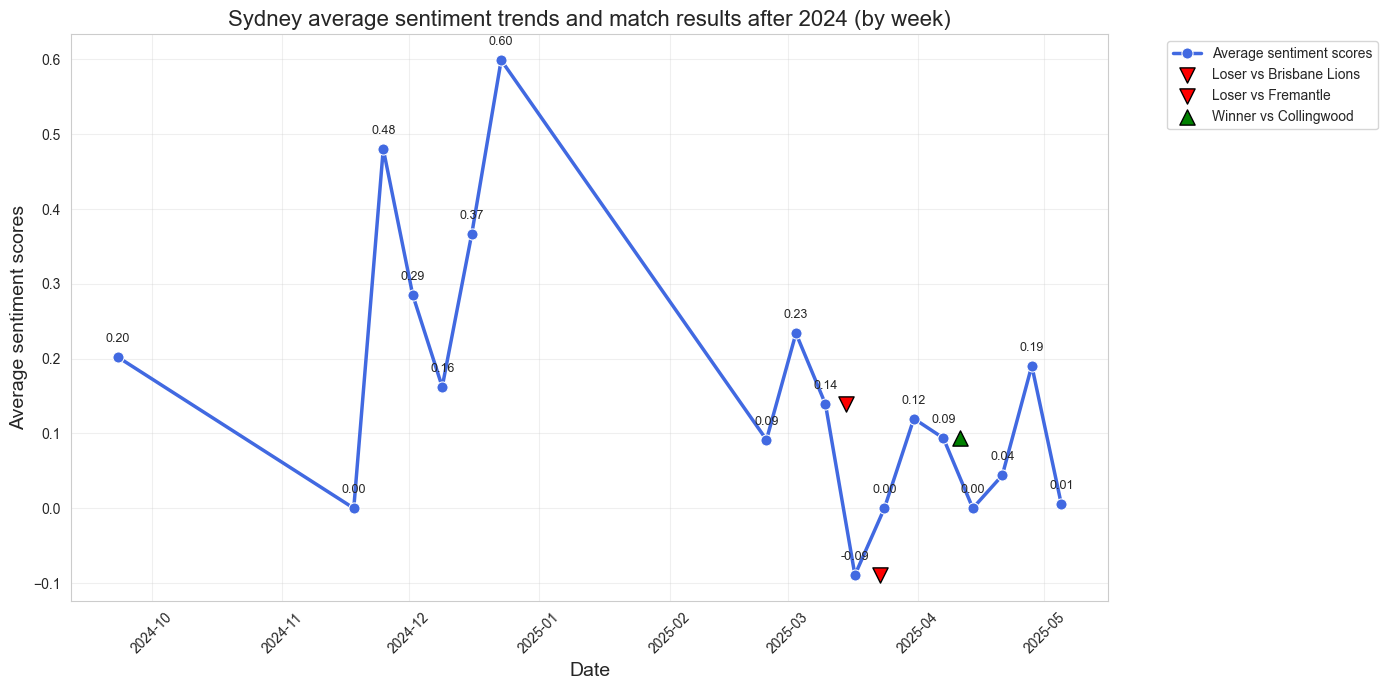

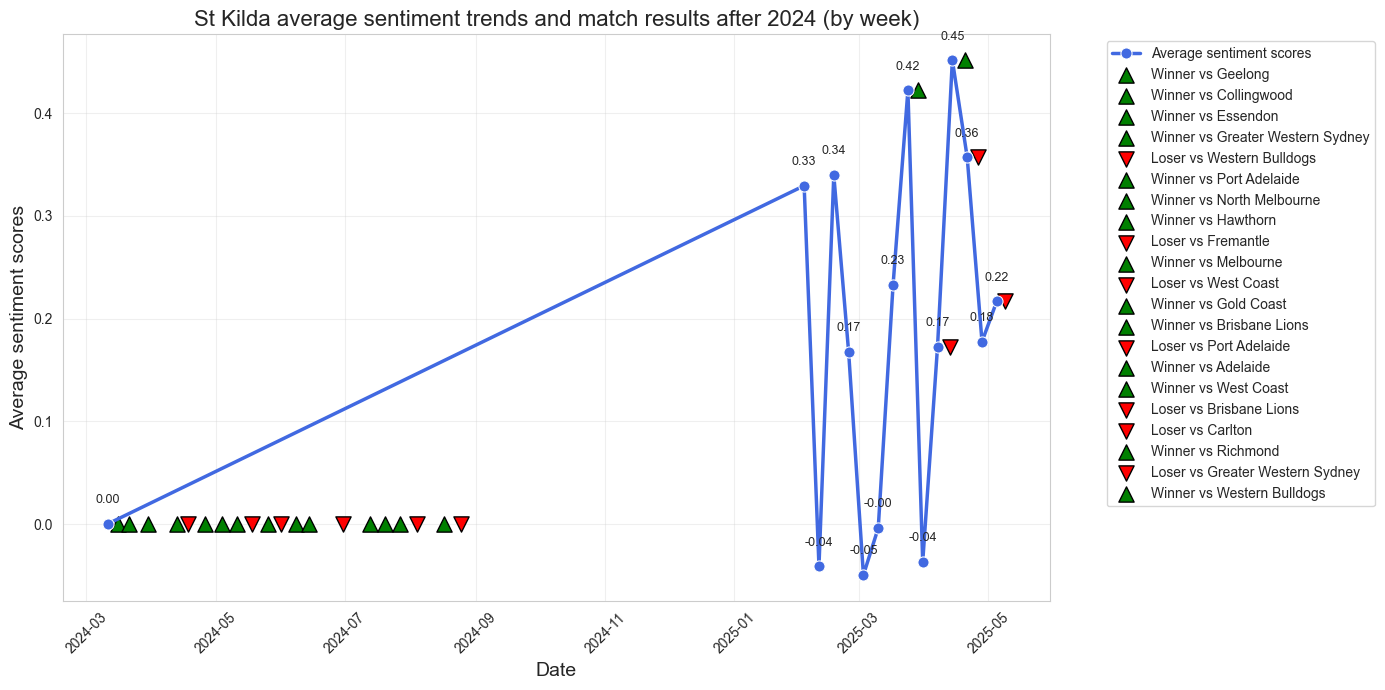

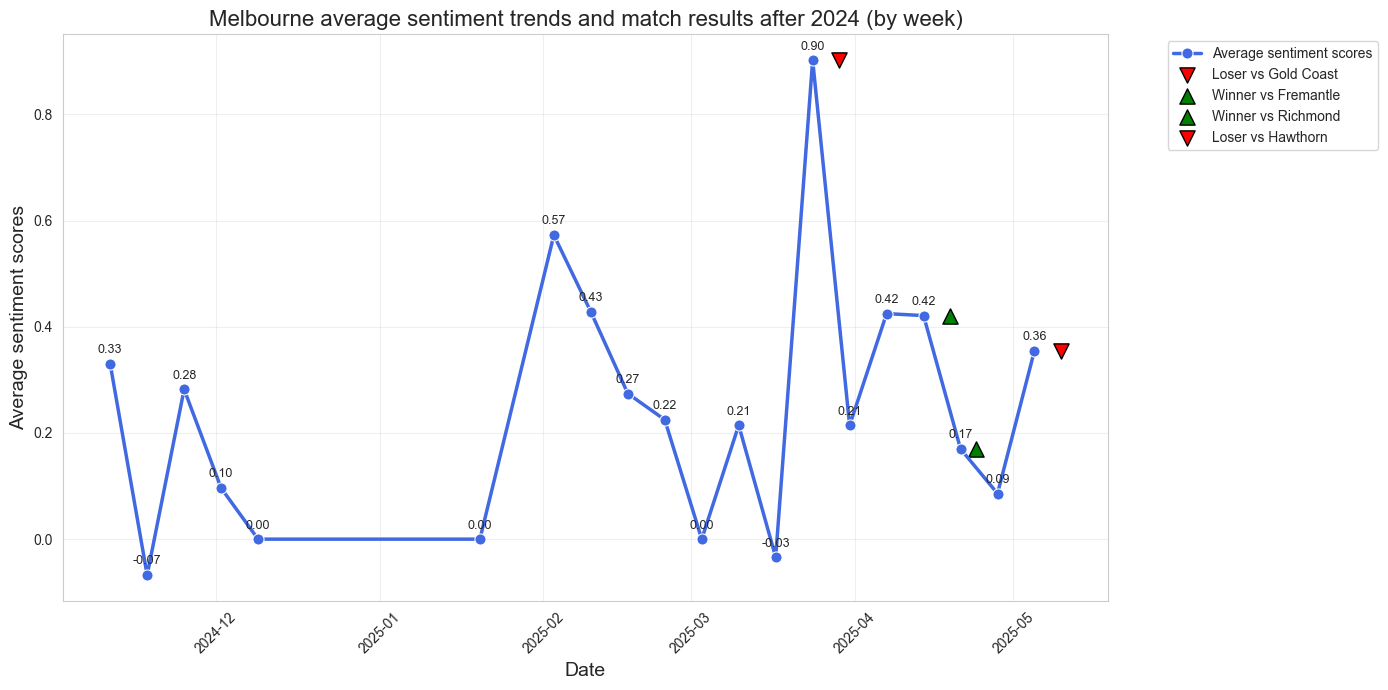

In [231]:
# Average sentiment trends and match results after 2024 (by week) for top 5 teams
response = requests.get('http://localhost:8080/afl/result/sentiment/bluesky', headers={'X-Date-Format': 'week'})
data = response.json()

# Extract data
sentiment_data = data['sentiment_data']
all_teams = sentiment_data['all_teams']
top_teams_data = sentiment_data['top_5']
TEAM_MAPPING = data['team_mapping']
top_teams = [TEAM_MAPPING.get(t['name'], t['name']) for t in top_teams_data]

# Create a sentiment time series DataFrame and standardise the team names
time_dfs = []
for team in all_teams:
    df = pd.DataFrame(team['time_series'])
    standardised_name = TEAM_MAPPING.get(team['name'], team['name'])
    df['team'] = standardised_name
    time_dfs.append(df)
time_df = pd.concat(time_dfs)
time_df['date'] = pd.to_datetime(time_df['date'])
time_df = time_df[time_df['date'] >= '2024-01-01']

# Prepare match data and standardise team names
matches_df = pd.DataFrame(data['match_data'])
matches_df['date'] = pd.to_datetime(matches_df['date'].str.split().str[0])
matches_df['team'] = matches_df['team'].apply(lambda x: TEAM_MAPPING.get(x, x))

# Create a chart for each top 5 team
for team in top_teams:
    plt.figure(figsize=(14, 7))

    team_sentiment = time_df[time_df['team'] == team]
    if team_sentiment.empty:
        print(f"[Warning] cannot find sentiment data of {team}, skip.")
        continue

    sns.lineplot(x='date', y='avg_sentiment', 
                 data=team_sentiment, 
                 color='royalblue',
                 linewidth=2.5,
                 marker='o',
                 markersize=8,
                 label='Average sentiment scores')

    team_matches = matches_df[matches_df['team'] == team].sort_values('date')
    for _, match in team_matches.iterrows():
        # Find the sentiment data point closest to the date before the game
        past_data = team_sentiment[team_sentiment['date'] <= match['date']]
        if past_data.empty:
            continue
        closest_idx = past_data['date'].idxmax()
        sentiment_value = team_sentiment.loc[closest_idx, 'avg_sentiment']

        # Mark the results of the match
        if match['result'] == "Winner":
            marker = '^'
            color = 'green'
            label = f"Winner vs {match['opponent']}"
        elif match['result'] == "Loser":
            marker = 'v'
            color = 'red'
            label = f"Loser vs {match['opponent']}"
        else:
            marker = 'o'
            color = 'gray'
            label = f"Draw vs {match['opponent']}"

        plt.scatter(match['date'], sentiment_value,
                    marker=marker, color=color, s=120,
                    edgecolors='black', linewidths=1,
                    label=label)

    # Marking Values
    for _, row in team_sentiment.iterrows():
        plt.text(row['date'], row['avg_sentiment'] + 0.02,
                 f"{row['avg_sentiment']:.2f}",
                 fontsize=9, ha='center')

    plt.title(f'{team} average sentiment trends and match results after 2024 (by week)', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Average sentiment scores', fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)

    # Remove duplicate legends
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(),
               bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    plt.show()

- Average sentiment trends and match results after 2024 (by week) for bottom 5 teams

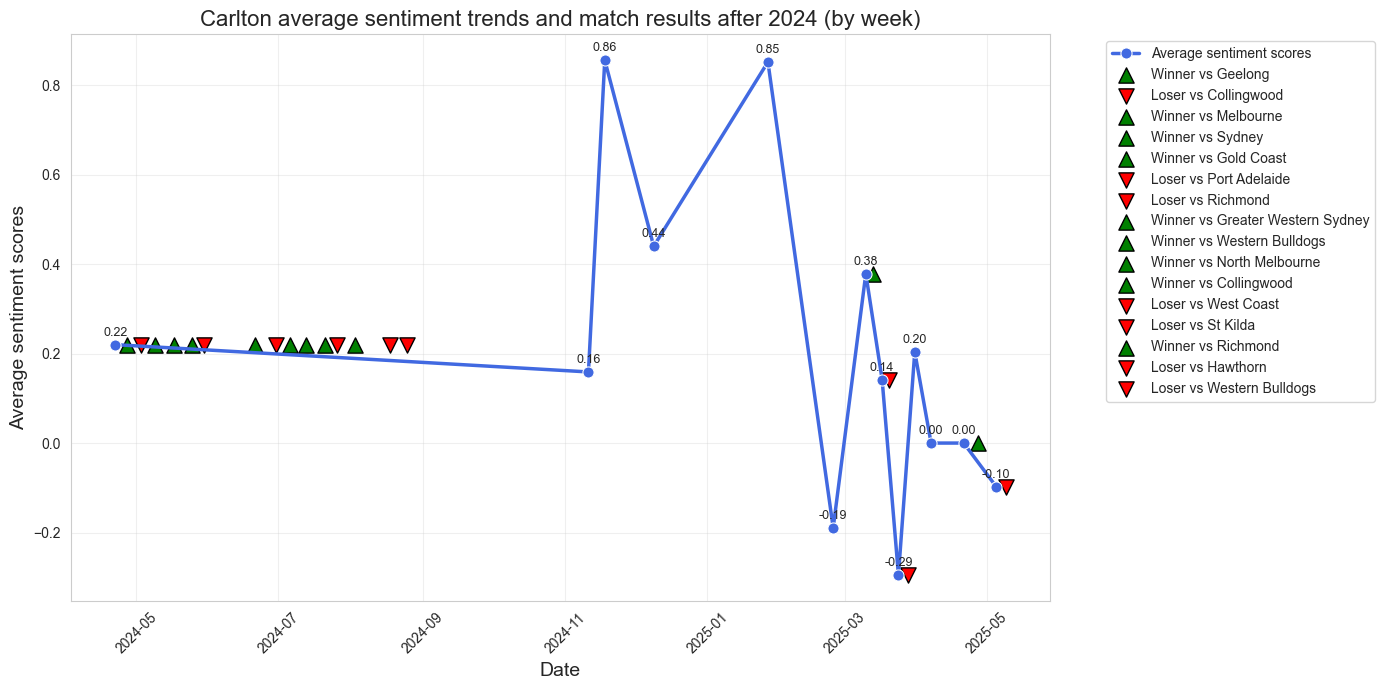

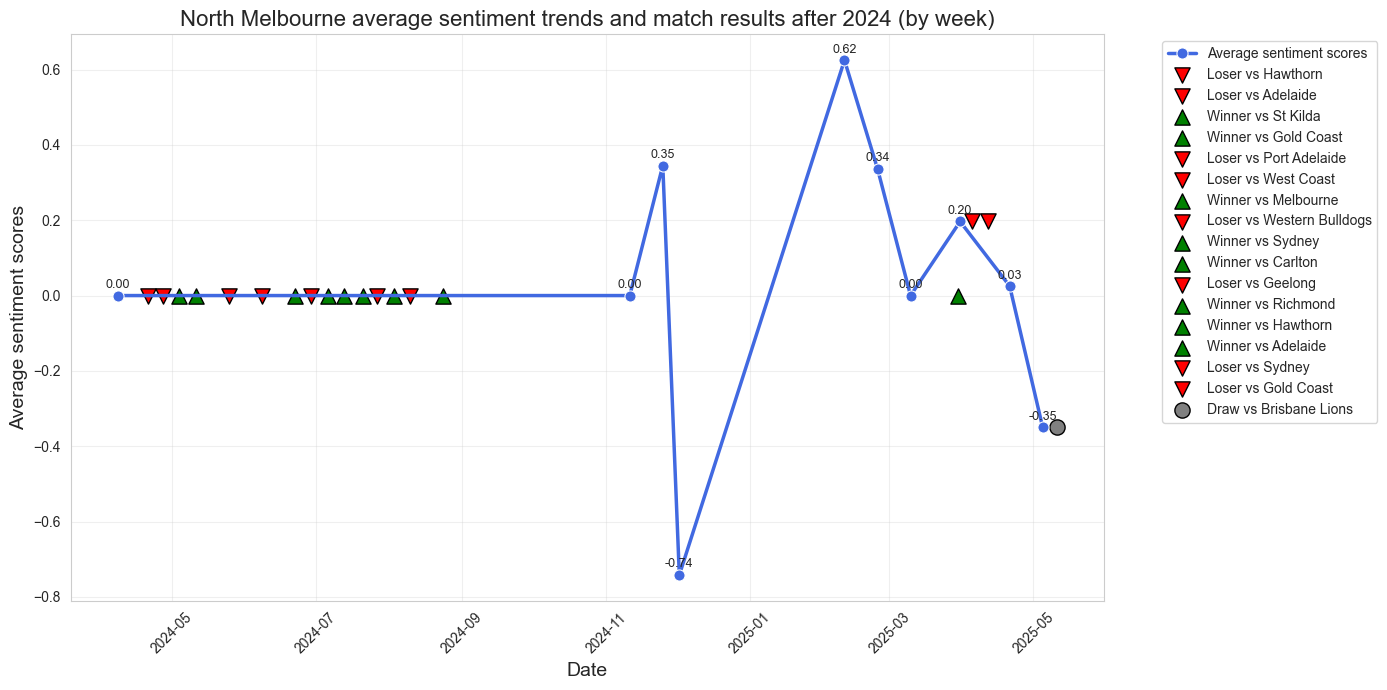

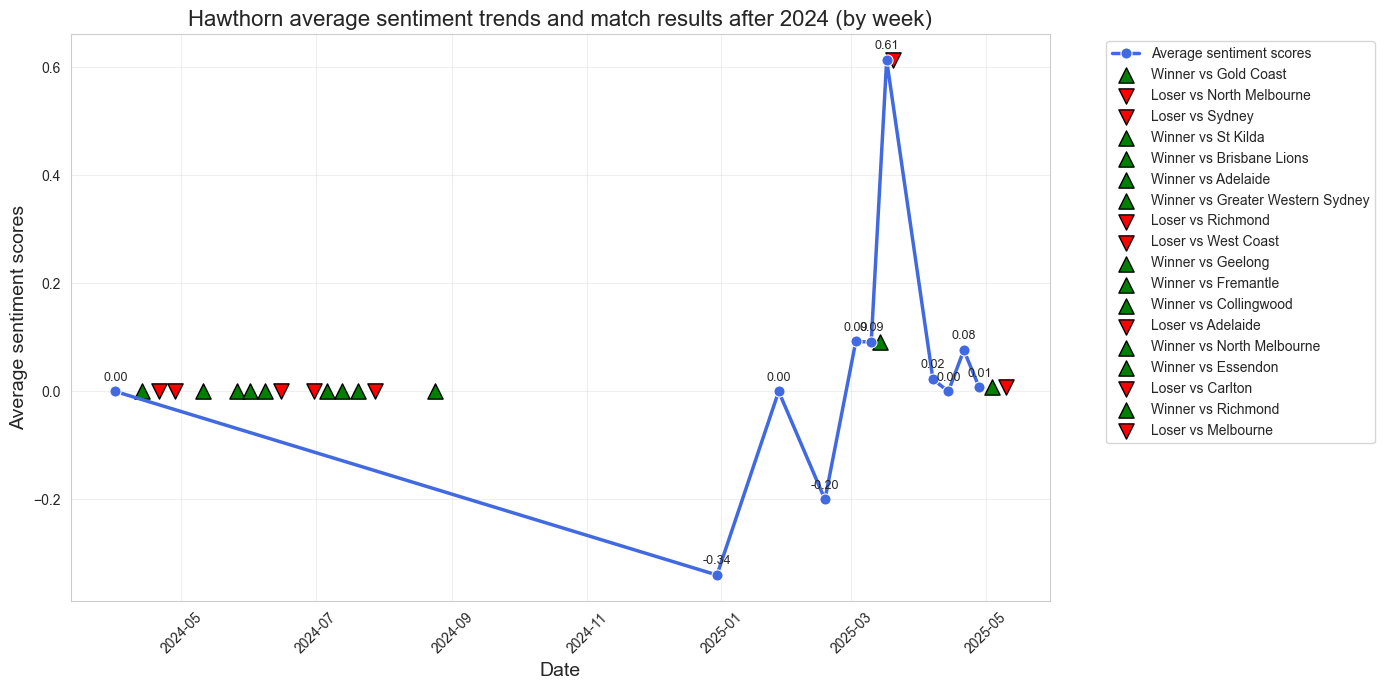

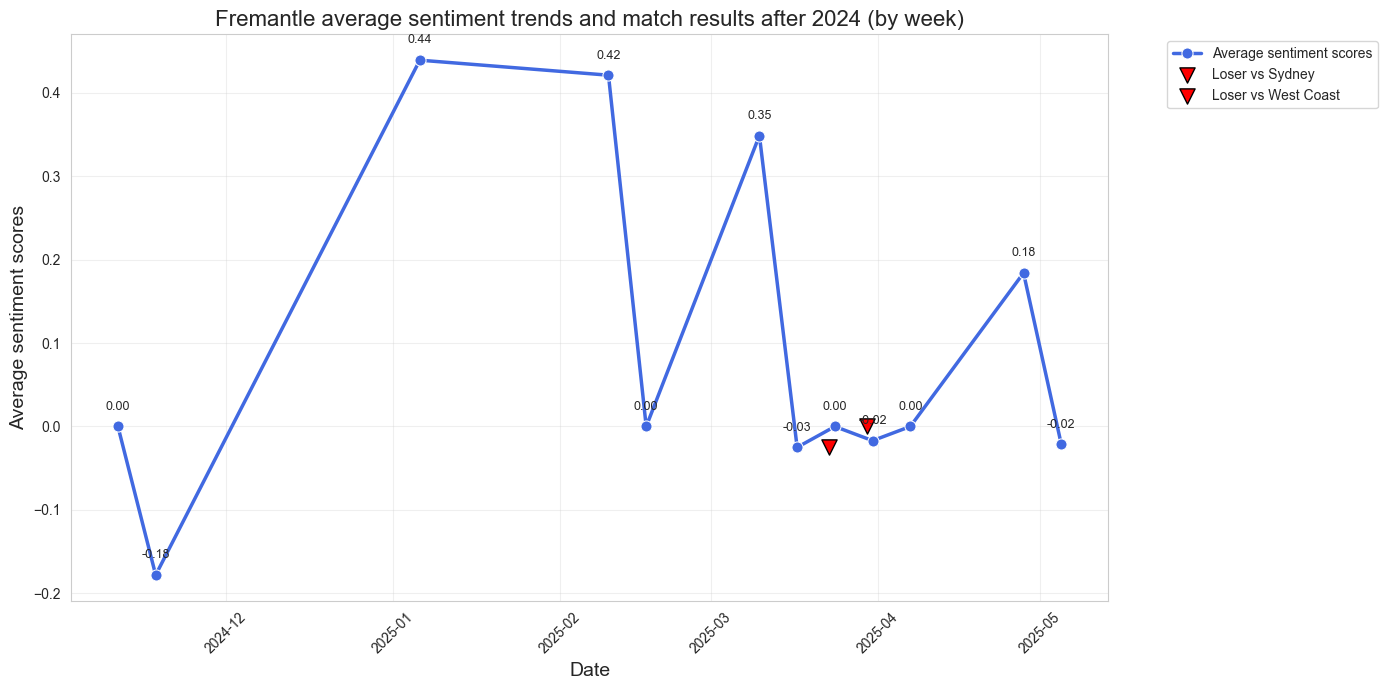

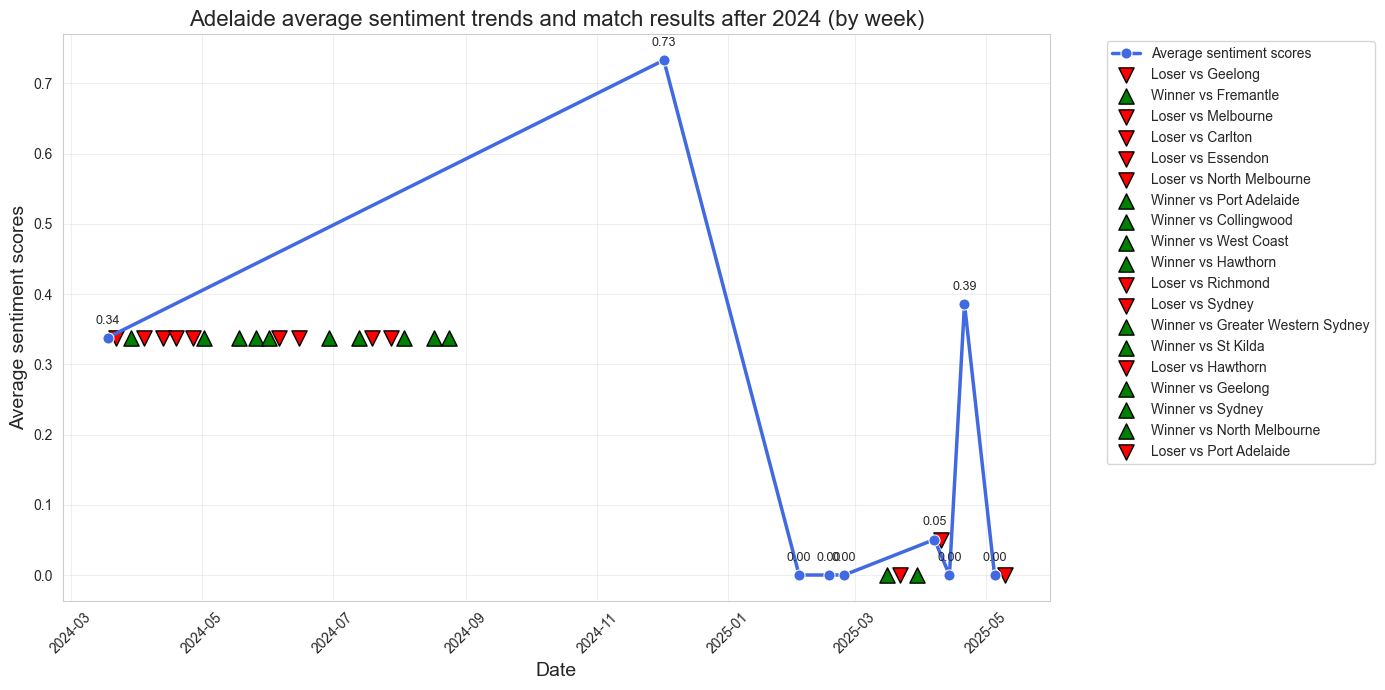

In [233]:
# Average sentiment trends and match results after 2024 (by week) for bottom 5 teams
response = requests.get('http://localhost:8080/afl/result/sentiment/bluesky', headers={'X-Date-Format': 'week'})
data = response.json()

# Extract data
sentiment_data = data['sentiment_data']
all_teams = sentiment_data['all_teams']
bottom_teams_data = sentiment_data['bottom_5']
TEAM_MAPPING = data['team_mapping']
bottom_teams = [TEAM_MAPPING.get(t['name'], t['name']) for t in bottom_teams_data]

# Create a sentiment time series DataFrame and standardise the team names
time_dfs = []
for team in all_teams:
    df = pd.DataFrame(team['time_series'])
    standardised_name = TEAM_MAPPING.get(team['name'], team['name'])
    df['team'] = standardised_name
    time_dfs.append(df)
time_df = pd.concat(time_dfs)
time_df['date'] = pd.to_datetime(time_df['date'])
time_df = time_df[time_df['date'] >= '2024-01-01']

# Prepare match data and standardise team names
matches_df = pd.DataFrame(data['match_data'])
matches_df['date'] = pd.to_datetime(matches_df['date'].str.split().str[0])
matches_df['team'] = matches_df['team'].apply(lambda x: TEAM_MAPPING.get(x, x))

# Create a chart for each bottom 5 team
for team in bottom_teams:
    plt.figure(figsize=(14, 7))

    team_sentiment = time_df[time_df['team'] == team]
    if team_sentiment.empty:
        print(f"[Warning] cannot find sentiment data of {team}, skip.")
        continue

    sns.lineplot(x='date', y='avg_sentiment', 
                 data=team_sentiment, 
                 color='royalblue',
                 linewidth=2.5,
                 marker='o',
                 markersize=8,
                 label='Average sentiment scores')

    team_matches = matches_df[matches_df['team'] == team].sort_values('date')
    for _, match in team_matches.iterrows():
        # Find the sentiment data point closest to the date before the game
        past_data = team_sentiment[team_sentiment['date'] <= match['date']]
        if past_data.empty:
            continue
        closest_idx = past_data['date'].idxmax()
        sentiment_value = team_sentiment.loc[closest_idx, 'avg_sentiment']

        # Mark the results of the match
        if match['result'] == "Winner":
            marker = '^'
            color = 'green'
            label = f"Winner vs {match['opponent']}"
        elif match['result'] == "Loser":
            marker = 'v'
            color = 'red'
            label = f"Loser vs {match['opponent']}"
        else:
            marker = 'o'
            color = 'gray'
            label = f"Draw vs {match['opponent']}"

        plt.scatter(match['date'], sentiment_value,
                    marker=marker, color=color, s=120,
                    edgecolors='black', linewidths=1,
                    label=label)

    # Marking Values
    for _, row in team_sentiment.iterrows():
        plt.text(row['date'], row['avg_sentiment'] + 0.02,
                 f"{row['avg_sentiment']:.2f}",
                 fontsize=9, ha='center')

    plt.title(f'{team} average sentiment trends and match results after 2024 (by week)', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Average sentiment scores', fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)

    # Remove duplicate legends
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(),
               bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

- Total sentiment trends and match results after 2024 (by week) for top 5 teams

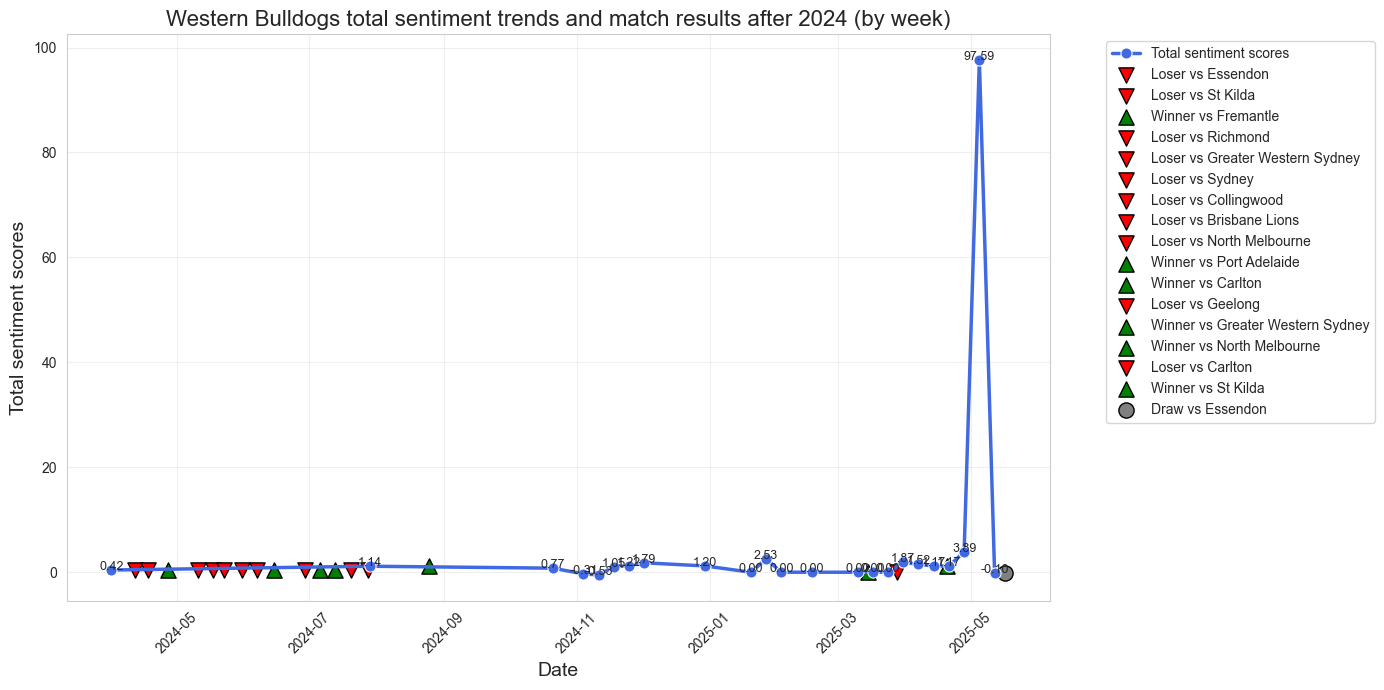

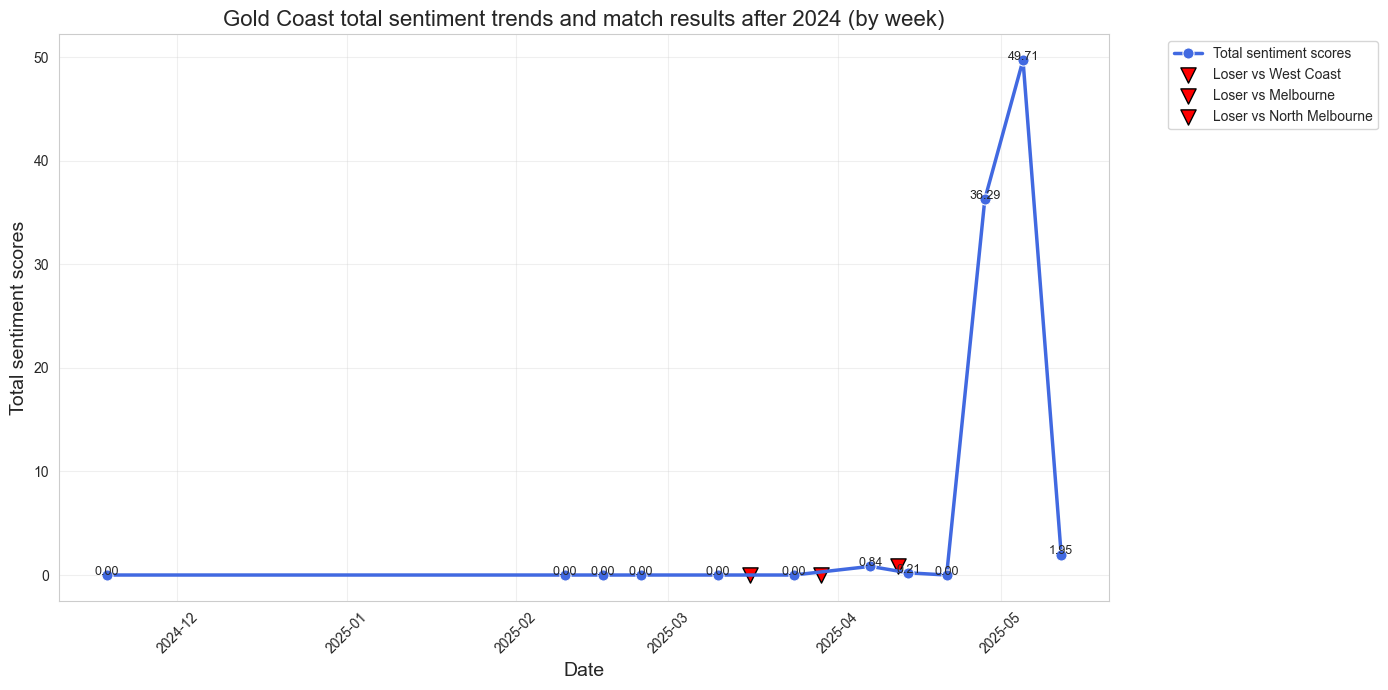

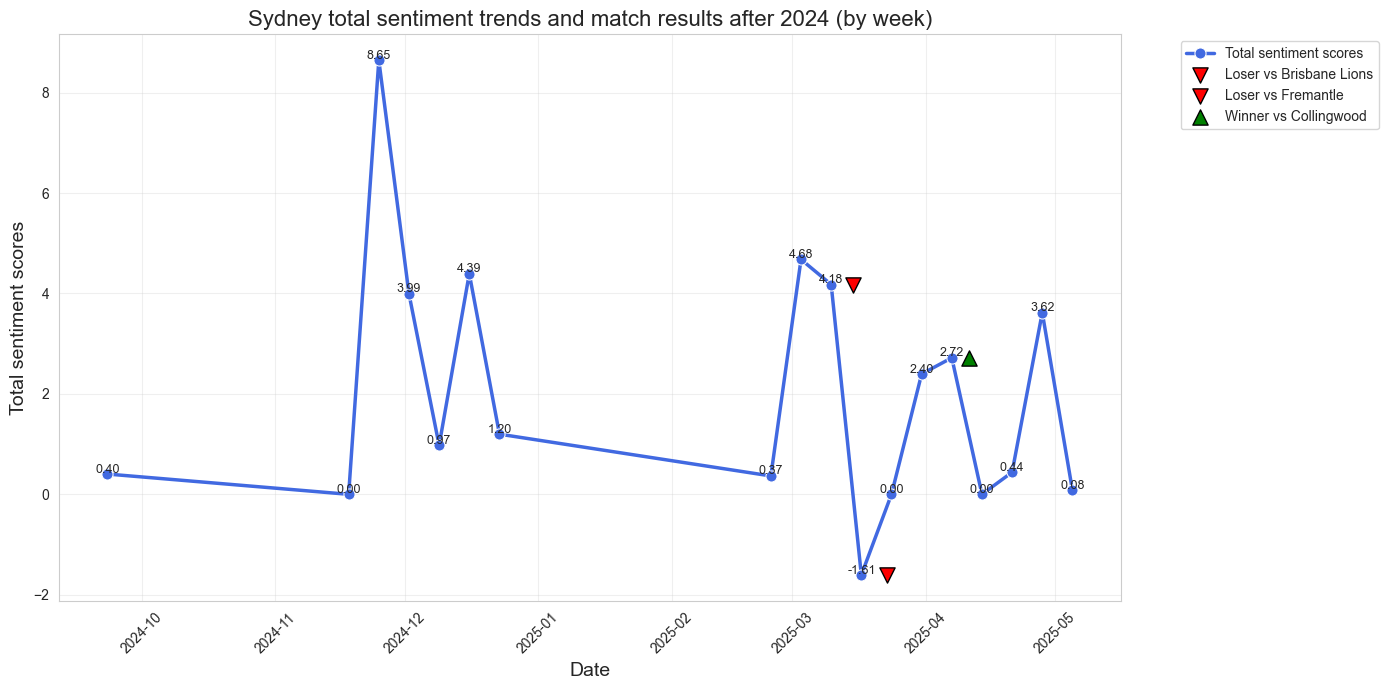

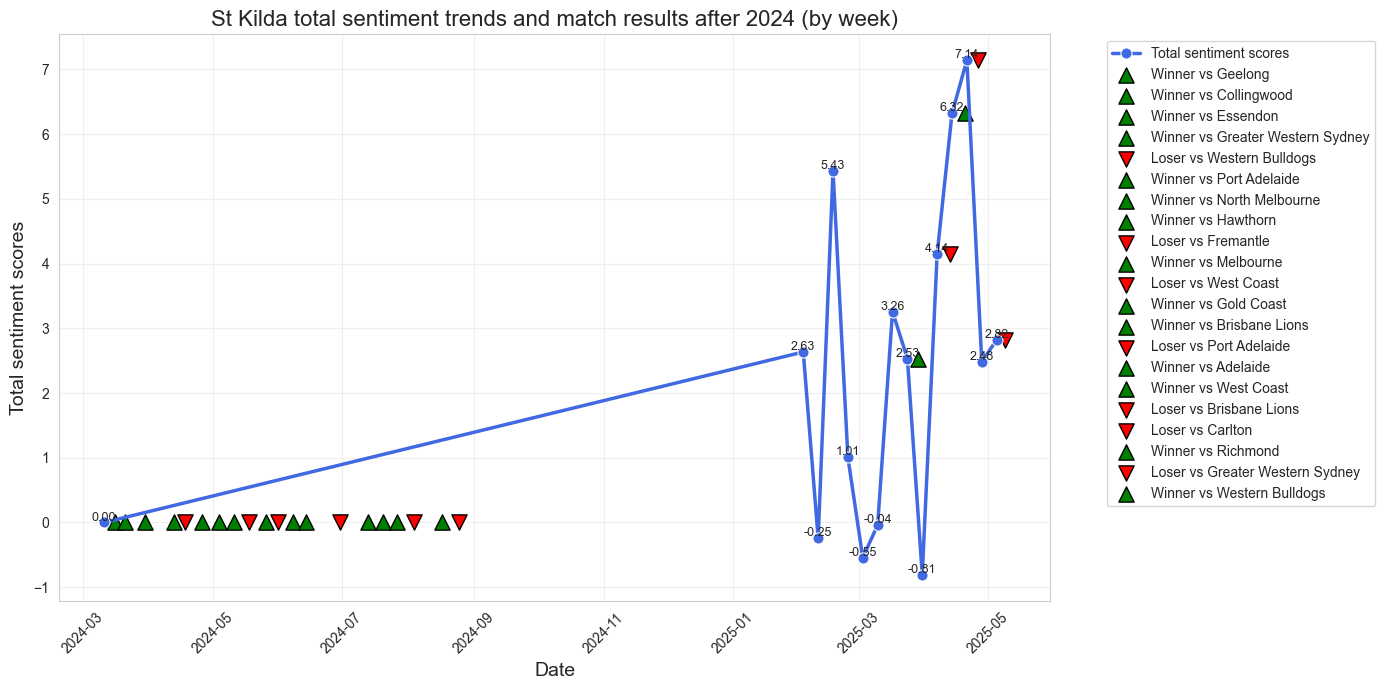

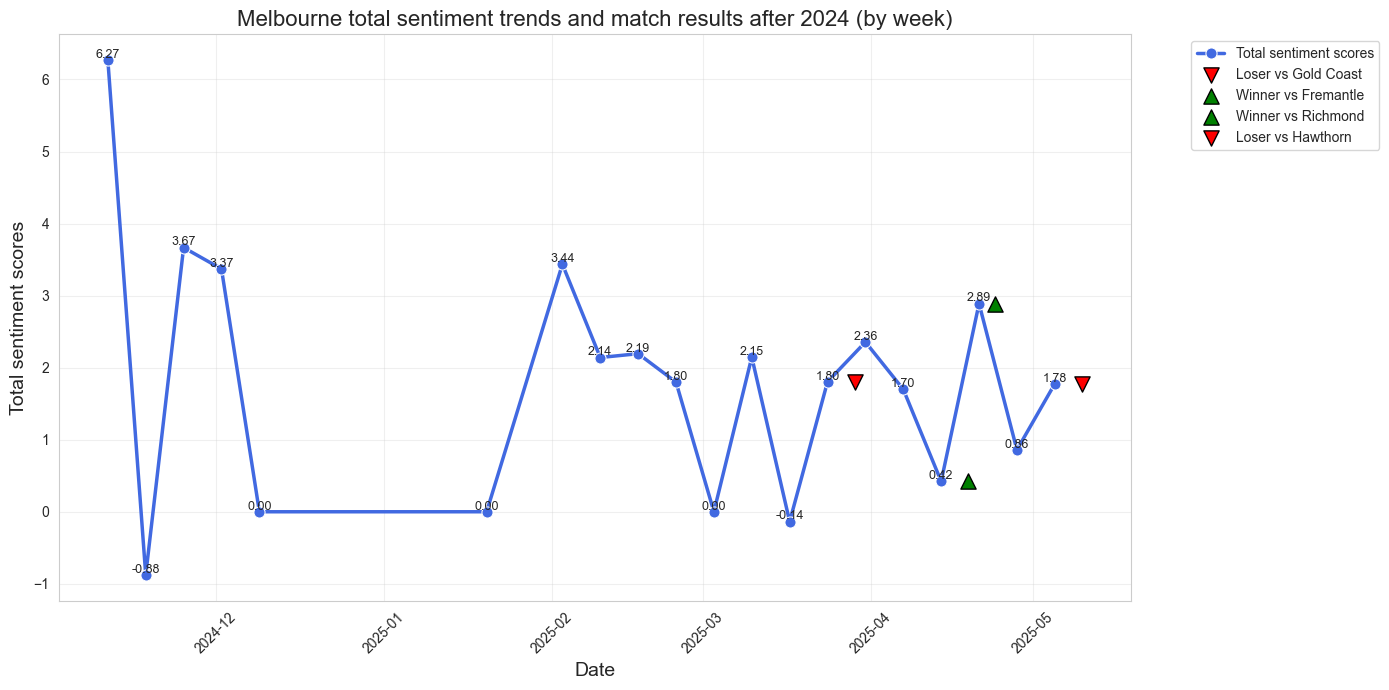

In [235]:
# Total sentiment trends and match results after 2024 (by week) for top 5 teams
response = requests.get('http://localhost:8080/afl/result/sentiment/bluesky', headers={'X-Date-Format': 'week'})
data = response.json()

# Extract data
sentiment_data = data['sentiment_data']
all_teams = sentiment_data['all_teams']
top_teams_data = sentiment_data['top_5']
TEAM_MAPPING = data['team_mapping']
top_teams = [TEAM_MAPPING.get(t['name'], t['name']) for t in top_teams_data]

# Create a sentiment time series DataFrame and standardise the team names
time_dfs = []
for team in all_teams:
    df = pd.DataFrame(team['time_series'])
    standardised_name = TEAM_MAPPING.get(team['name'], team['name'])
    df['team'] = standardised_name
    time_dfs.append(df)
time_df = pd.concat(time_dfs)
time_df['date'] = pd.to_datetime(time_df['date'])
time_df = time_df[time_df['date'] >= '2024-01-01']

# Prepare match data and standardise team names
matches_df = pd.DataFrame(data['match_data'])
matches_df['date'] = pd.to_datetime(matches_df['date'].str.split().str[0])
matches_df['team'] = matches_df['team'].apply(lambda x: TEAM_MAPPING.get(x, x))

# Create a chart for each top 5 team
for team in top_teams:
    plt.figure(figsize=(14, 7))

    team_sentiment = time_df[time_df['team'] == team]
    if team_sentiment.empty:
        print(f"[Warning] cannot find sentiment data of {team}, skip.")
        continue

    sns.lineplot(x='date', y='total_sentiment', 
                 data=team_sentiment, 
                 color='royalblue',
                 linewidth=2.5,
                 marker='o',
                 markersize=8,
                 label='Total sentiment scores')

    team_matches = matches_df[matches_df['team'] == team].sort_values('date')
    for _, match in team_matches.iterrows():
        # Find the sentiment data point closest to the date before the game
        past_data = team_sentiment[team_sentiment['date'] <= match['date']]
        if past_data.empty:
            continue
        closest_idx = past_data['date'].idxmax()
        sentiment_value = team_sentiment.loc[closest_idx, 'total_sentiment']

        # Mark the results of the match
        if match['result'] == "Winner":
            marker = '^'
            color = 'green'
            label = f"Winner vs {match['opponent']}"
        elif match['result'] == "Loser":
            marker = 'v'
            color = 'red'
            label = f"Loser vs {match['opponent']}"
        else:
            marker = 'o'
            color = 'gray'
            label = f"Draw vs {match['opponent']}"

        plt.scatter(match['date'], sentiment_value,
                    marker=marker, color=color, s=120,
                    edgecolors='black', linewidths=1,
                    label=label)

    # Marking Values
    for _, row in team_sentiment.iterrows():
        plt.text(row['date'], row['total_sentiment'] + 0.03,
                 f"{row['total_sentiment']:.2f}",
                 fontsize=9, ha='center')

    plt.title(f'{team} total sentiment trends and match results after 2024 (by week)', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Total sentiment scores', fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)

    # Remove duplicate legends
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(),
               bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

- Total sentiment trends and match results after 2024 (by week) for bottom 5 teams

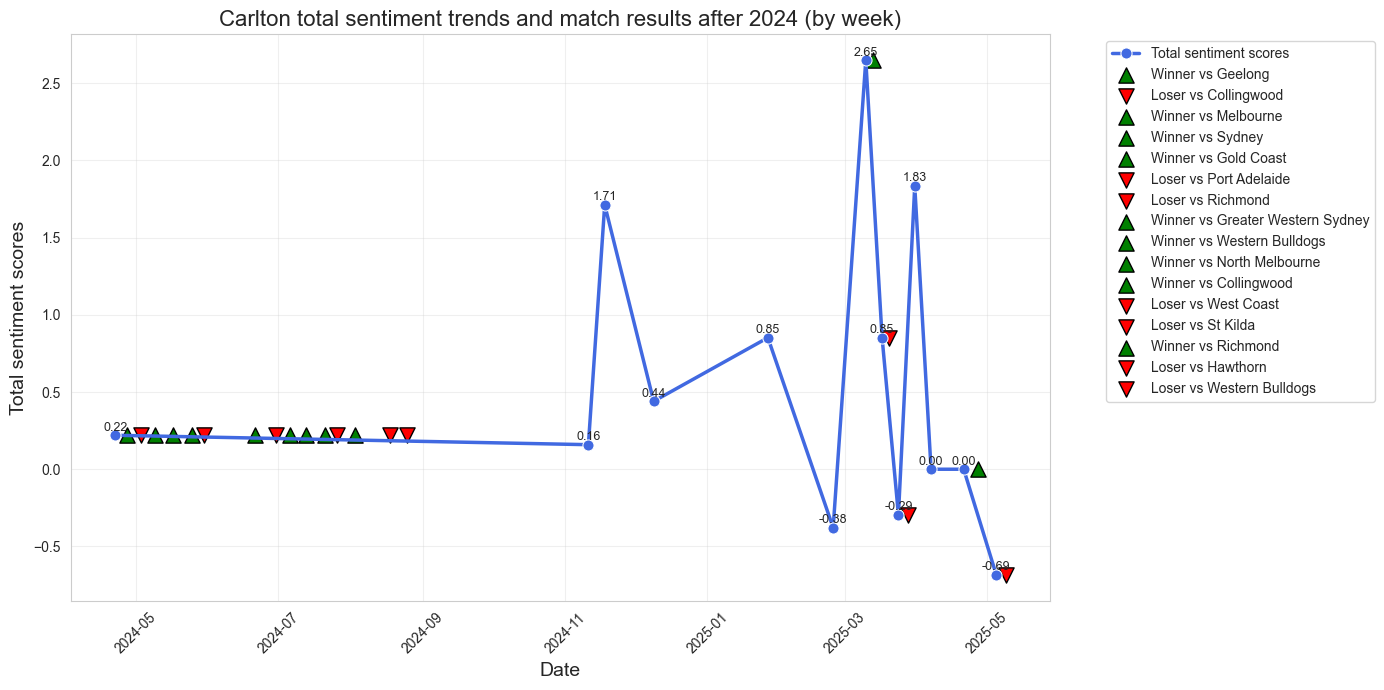

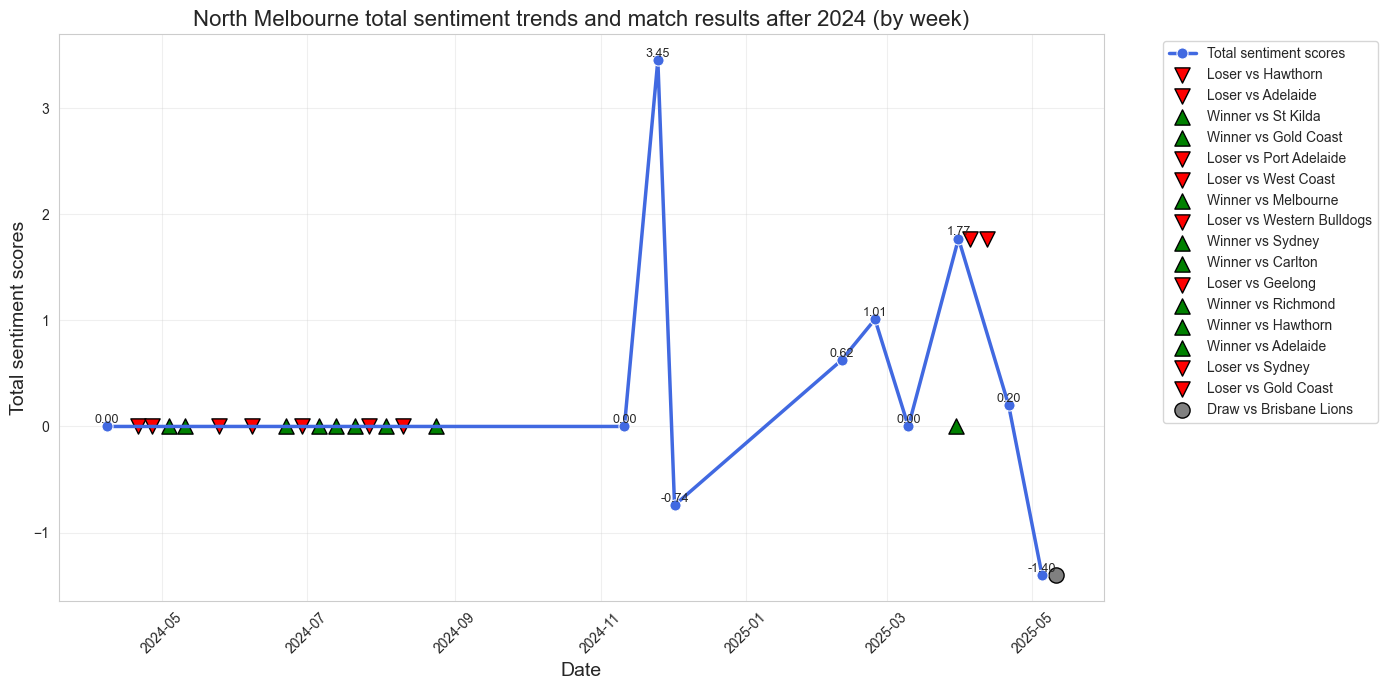

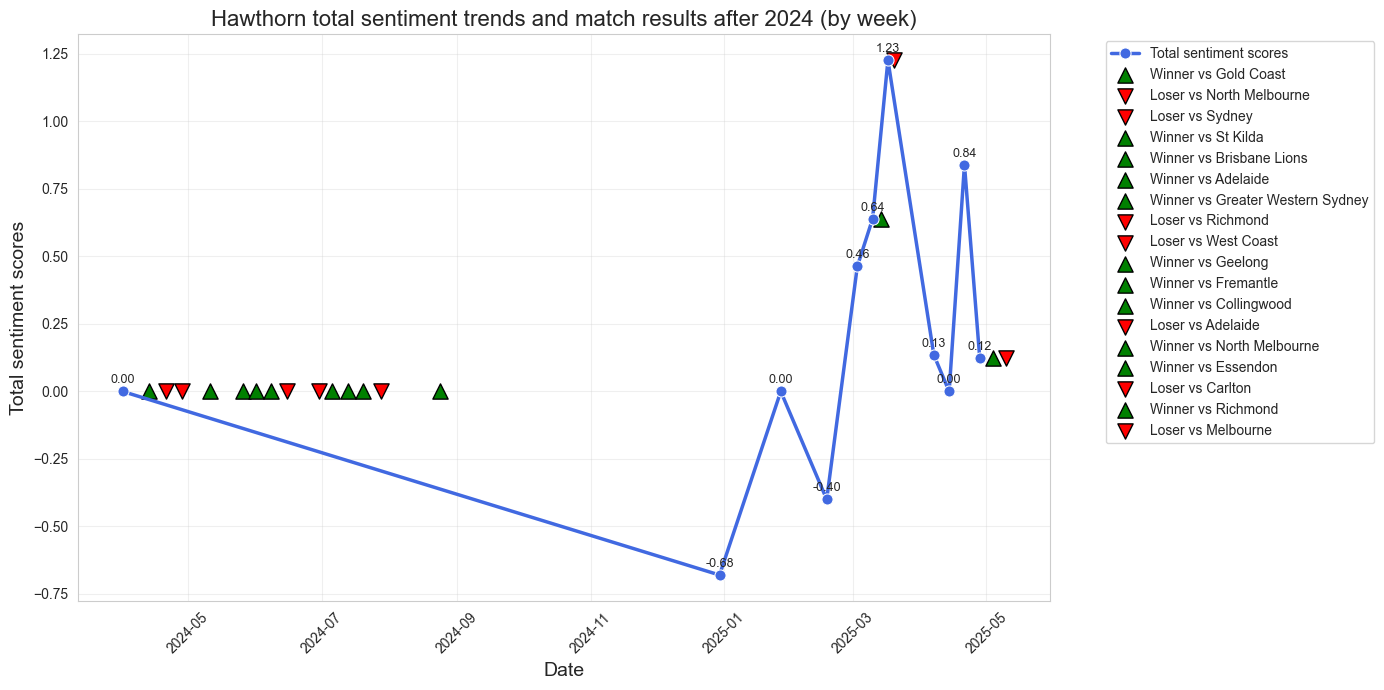

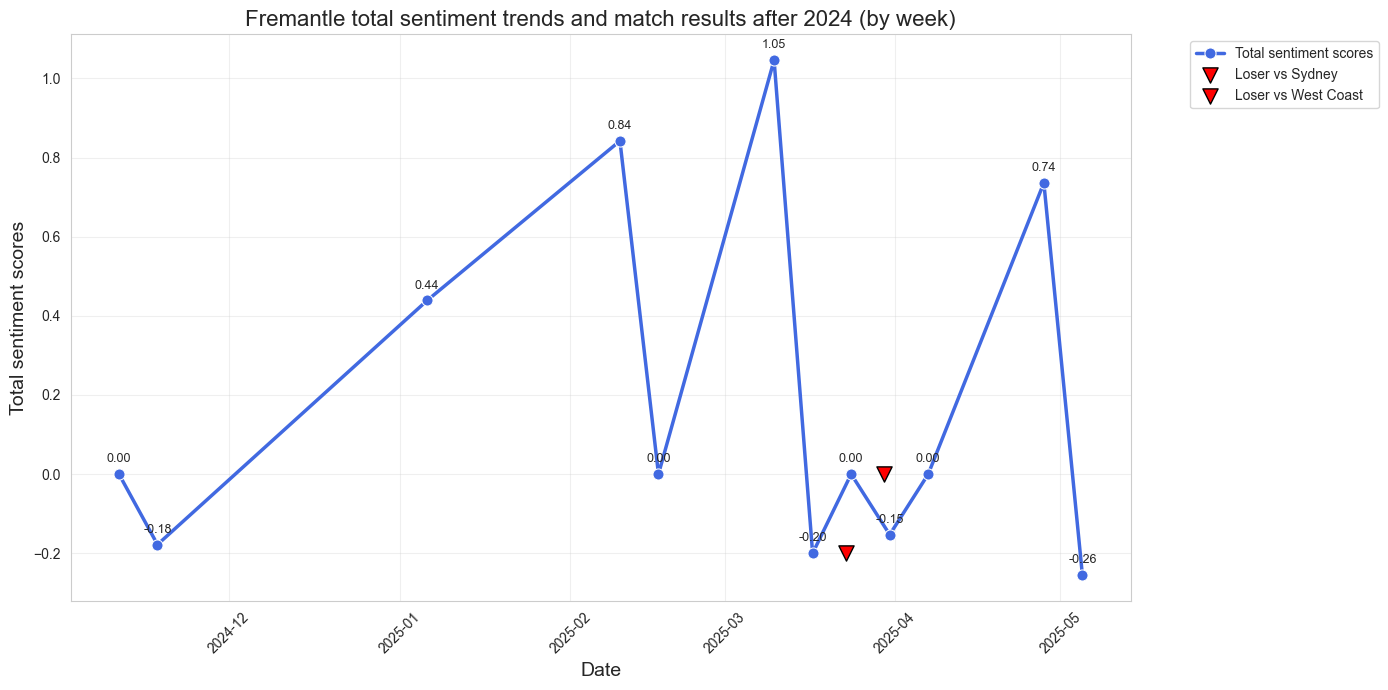

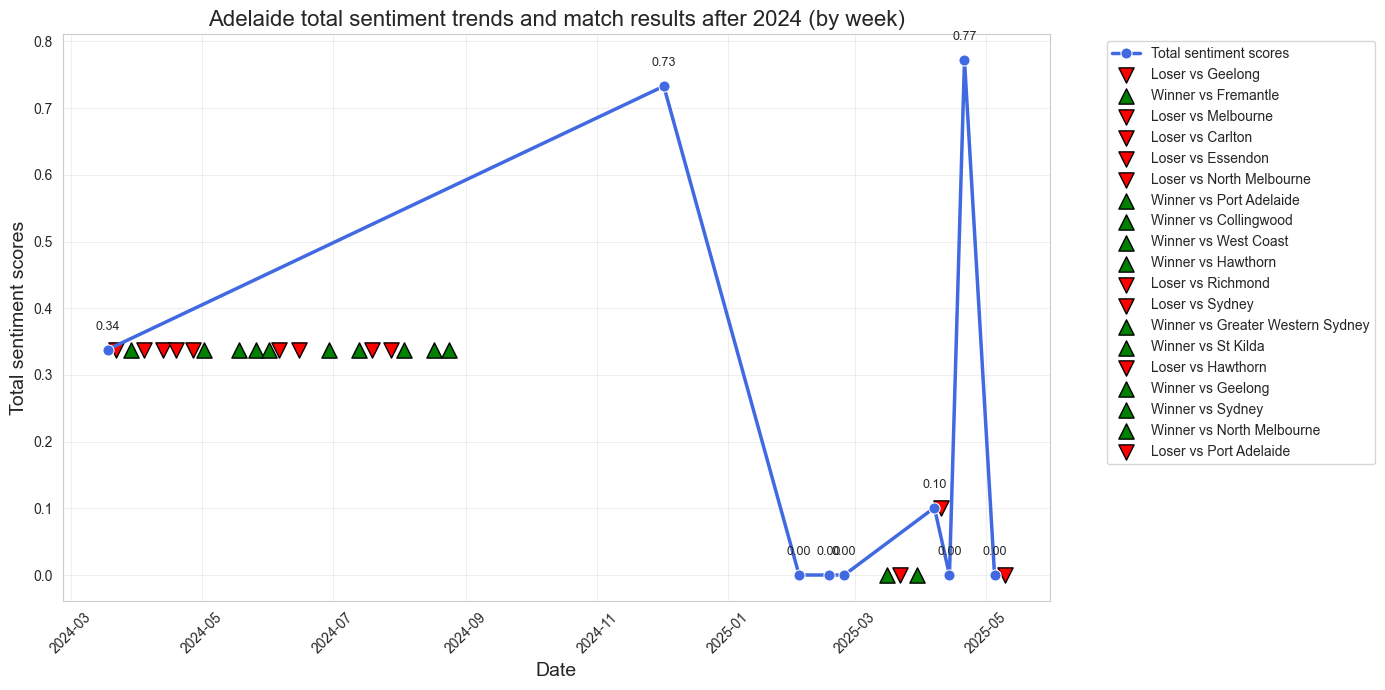

In [237]:
# Total sentiment trends and match results after 2024 (by week) for bottom 5 teams
response = requests.get('http://localhost:8080/afl/result/sentiment/bluesky', headers={'X-Date-Format': 'week'})
data = response.json()

# Extract data
sentiment_data = data['sentiment_data']
all_teams = sentiment_data['all_teams']
bottom_teams_data = sentiment_data['bottom_5']
TEAM_MAPPING = data['team_mapping']
bottom_teams = [TEAM_MAPPING.get(t['name'], t['name']) for t in bottom_teams_data]

# Create a sentiment time series DataFrame and standardise the team names
time_dfs = []
for team in all_teams:
    df = pd.DataFrame(team['time_series'])
    standardised_name = TEAM_MAPPING.get(team['name'], team['name'])
    df['team'] = standardised_name
    time_dfs.append(df)
time_df = pd.concat(time_dfs)
time_df['date'] = pd.to_datetime(time_df['date'])
time_df = time_df[time_df['date'] >= '2024-01-01']

# Prepare match data and standardise team names
matches_df = pd.DataFrame(data['match_data'])
matches_df['date'] = pd.to_datetime(matches_df['date'].str.split().str[0])
matches_df['team'] = matches_df['team'].apply(lambda x: TEAM_MAPPING.get(x, x))

# Create a chart for each bottom 5 team
for team in bottom_teams:
    plt.figure(figsize=(14, 7))

    team_sentiment = time_df[time_df['team'] == team]
    if team_sentiment.empty:
        print(f"[Warning] cannot find sentiment data of {team}, skip.")
        continue

    sns.lineplot(x='date', y='total_sentiment', 
                 data=team_sentiment, 
                 color='royalblue',
                 linewidth=2.5,
                 marker='o',
                 markersize=8,
                 label='Total sentiment scores')

    team_matches = matches_df[matches_df['team'] == team].sort_values('date')
    for _, match in team_matches.iterrows():
        # Find the sentiment data point closest to the date before the game
        past_data = team_sentiment[team_sentiment['date'] <= match['date']]
        if past_data.empty:
            continue
        closest_idx = past_data['date'].idxmax()
        sentiment_value = team_sentiment.loc[closest_idx, 'total_sentiment']

        # Mark the results of the match
        if match['result'] == "Winner":
            marker = '^'
            color = 'green'
            label = f"Winner vs {match['opponent']}"
        elif match['result'] == "Loser":
            marker = 'v'
            color = 'red'
            label = f"Loser vs {match['opponent']}"
        else:
            marker = 'o'
            color = 'gray'
            label = f"Draw vs {match['opponent']}"

        plt.scatter(match['date'], sentiment_value,
                    marker=marker, color=color, s=120,
                    edgecolors='black', linewidths=1,
                    label=label)

    # Marking Values
    for _, row in team_sentiment.iterrows():
        plt.text(row['date'], row['total_sentiment'] + 0.03,
                 f"{row['total_sentiment']:.2f}",
                 fontsize=9, ha='center')

    plt.title(f'{team} total sentiment trends and match results after 2024 (by week)', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Total sentiment scores', fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)

    # Remove duplicate legends
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(),
               bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

### 4. Cross-Platform Sentiment Trends and Match Win Rates Comparison in 2024 for Top/Bottom 5 Team
#### Reddit
- Total Sentiment Scores vs Win Rate for Top/Bottom 5 Team

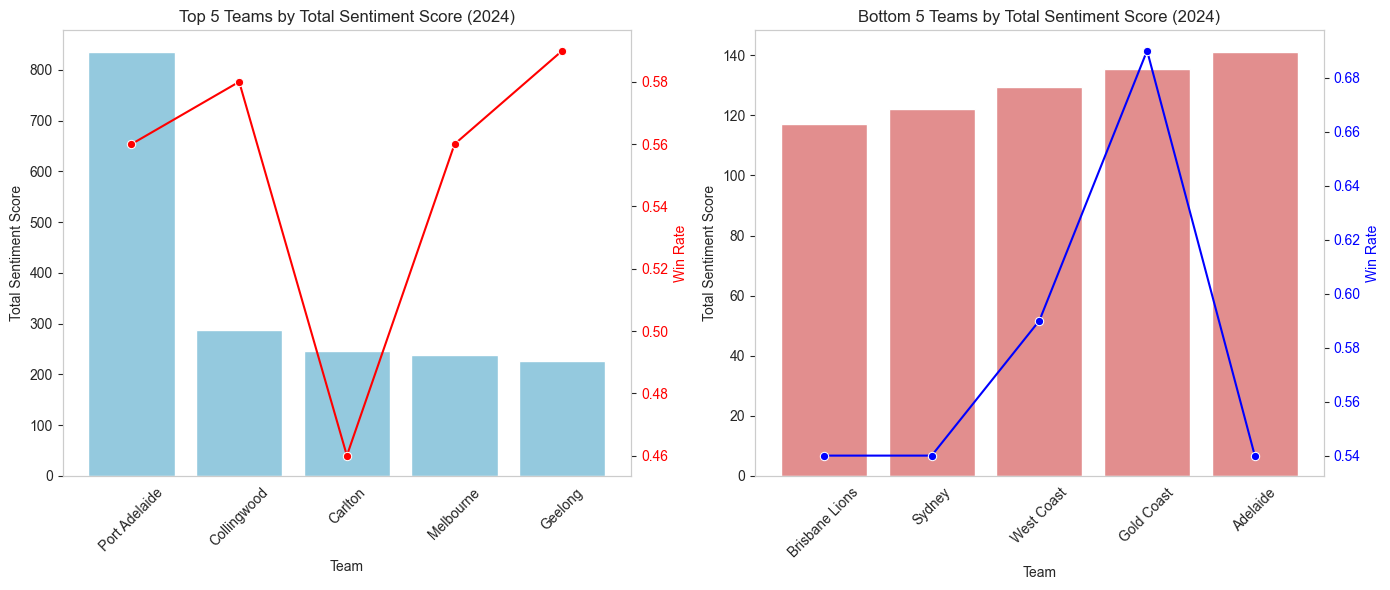

In [239]:
response = requests.get('http://localhost:8080/afl/sentiment/winloss/reddit')
data = response.json()

# Extract and prepare sentiment data
teams_sentiment = data['all_teams']
top_teams = data['top_5']
bottom_teams = data['bottom_5']
matches_data = data['matches_data']
TEAM_MAPPING = data['team_mapping']

# Create a DataFrame for sentiment scores
sentiment_df = pd.DataFrame(teams_sentiment)
# Apply team name mapping
sentiment_df['team_name'] = sentiment_df['name'].map(lambda x: TEAM_MAPPING.get(x, x))

# Filter for top 5 and bottom 5 teams
top_sentiment = sentiment_df[sentiment_df['team_name'].isin(top_teams)]
bottom_sentiment = sentiment_df[sentiment_df['team_name'].isin(bottom_teams)]

# Create a DataFrame for matched data
match_list = []
for team, stats in matches_data.items():
    stats['team'] = team
    match_list.append(stats)
match_df = pd.DataFrame(match_list)

# Merge sentiment and performance data
analysis_df = pd.merge(
    sentiment_df,
    match_df,
    left_on='team_name',
    right_on='team',
    how='inner'
)

# Visualisation
plt.figure(figsize=(14, 6))

# Top 5 Teams - Total Sentiment vs Win Rate
top_df = analysis_df[analysis_df['team_name'].isin(top_teams)].sort_values('total_sentiment', ascending=False)

ax1 = plt.subplot(121)
sns.barplot(data=top_df, x='team_name', y='total_sentiment', color='skyblue', ax=ax1)
ax1.set_title('Top 5 Teams by Total Sentiment Score (2024)')
ax1.set_ylabel('Total Sentiment Score')
ax1.set_xlabel('Team')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(False)

ax2 = ax1.twinx()
sns.lineplot(data=top_df, x='team_name', y='win_rate', color='red', marker='o', ax=ax2)
ax2.set_ylabel('Win Rate', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.grid(False)

# Bottom 5 Teams - Total Sentiment vs Win Rate
bottom_df = analysis_df[analysis_df['team_name'].isin(bottom_teams)].sort_values('total_sentiment')

ax3 = plt.subplot(122)
sns.barplot(data=bottom_df, x='team_name', y='total_sentiment', color='lightcoral', ax=ax3)
ax3.set_title('Bottom 5 Teams by Total Sentiment Score (2024)')
ax3.set_ylabel('Total Sentiment Score')
ax3.set_xlabel('Team')
ax3.tick_params(axis='x', rotation=45)
ax3.grid(False)

ax4 = ax3.twinx()
sns.lineplot(data=bottom_df, x='team_name', y='win_rate', color='blue', marker='o', ax=ax4)
ax4.set_ylabel('Win Rate', color='blue')
ax4.tick_params(axis='y', labelcolor='blue')
ax4.grid(False)

plt.tight_layout()
plt.show()

- Scatter plot of Total Sentiment vs Win Rate for Top/Bottom 5 Team

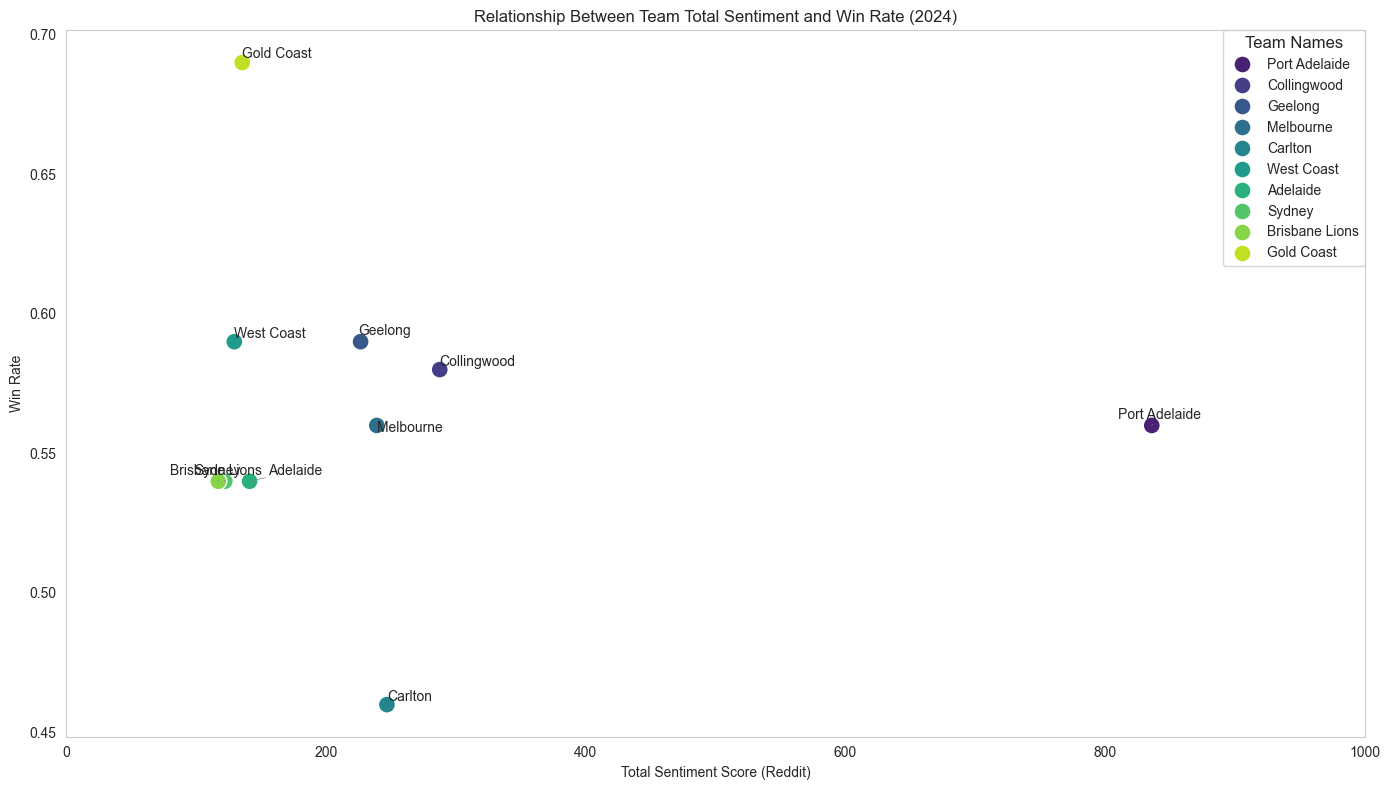

Correlation between sentiment and win rate for Reddit: -0.09


In [241]:
# Scatter plot of Total Sentiment vs Win Rate for top 5 and bottom 5 teams
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=analysis_df,
    x='total_sentiment',
    y='win_rate',
    hue='team_name',
    s=150,
    palette='viridis'
)

texts = []
for _, row in analysis_df.iterrows():
    texts.append(plt.text(
        row['total_sentiment'],
        row['win_rate'],
        row['team_name'],
        fontsize=10
    ))

adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

legend = plt.legend(
    loc='upper right',
    borderaxespad=0.,
    fontsize=10, 
    title='Team Names',
    title_fontsize=12
)

plt.title('Relationship Between Team Total Sentiment and Win Rate (2024)')
plt.xlim(0, 1000) 
plt.xlabel('Total Sentiment Score (Reddit)')
plt.ylabel('Win Rate')
plt.grid(False)

plt.tight_layout()
plt.show()

# Correlation analysis
correlation = analysis_df[['total_sentiment', 'win_rate']].corr().iloc[0,1]
print(f"Correlation between sentiment and win rate for Reddit: {correlation:.2f}")

#### Bluesky
- Total Sentiment Scores vs Win Rate for Top/Bottom 5 Team

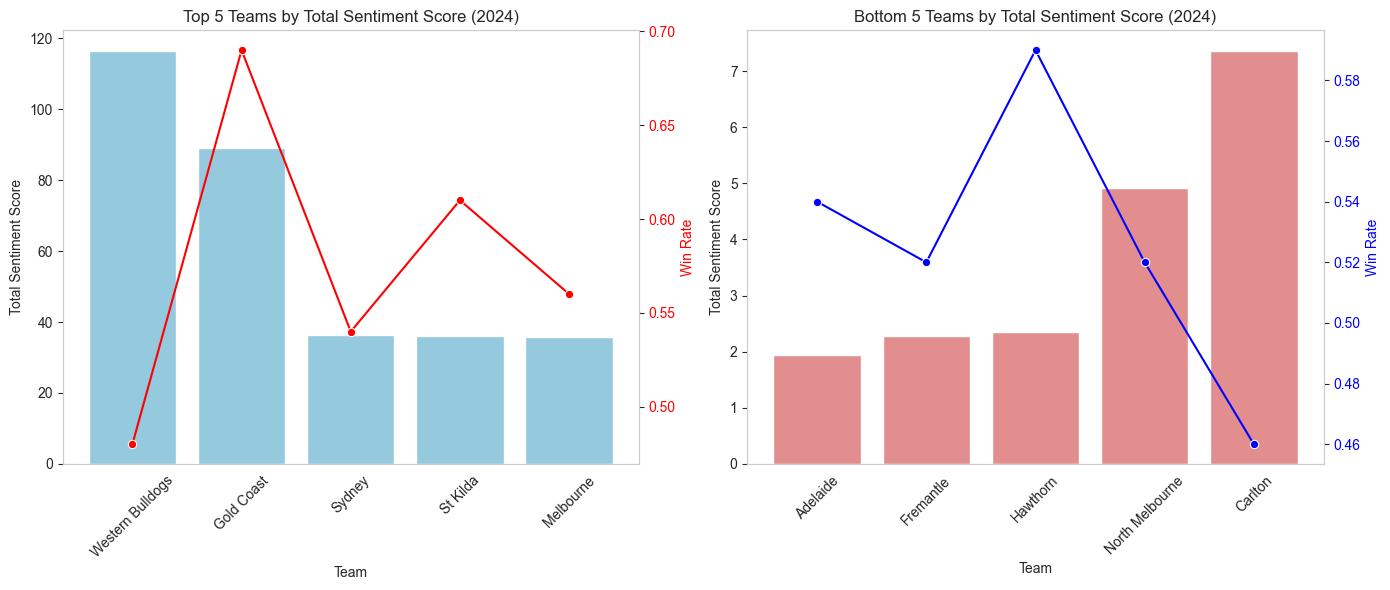

In [243]:
response = requests.get('http://localhost:8080/afl/sentiment/winloss/bluesky')
data = response.json()

# Extract and prepare sentiment data
teams_sentiment = data['all_teams']
top_teams = data['top_5']
bottom_teams = data['bottom_5']
matches_data = data['matches_data']
TEAM_MAPPING = data['team_mapping']

# Create a DataFrame for sentiment scores
sentiment_df = pd.DataFrame(teams_sentiment)
# Apply team name mapping
sentiment_df['team_name'] = sentiment_df['name'].map(lambda x: TEAM_MAPPING.get(x, x))

# Filter for top 5 and bottom 5 teams
top_sentiment = sentiment_df[sentiment_df['team_name'].isin(top_teams)]
bottom_sentiment = sentiment_df[sentiment_df['team_name'].isin(bottom_teams)]

# Create a DataFrame for matched data
match_list = []
for team, stats in matches_data.items():
    stats['team'] = team
    match_list.append(stats)
match_df = pd.DataFrame(match_list)

# Merge sentiment and performance data
analysis_df = pd.merge(
    sentiment_df,
    match_df,
    left_on='team_name',
    right_on='team',
    how='inner'
)

# Visualisation
plt.figure(figsize=(14, 6))

# Top 5 Teams - Total Sentiment vs Win Rate
top_df = analysis_df[analysis_df['team_name'].isin(top_teams)].sort_values('total_sentiment', ascending=False)

ax1 = plt.subplot(121)
sns.barplot(data=top_df, x='team_name', y='total_sentiment', color='skyblue', ax=ax1)
ax1.set_title('Top 5 Teams by Total Sentiment Score (2024)')
ax1.set_ylabel('Total Sentiment Score')
ax1.set_xlabel('Team')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(False)

ax2 = ax1.twinx()
sns.lineplot(data=top_df, x='team_name', y='win_rate', color='red', marker='o', ax=ax2)
ax2.set_ylabel('Win Rate', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.grid(False)

# Bottom 5 Teams - Total Sentiment vs Win Rate
bottom_df = analysis_df[analysis_df['team_name'].isin(bottom_teams)].sort_values('total_sentiment')

ax3 = plt.subplot(122)
sns.barplot(data=bottom_df, x='team_name', y='total_sentiment', color='lightcoral', ax=ax3)
ax3.set_title('Bottom 5 Teams by Total Sentiment Score (2024)')
ax3.set_ylabel('Total Sentiment Score')
ax3.set_xlabel('Team')
ax3.tick_params(axis='x', rotation=45)
ax3.grid(False)

ax4 = ax3.twinx()
sns.lineplot(data=bottom_df, x='team_name', y='win_rate', color='blue', marker='o', ax=ax4)
ax4.set_ylabel('Win Rate', color='blue')
ax4.tick_params(axis='y', labelcolor='blue')
ax4.grid(False)

plt.tight_layout()
plt.show()

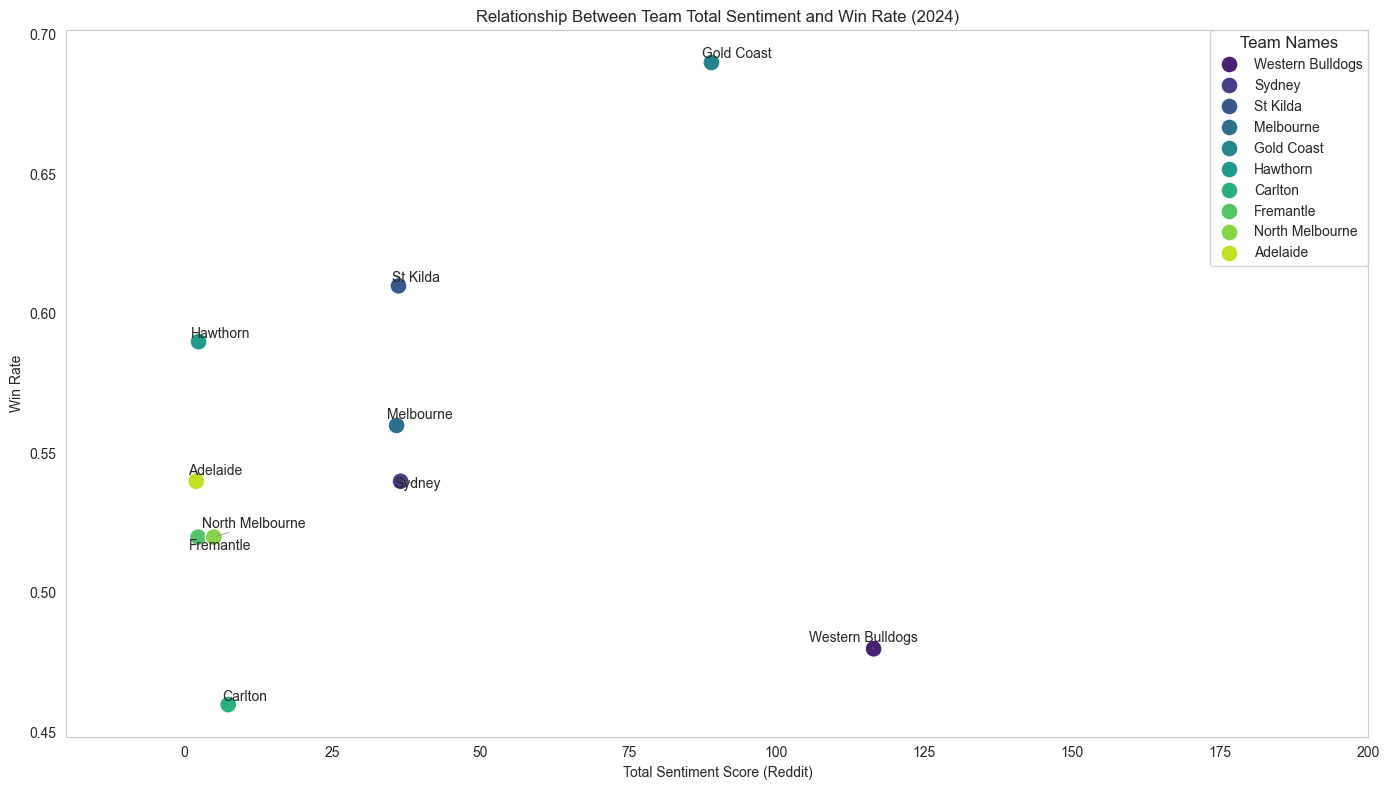

Correlation between sentiment and win rate for Bluesky: 0.22


In [244]:
# Scatter plot of Total Sentiment vs Win Rate for top 5 and bottom 5 teams
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=analysis_df,
    x='total_sentiment',
    y='win_rate',
    hue='team_name',
    s=150,
    palette='viridis'
)

texts = []
for _, row in analysis_df.iterrows():
    texts.append(plt.text(
        row['total_sentiment'],
        row['win_rate'],
        row['team_name'],
        fontsize=10
    ))

adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

legend = plt.legend(
    loc='upper right',
    borderaxespad=0.,
    fontsize=10, 
    title='Team Names',
    title_fontsize=12
)

plt.title('Relationship Between Team Total Sentiment and Win Rate (2024)')
plt.xlim(-20, 200) 
plt.xlabel('Total Sentiment Score (Reddit)')
plt.ylabel('Win Rate')
plt.grid(False)

plt.tight_layout()
plt.show()

# Correlation analysis
correlation = analysis_df[['total_sentiment', 'win_rate']].corr().iloc[0,1]
print(f"Correlation between sentiment and win rate for Bluesky: {correlation:.2f}")

### 5. Home Advantage Analytics

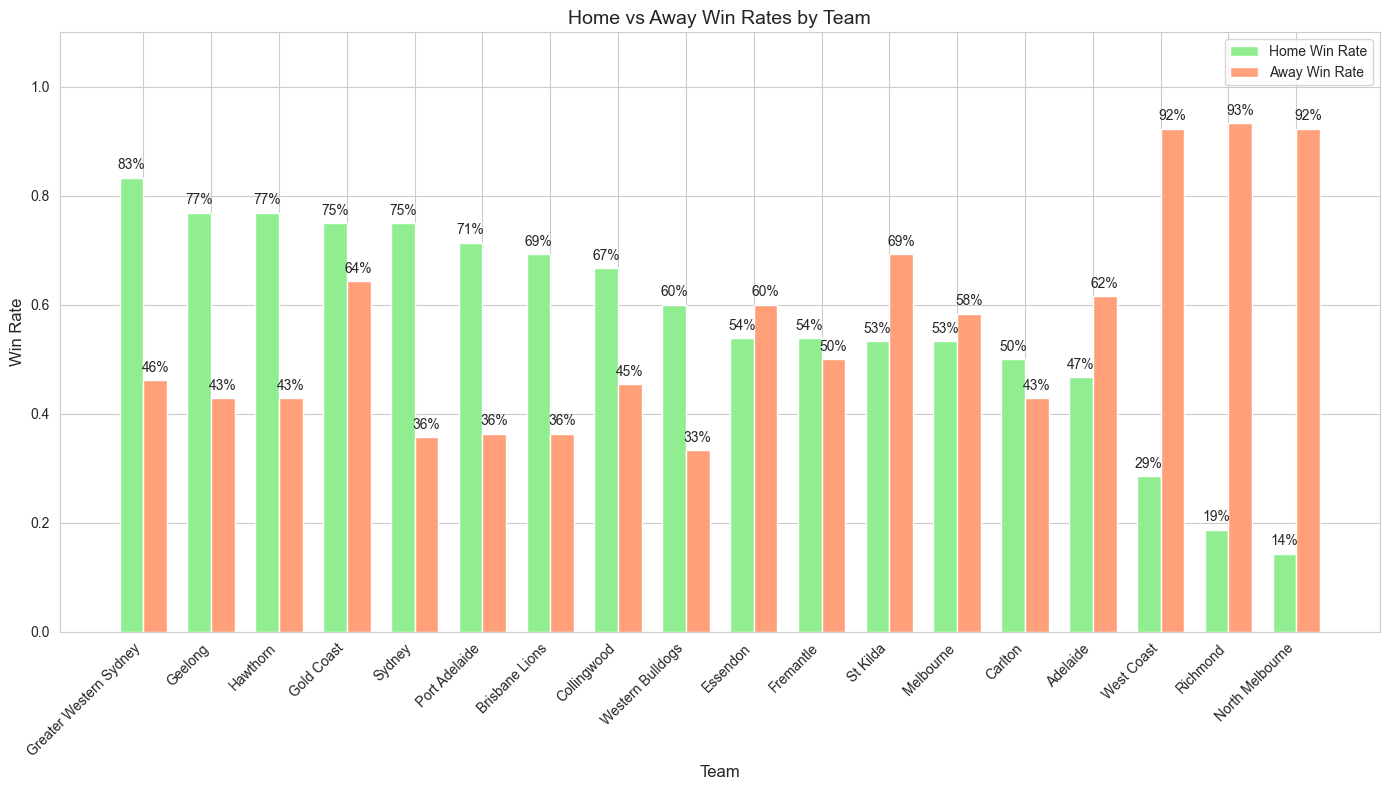

In [246]:
response = requests.get('http://localhost:8080/afl/result/home')
data = response.json()

# Create DataFrame
df = pd.DataFrame(data['teams_performance'])

plt.figure(figsize=(14, 8))

# Sort by home win rate
df = df.sort_values('home_win_rate', ascending=False)

# Create positions for bar
bar_width = 0.35
index = np.arange(len(df))

plt.bar(index, df['home_win_rate'], bar_width, label='Home Win Rate', color='LightGreen')
plt.bar(index + bar_width, df['away_win_rate'], bar_width, label='Away Win Rate', color='LightSalmon')

plt.xlabel('Team', fontsize=12)
plt.ylabel('Win Rate', fontsize=12)
plt.title('Home vs Away Win Rates by Team', fontsize=14)
plt.xticks(index + bar_width/2, df['team'], rotation=45, ha='right')
plt.legend()

# Add value labels
for i, (hwr, awr) in enumerate(zip(df['home_win_rate'], df['away_win_rate'])):
    plt.text(i, hwr + 0.01, f"{hwr:.0%}", ha='center', va='bottom')
    plt.text(i + bar_width, awr + 0.01, f"{awr:.0%}", ha='center', va='bottom')

plt.ylim(0, 1.1)

plt.tight_layout()
plt.show()

### 6. Cross-Platform Subscribers Comparison: Top/Bottom 5 Teams by Number of Subscribers
#### Reddit

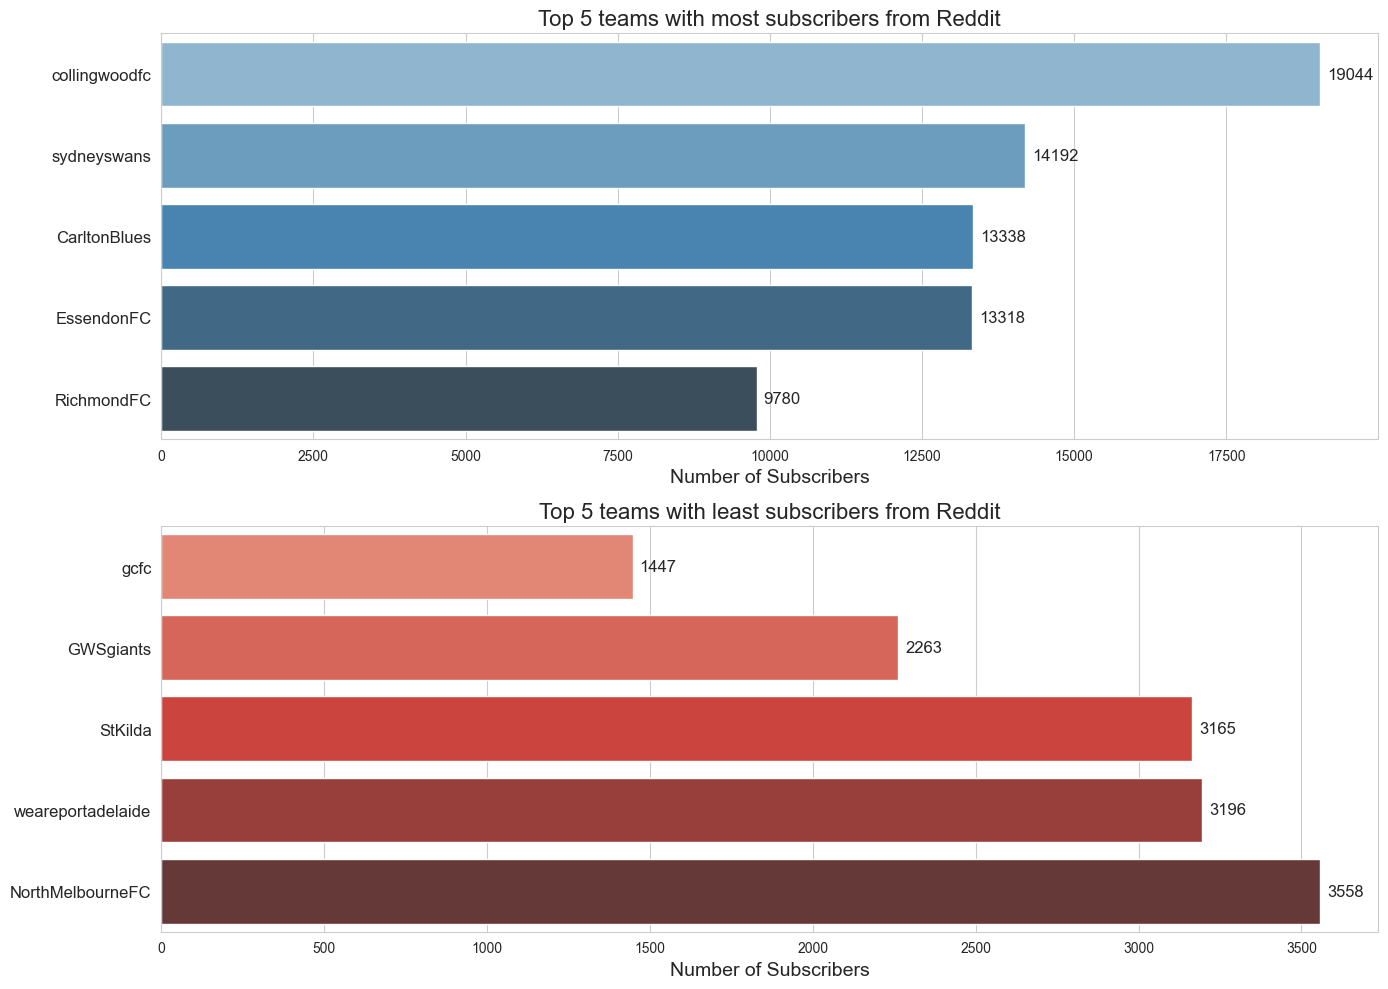

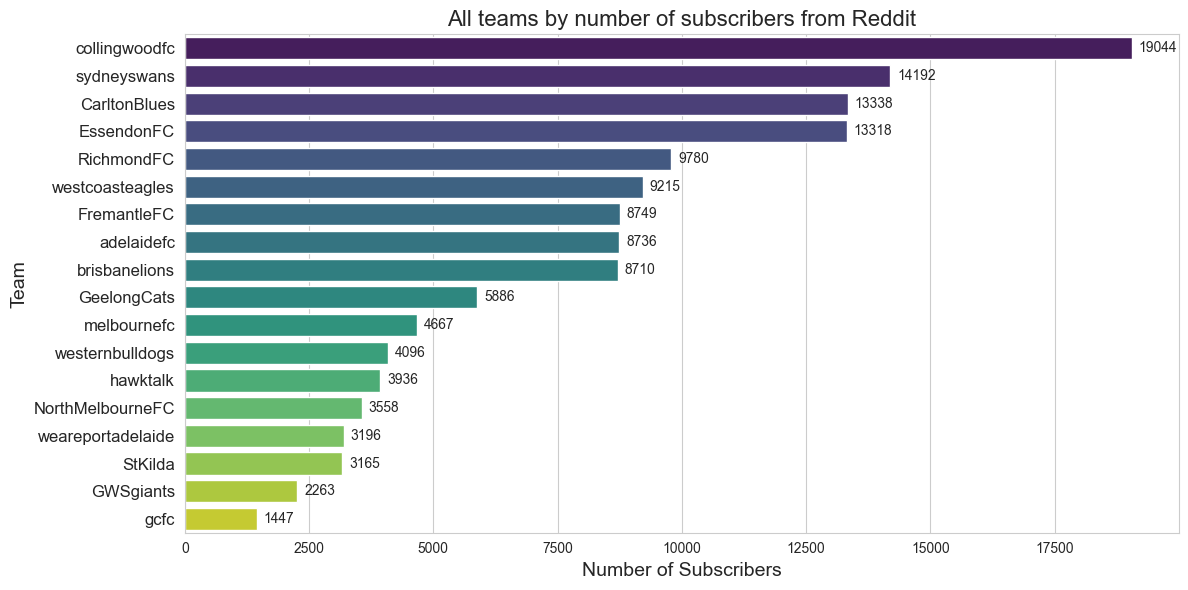

In [248]:
response = requests.get('http://localhost:8080/afl/subscribers/reddit')
data = response.json()

if 'top_5_teams_subscribers' not in data:
    print("Error:", data.get('error', 'data error'))
else:
    # Create DataFrame
    top_df = pd.DataFrame(data['top_5_teams_subscribers'])
    bottom_df = pd.DataFrame(data['bottom_5_teams_subscribers'])
    all_df = pd.DataFrame(data['all_teams_subscribers'])  # All teams data

    # Visualisation
    plt.figure(figsize=(14, 10))

    # Top 5 teams
    plt.subplot(2, 1, 1)
    ax1 = sns.barplot(x='subscribers', y='name', data=top_df, palette='Blues_d')
    plt.title('Top 5 teams with most subscribers from Reddit', fontsize=16)
    plt.xlabel('Number of Subscribers', fontsize=14)
    plt.ylabel('')
    ax1.set_yticklabels(top_df['name'], fontsize=12)

    for p in ax1.patches:
        ax1.annotate(f"{p.get_width():.0f}", 
                    (p.get_width(), p.get_y() + p.get_height()/2),
                    ha='left', va='center',
                    xytext=(5, 0),  # Offset from bar end
                    textcoords='offset points',
                    fontsize=12)

    # Bottom 5 teams
    plt.subplot(2, 1, 2)
    ax2 = sns.barplot(x='subscribers', y='name', data=bottom_df, palette='Reds_d')
    plt.title('Top 5 teams with least subscribers from Reddit', fontsize=16)
    plt.xlabel('Number of Subscribers', fontsize=14)
    plt.ylabel('')
    ax2.set_yticklabels(bottom_df['name'], fontsize=12)

    for p in ax2.patches:
        ax2.annotate(f"{p.get_width():.0f}", 
                    (p.get_width(), p.get_y() + p.get_height()/2),
                    ha='left', va='center',
                    xytext=(5, 0),  # Offset from bar end
                    textcoords='offset points',
                    fontsize=12)

    plt.tight_layout()
    plt.show()

    # All teams plot with labels
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x='subscribers', y='name', data=all_df, palette='viridis')
    plt.title('All teams by number of subscribers from Reddit', fontsize=16)
    plt.xlabel('Number of Subscribers', fontsize=14)
    plt.ylabel('Team', fontsize=14)
    ax.set_yticklabels(all_df['name'], fontsize=12)
    
    # Add value labels to all teams
    for p in ax.patches:
        ax.annotate(f"{p.get_width():.0f}", 
                   (p.get_width(), p.get_y() + p.get_height()/2),
                   ha='left', va='center',
                   xytext=(5, 0),  # Offset from bar end
                   textcoords='offset points',
                   fontsize=10)
    
    plt.tight_layout()
    plt.show()

#### Bluesky

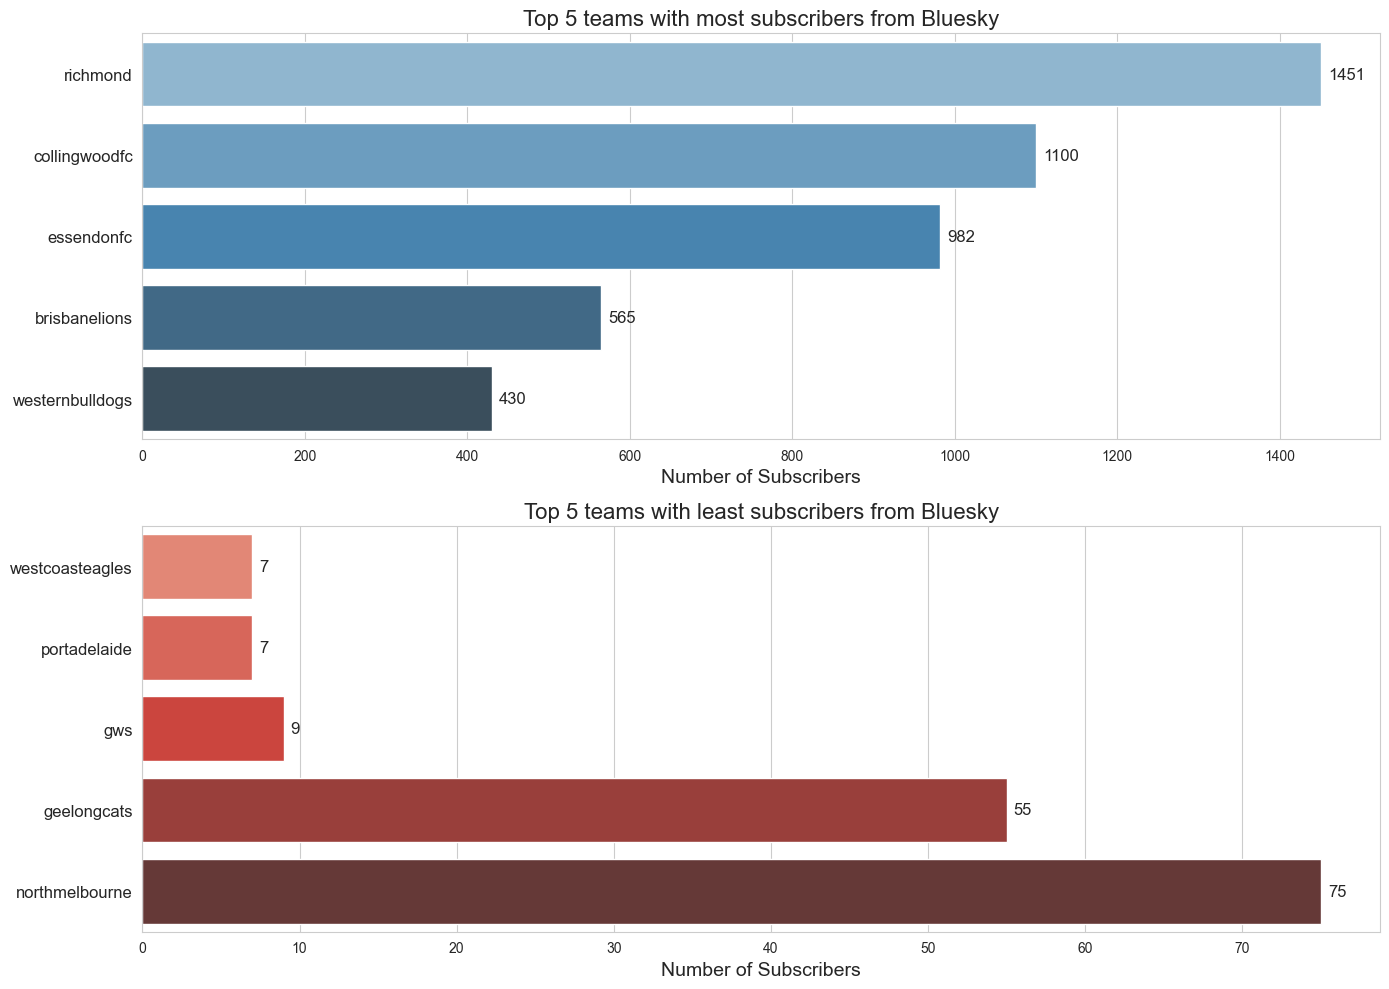

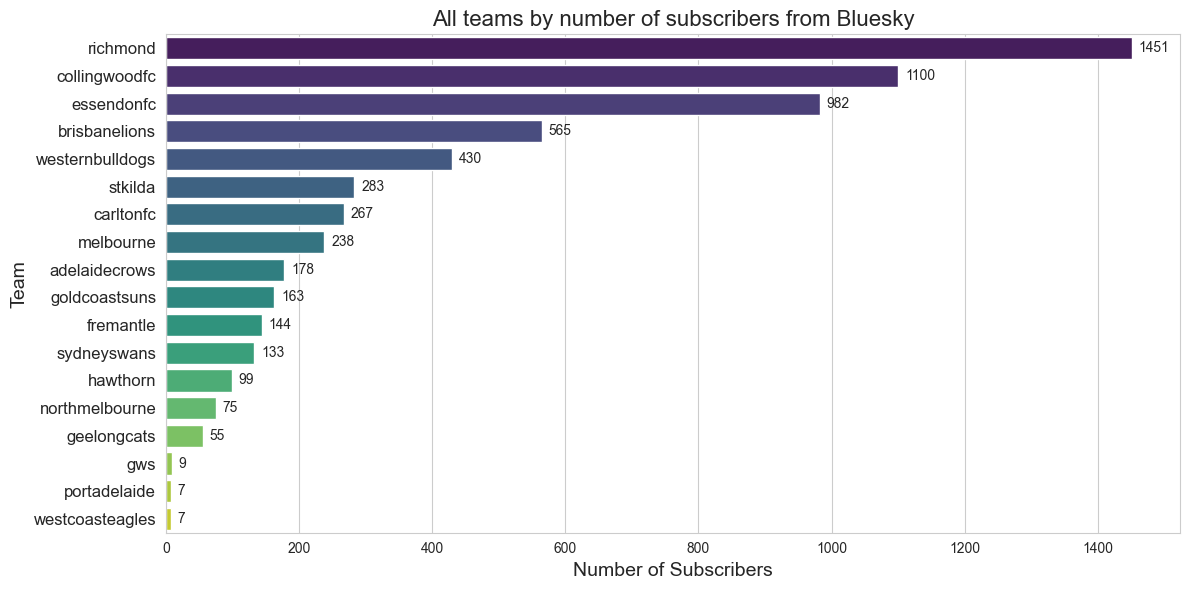

In [250]:
response = requests.get('http://localhost:8080/afl/subscribers/bluesky')
data = response.json()

if 'top_5_teams_subscribers' not in data:
    print("Error:", data.get('error', 'data error'))
else:
    # Create DataFrame
    top_df = pd.DataFrame(data['top_5_teams_subscribers'])
    bottom_df = pd.DataFrame(data['bottom_5_teams_subscribers'])
    all_df = pd.DataFrame(data['all_teams_subscribers'])  # All teams data

    # Visualisation
    plt.figure(figsize=(14, 10))

    # Top 5 teams
    plt.subplot(2, 1, 1)
    ax1 = sns.barplot(x='followers', y='name', data=top_df, palette='Blues_d')
    plt.title('Top 5 teams with most subscribers from Bluesky', fontsize=16)
    plt.xlabel('Number of Subscribers', fontsize=14)
    plt.ylabel('')
    ax1.set_yticklabels(top_df['name'], fontsize=12)

    for p in ax1.patches:
        ax1.annotate(f"{p.get_width():.0f}", 
                    (p.get_width(), p.get_y() + p.get_height()/2),
                    ha='left', va='center',
                    xytext=(5, 0),  # Offset from bar end
                    textcoords='offset points',
                    fontsize=12)

    # Bottom 5 teams
    plt.subplot(2, 1, 2)
    ax2 = sns.barplot(x='followers', y='name', data=bottom_df, palette='Reds_d')
    plt.title('Top 5 teams with least subscribers from Bluesky', fontsize=16)
    plt.xlabel('Number of Subscribers', fontsize=14)
    plt.ylabel('')
    ax2.set_yticklabels(bottom_df['name'], fontsize=12)

    for p in ax2.patches:
        ax2.annotate(f"{p.get_width():.0f}", 
                    (p.get_width(), p.get_y() + p.get_height()/2),
                    ha='left', va='center',
                    xytext=(5, 0),  # Offset from bar end
                    textcoords='offset points',
                    fontsize=12)

    plt.tight_layout()
    plt.show()

    # All teams plot with labels
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x='followers', y='name', data=all_df, palette='viridis')
    plt.title('All teams by number of subscribers from Bluesky', fontsize=16)
    plt.xlabel('Number of Subscribers', fontsize=14)
    plt.ylabel('Team', fontsize=14)
    ax.set_yticklabels(all_df['name'], fontsize=12)
    
    # Add value labels to all teams
    for p in ax.patches:
        ax.annotate(f"{p.get_width():.0f}", 
                   (p.get_width(), p.get_y() + p.get_height()/2),
                   ha='left', va='center',
                   xytext=(5, 0),  # Offset from bar end
                   textcoords='offset points',
                   fontsize=10)
    
    plt.tight_layout()
    plt.show()

### 7. Sentiments and Subscribers Analytics after 2025-05-01 (by day) for Top/Bottom 5 Team
#### Reddit
- Average sentiment Trends vs Subscriber Changes after 2025-05-01 (by day) for top 5 teams

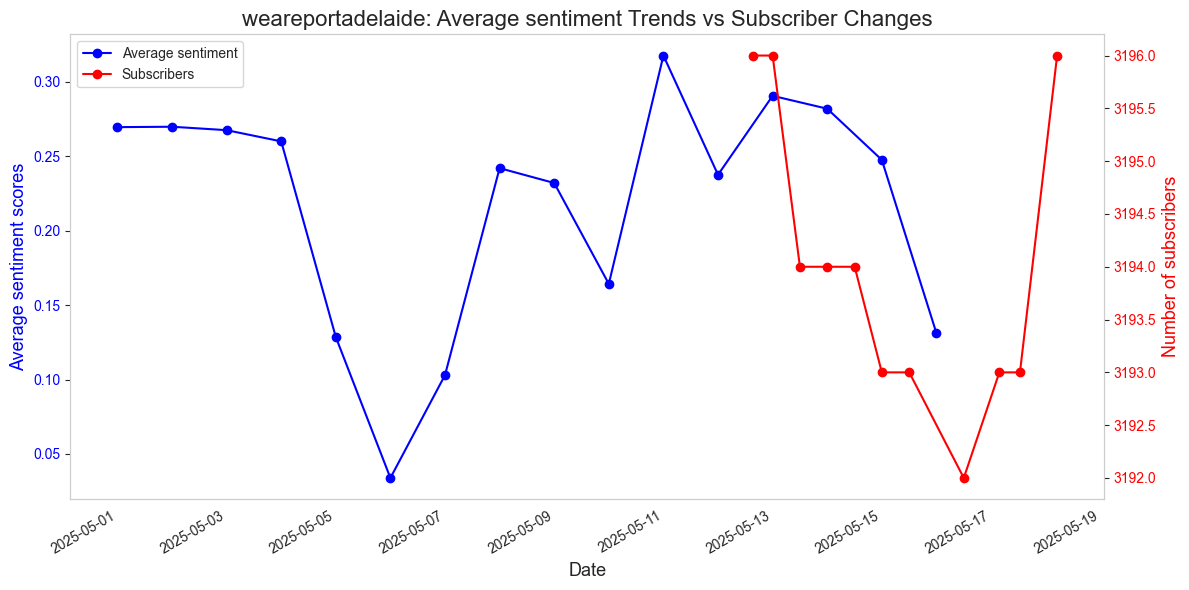

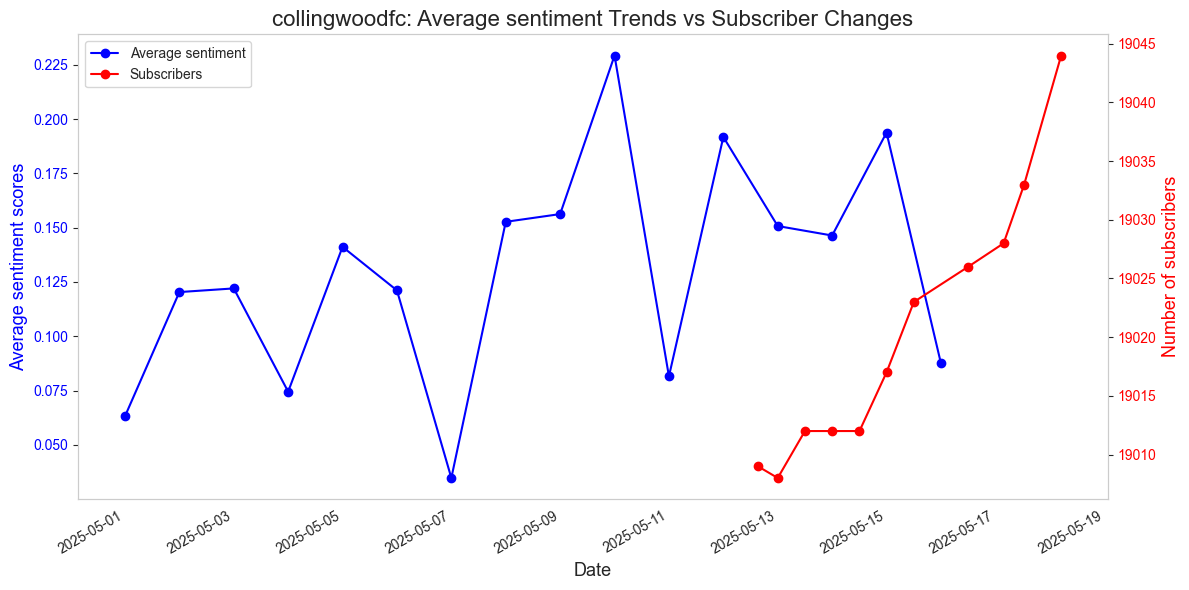

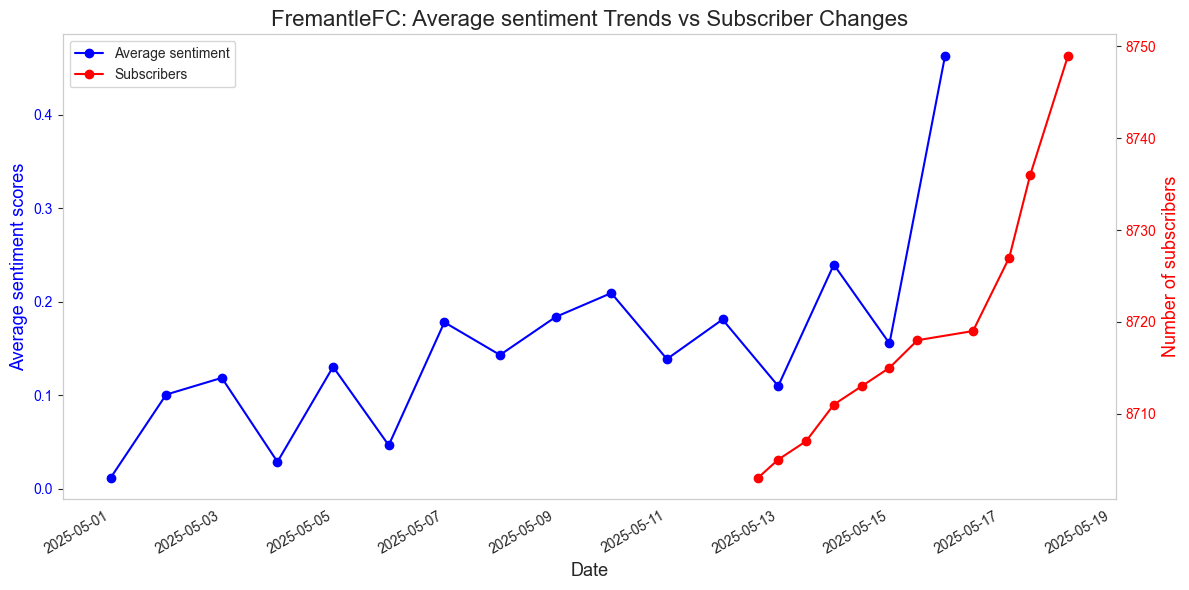

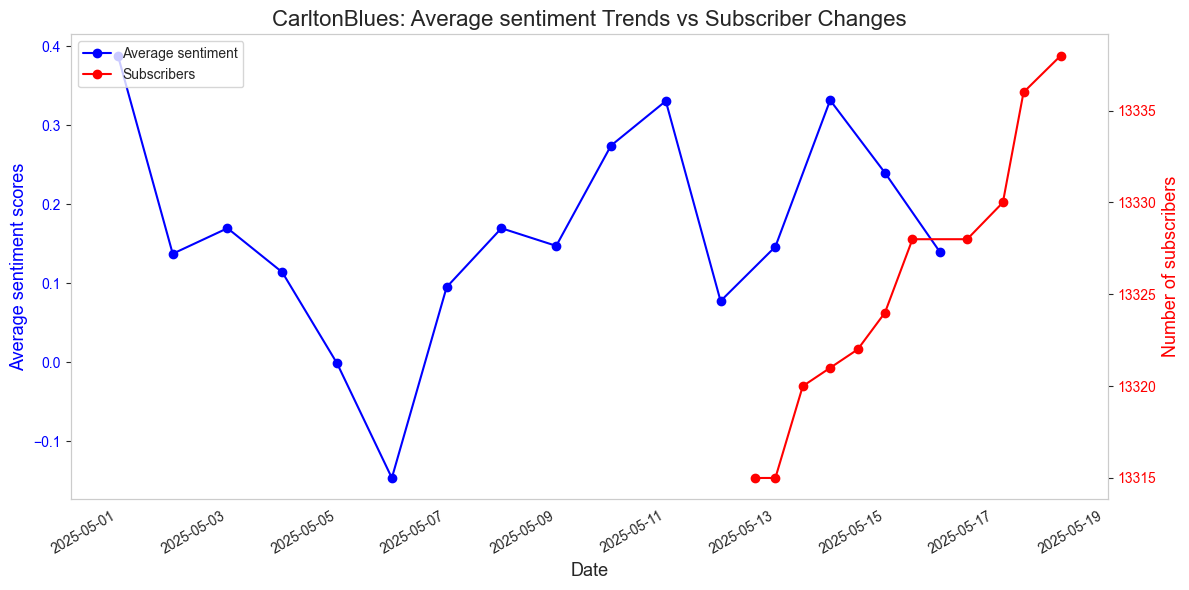

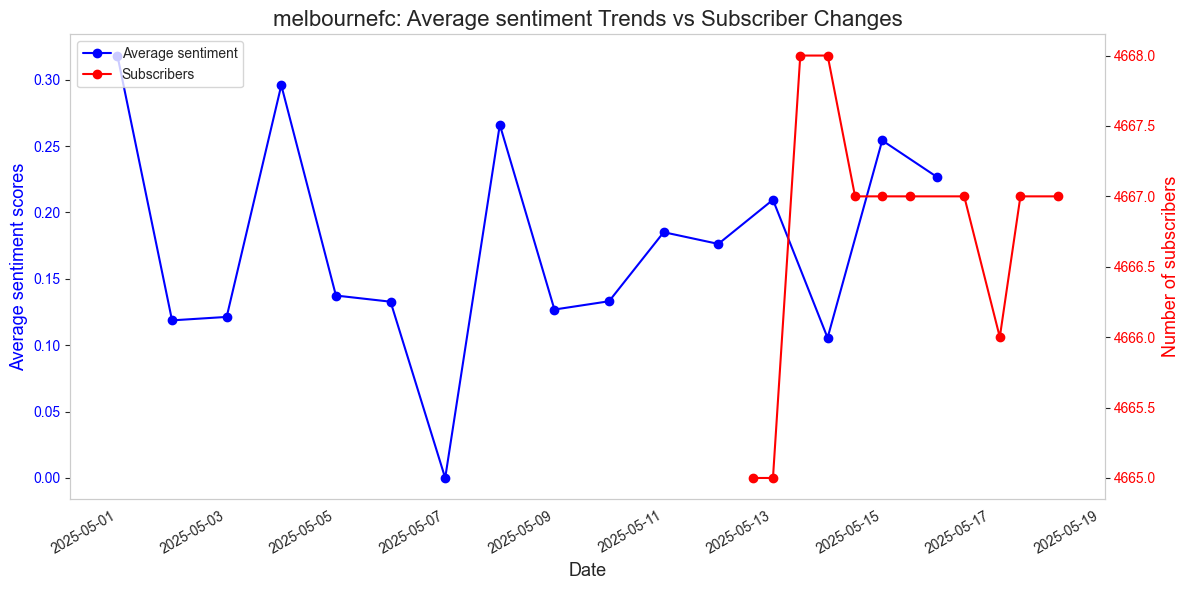

In [252]:
# Average sentiment Trends vs Subscriber Changes after 2025-05-01 (by day) for top 5 teams
response = requests.get('http://localhost:8080/afl/sentiment/subscribers/reddit')
data = response.json()

top_5 = data['sentiment_time_series']['top_5']
bottom_5 = data['sentiment_time_series']['bottom_5']
subs_data = data['subscribers_time_series']
team_mapping = data['team_mapping']

# Organise data into DataFrame
def extract_sentiment_df(team_list):
    records = []
    for team in team_list:
        for record in team['time_series']:
            records.append({
                'team': team['mapped_name'],
                'date': pd.to_datetime(record['date']),
                'avg_sentiment': record['avg_sentiment'],
                'total_sentiment': record['total_sentiment'],
                'doc_count': record['doc_count']
            })
    return pd.DataFrame(records)

def extract_subscriber_df(subs_dict):
    records = []
    for team, entries in subs_dict.items():
        for record in entries:
            try:
                # Standardised time format: Convert 2025-05-14T00-01-45.413232 to 2025-05-14T00:01:45.413232
                # Extract the date part (first 11 characters): "2025-05-14T"
                # Extract the time part (after the 11th character): "00-01-45.413232"
                # Replace the first two '-' with ':'
                fixed_date = record['date'][:11] + record['date'][11:].replace('-', ':', 2)
                date = pd.to_datetime(fixed_date)
                records.append({
                    'team': team,
                    'date': date,
                    'subscribers': record['subscribers']
                })
            except Exception:
                continue
    return pd.DataFrame(records)

# Convert to DataFrame
sentiment_df = extract_sentiment_df(top_5)
subs_df = extract_subscriber_df(subs_data)

# Visualisation
analysed_teams = sentiment_df['team'].unique()

for team in analysed_teams:
    team_sentiment = sentiment_df[sentiment_df['team'] == team]
    team_subs = subs_df[subs_df['team'] == team]

    # Draw graph
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Average sentiment scores - Left y axis
    line1, = ax1.plot(team_sentiment['date'], team_sentiment['avg_sentiment'],
                    color='blue', marker='o', label='Average sentiment')
    ax1.set_xlabel('Date', fontsize=13)
    ax1.set_ylabel('Average sentiment scores', fontsize=13, color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.grid(False)

    # Subscribers - Right y axis
    ax2 = ax1.twinx()
    line2, = ax2.plot(team_subs['date'], team_subs['subscribers'],
                    color='red', marker='o', label='Subscribers')
    ax2.set_ylabel('Number of subscribers', fontsize=13, color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    ax2.grid(False)

    # Merge Legend
    ax1.legend(handles=[line1, line2], loc='upper left')

    plt.title(f"{team}: Average sentiment Trends vs Subscriber Changes", fontsize=16)
    fig.autofmt_xdate()
    plt.tight_layout()
    plt.show()

- Average sentiment Trends vs Subscriber Changes after 2025-05-01 (by day) for bottom 5 teams

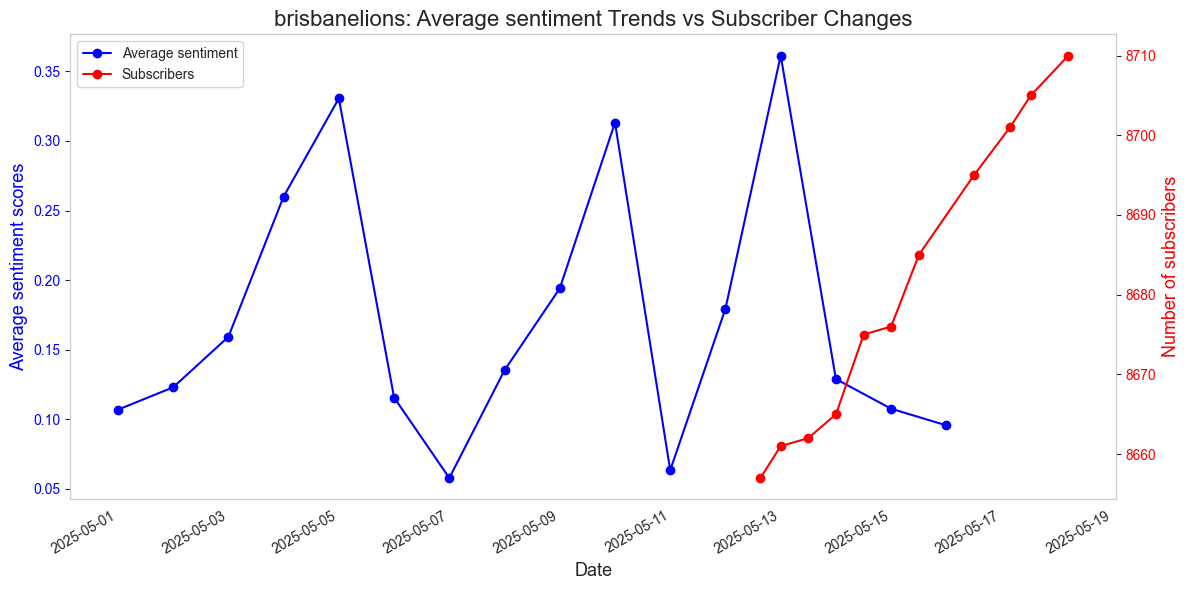

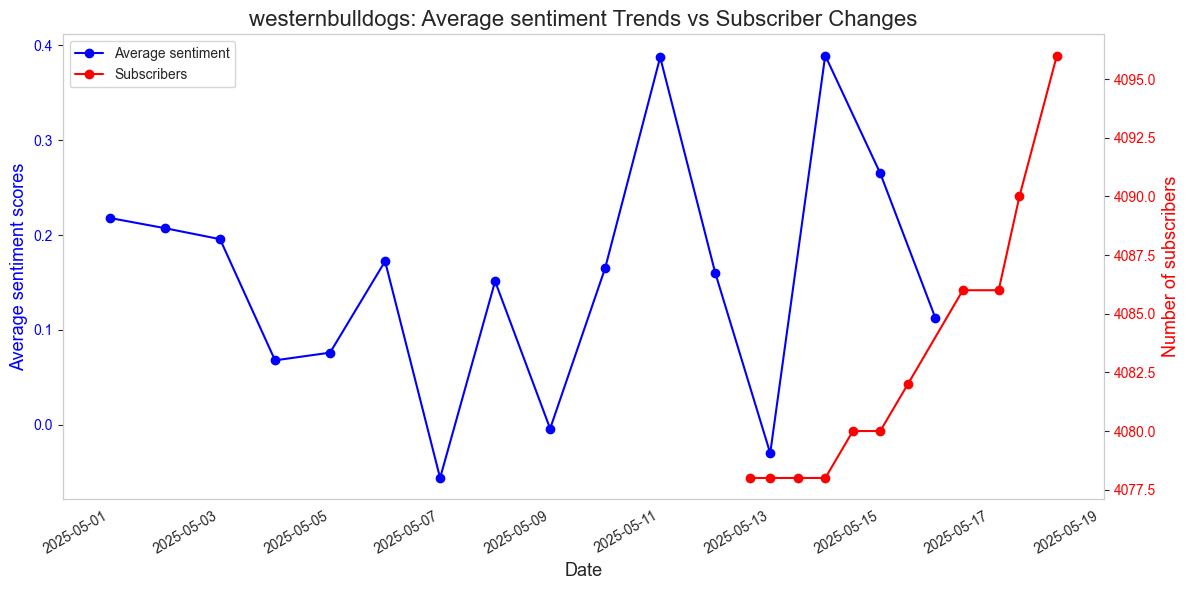

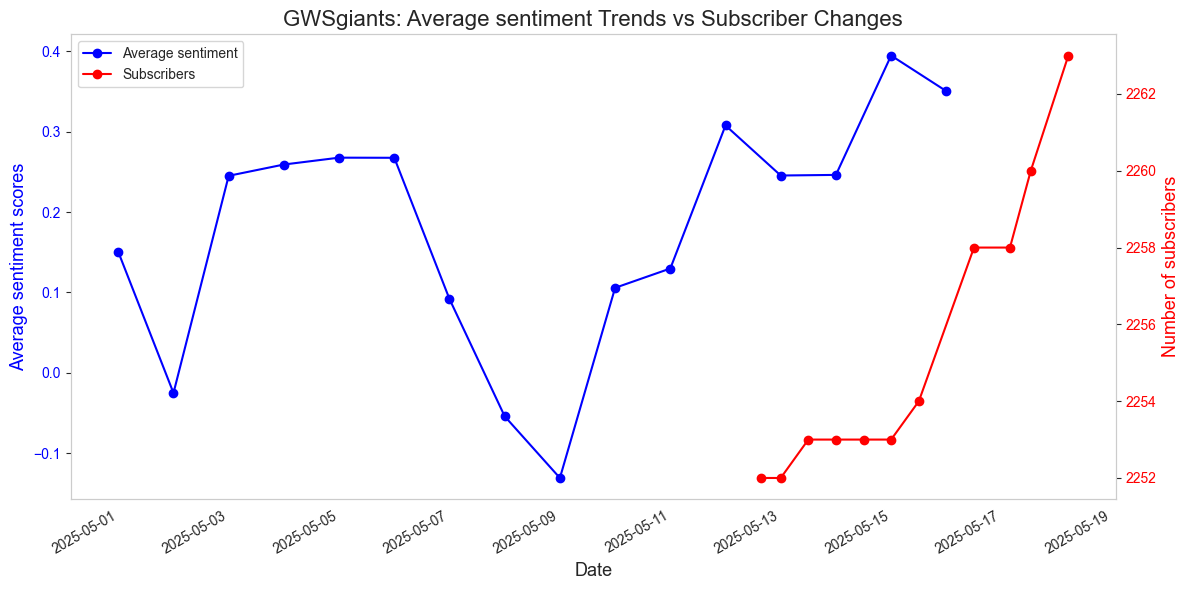

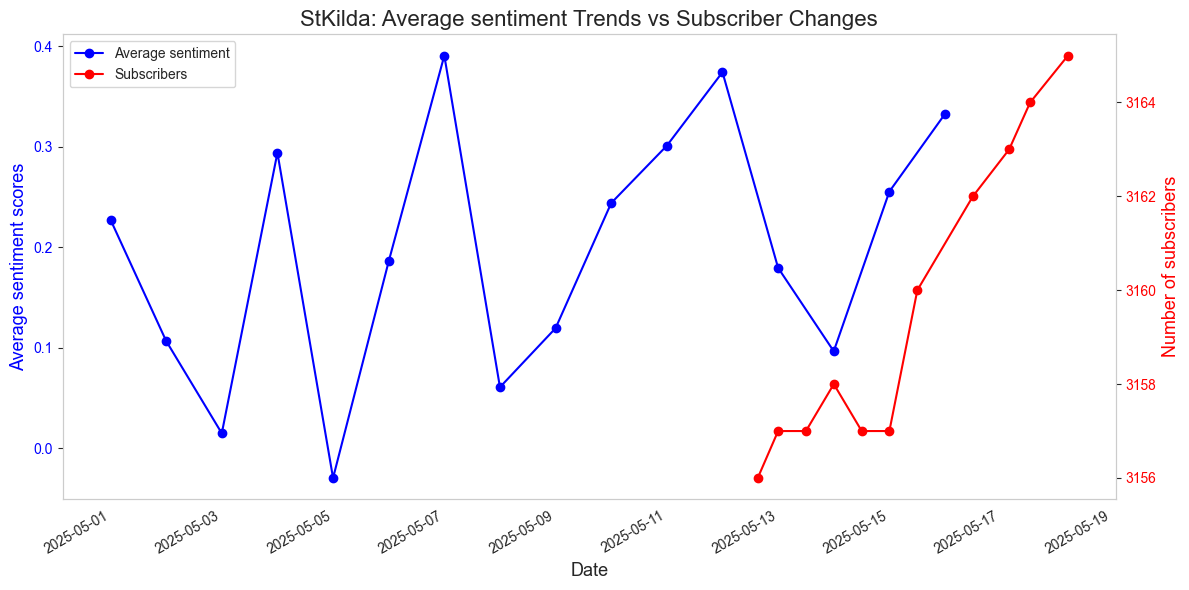

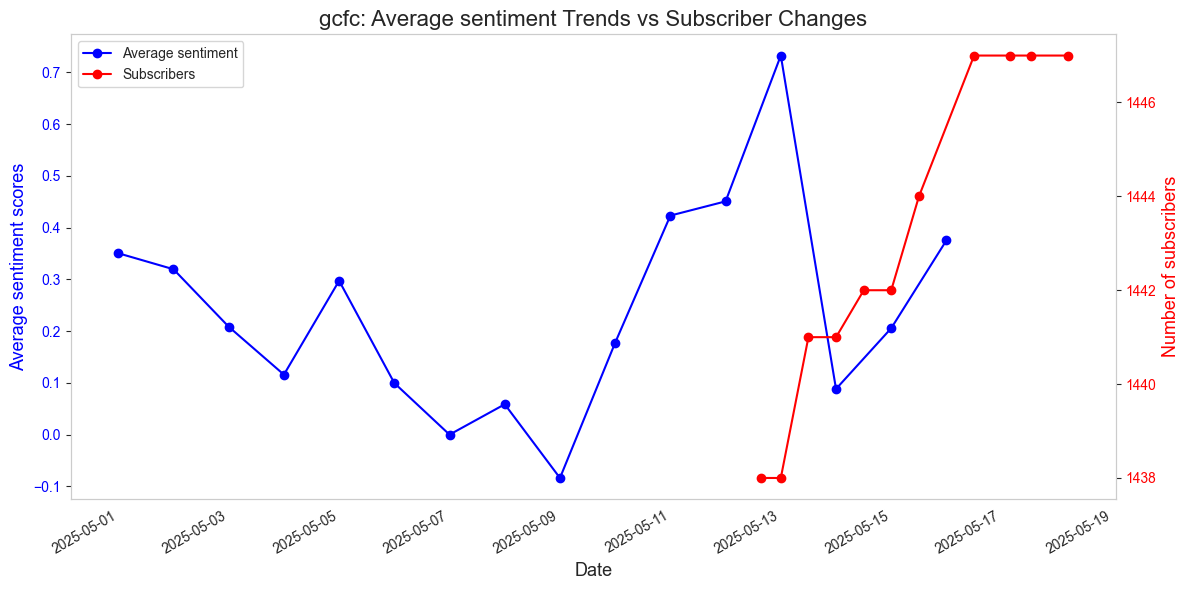

In [254]:
# Average sentiment Trends vs Subscriber Changes after 2025-05-01 (by day) for bottom 5 teams
response = requests.get('http://localhost:8080/afl/sentiment/subscribers/reddit')
data = response.json()

top_5 = data['sentiment_time_series']['top_5']
bottom_5 = data['sentiment_time_series']['bottom_5']
subs_data = data['subscribers_time_series']
team_mapping = data['team_mapping']

# Organise data into DataFrame
def extract_sentiment_df(team_list):
    records = []
    for team in team_list:
        for record in team['time_series']:
            records.append({
                'team': team['mapped_name'],
                'date': pd.to_datetime(record['date']),
                'avg_sentiment': record['avg_sentiment'],
                'total_sentiment': record['total_sentiment'],
                'doc_count': record['doc_count']
            })
    return pd.DataFrame(records)

def extract_subscriber_df(subs_dict):
    records = []
    for team, entries in subs_dict.items():
        for record in entries:
            try:
                # Standardised time format: Convert 2025-05-14T00-01-45.413232 to 2025-05-14T00:01:45.413232
                # Extract the date part (first 11 characters): "2025-05-14T"
                # Extract the time part (after the 11th character): "00-01-45.413232"
                # Replace the first two '-' with ':'
                fixed_date = record['date'][:11] + record['date'][11:].replace('-', ':', 2)
                date = pd.to_datetime(fixed_date)
                records.append({
                    'team': team,
                    'date': date,
                    'subscribers': record['subscribers']
                })
            except Exception:
                continue
    return pd.DataFrame(records)

# Convert to DataFrame
sentiment_df = extract_sentiment_df(bottom_5)
subs_df = extract_subscriber_df(subs_data)

# Visualisation
analysed_teams = sentiment_df['team'].unique()

for team in analysed_teams:
    team_sentiment = sentiment_df[sentiment_df['team'] == team]
    team_subs = subs_df[subs_df['team'] == team]

    # Draw graph
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Average sentiment scores - Left y axis
    line1, = ax1.plot(team_sentiment['date'], team_sentiment['avg_sentiment'],
                    color='blue', marker='o', label='Average sentiment')
    ax1.set_xlabel('Date', fontsize=13)
    ax1.set_ylabel('Average sentiment scores', fontsize=13, color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.grid(False)

    # Subscribers - Right y axis
    ax2 = ax1.twinx()
    line2, = ax2.plot(team_subs['date'], team_subs['subscribers'],
                    color='red', marker='o', label='Subscribers')
    ax2.set_ylabel('Number of subscribers', fontsize=13, color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    ax2.grid(False)

    # Merge Legend
    ax1.legend(handles=[line1, line2], loc='upper left')

    plt.title(f"{team}: Average sentiment Trends vs Subscriber Changes", fontsize=16)
    fig.autofmt_xdate()
    plt.tight_layout()
    plt.show()

- Total sentiment Trends vs Subscriber Changes after 2025-05-01 (by day) for top 5 teams

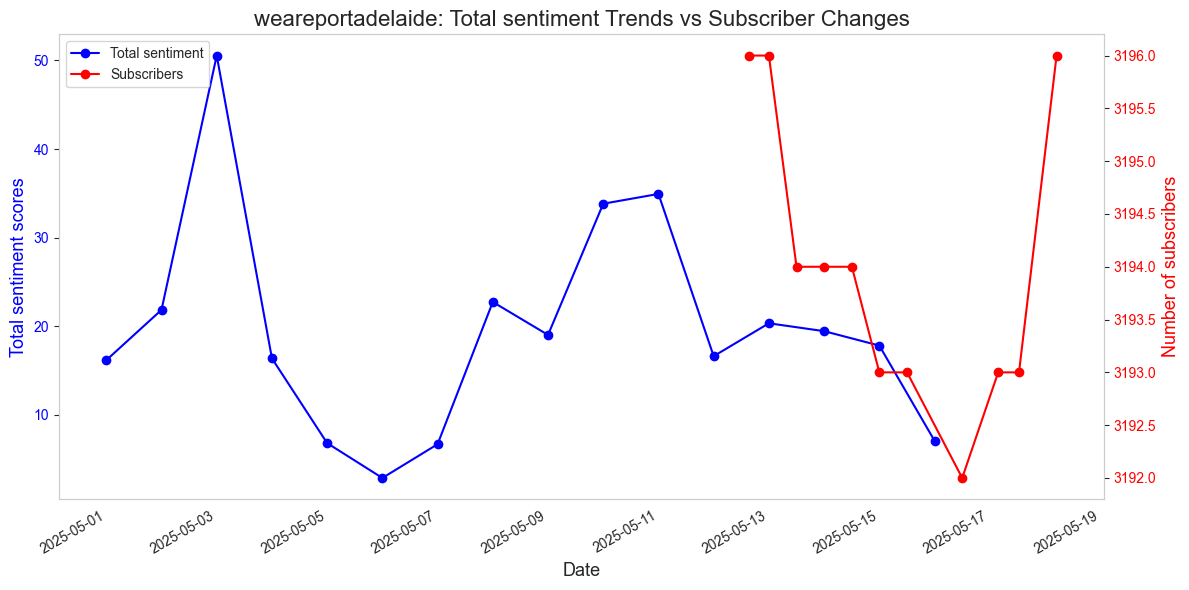

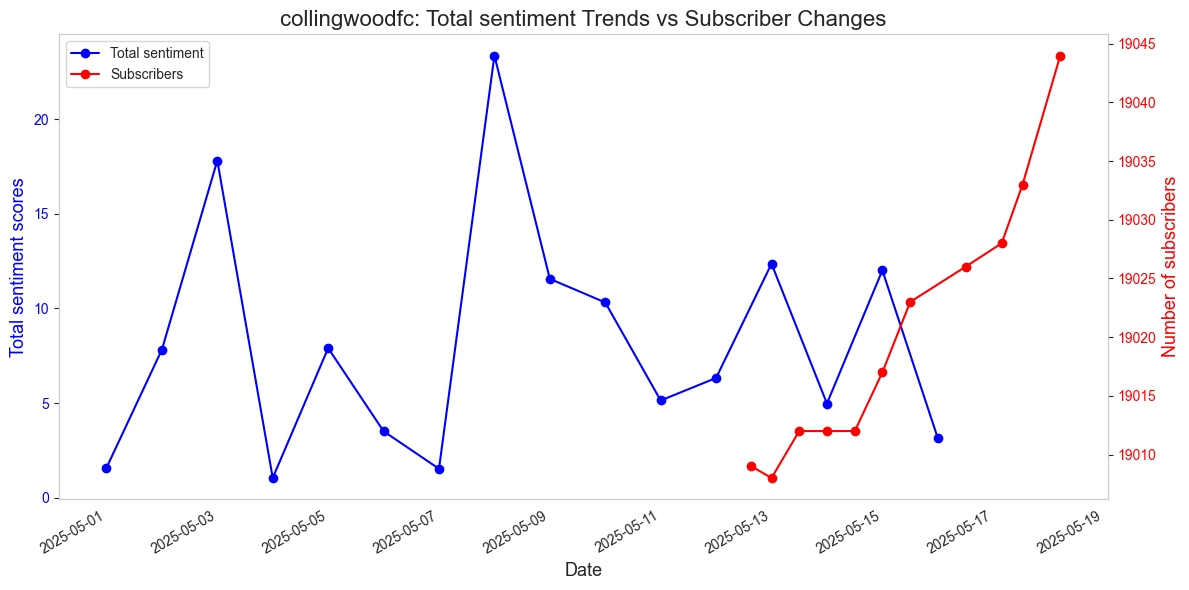

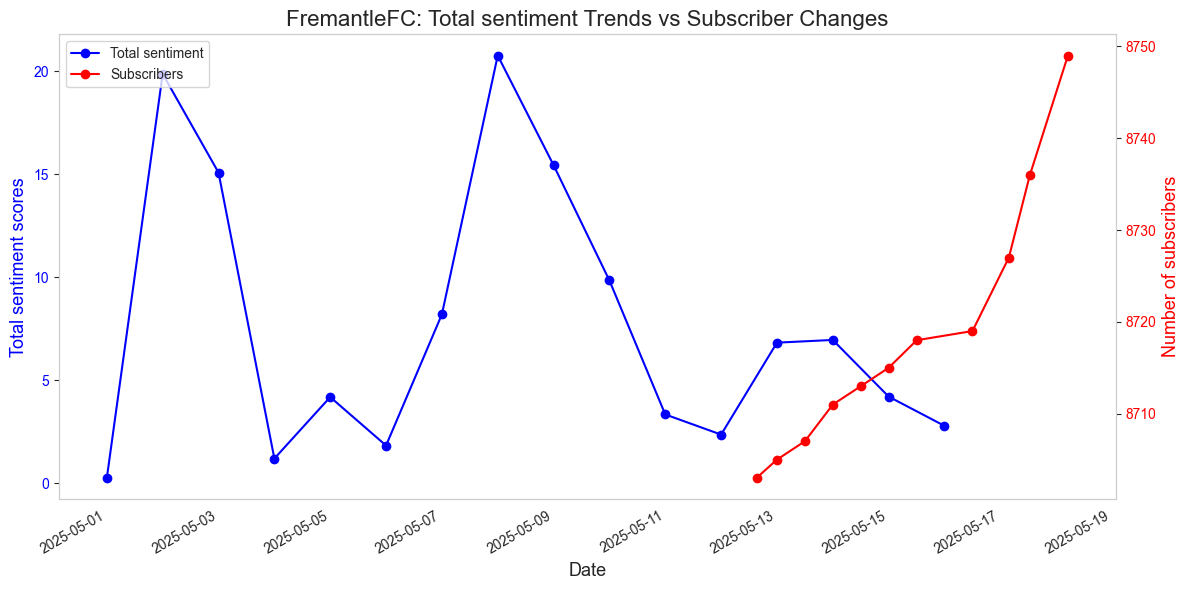

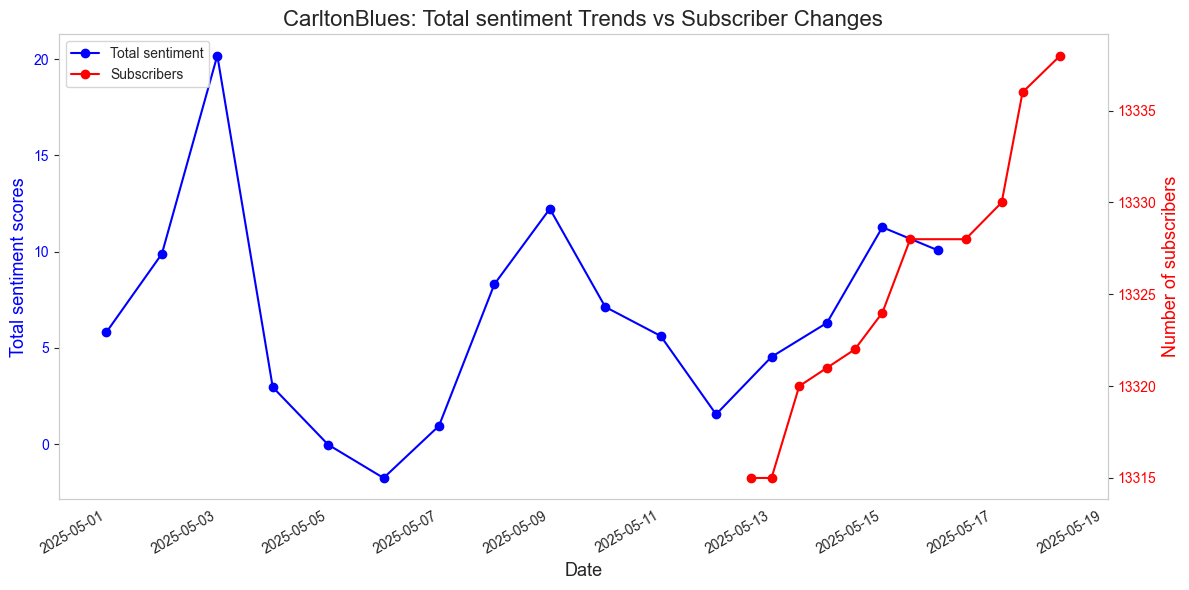

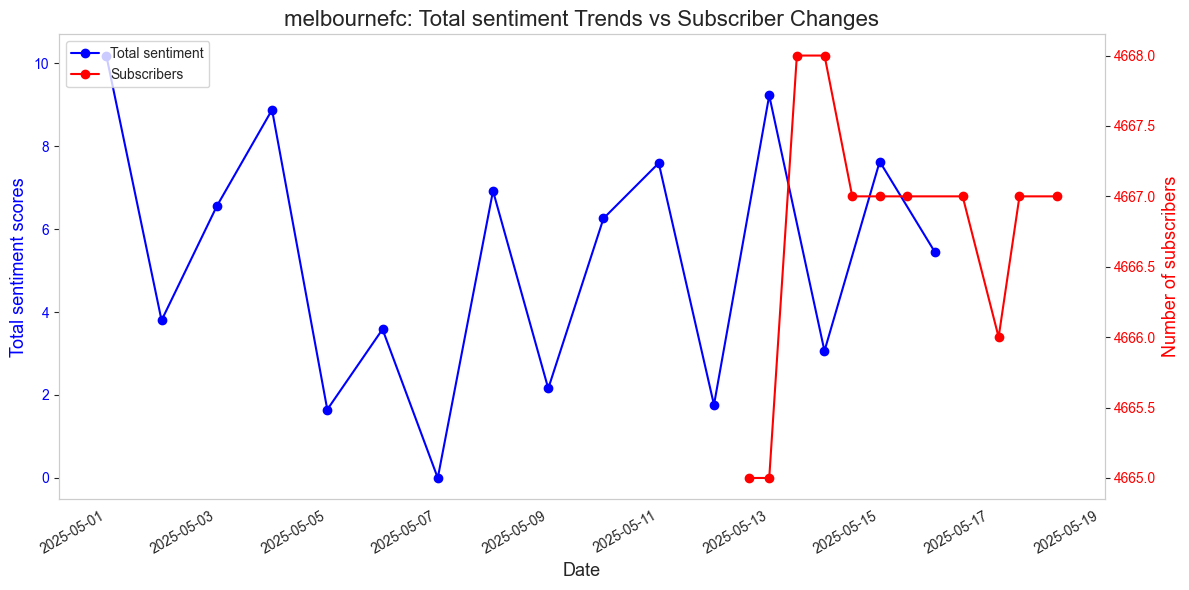

In [256]:
# Total sentiment Trends vs Subscriber Changes after 2025-05-01 (by day) for top 5 teams
response = requests.get('http://localhost:8080/afl/sentiment/subscribers/reddit')
data = response.json()

top_5 = data['sentiment_time_series']['top_5']
bottom_5 = data['sentiment_time_series']['bottom_5']
subs_data = data['subscribers_time_series']
team_mapping = data['team_mapping']

# Organise data into DataFrame
def extract_sentiment_df(team_list):
    records = []
    for team in team_list:
        for record in team['time_series']:
            records.append({
                'team': team['mapped_name'],
                'date': pd.to_datetime(record['date']),
                'avg_sentiment': record['avg_sentiment'],
                'total_sentiment': record['total_sentiment'],
                'doc_count': record['doc_count']
            })
    return pd.DataFrame(records)

def extract_subscriber_df(subs_dict):
    records = []
    for team, entries in subs_dict.items():
        for record in entries:
            try:
                # Standardised time format: Convert 2025-05-14T00-01-45.413232 to 2025-05-14T00:01:45.413232
                # Extract the date part (first 11 characters): "2025-05-14T"
                # Extract the time part (after the 11th character): "00-01-45.413232"
                # Replace the first two '-' with ':'
                fixed_date = record['date'][:11] + record['date'][11:].replace('-', ':', 2)
                date = pd.to_datetime(fixed_date)
                records.append({
                    'team': team,
                    'date': date,
                    'subscribers': record['subscribers']
                })
            except Exception:
                continue
    return pd.DataFrame(records)

# Convert to DataFrame
sentiment_df = extract_sentiment_df(top_5)
subs_df = extract_subscriber_df(subs_data)

# Visualisation
analysed_teams = sentiment_df['team'].unique()

for team in analysed_teams:
    team_sentiment = sentiment_df[sentiment_df['team'] == team]
    team_subs = subs_df[subs_df['team'] == team]

    # Draw graph
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Average sentiment scores - Left y axis
    line1, = ax1.plot(team_sentiment['date'], team_sentiment['total_sentiment'],
                    color='blue', marker='o', label='Total sentiment')
    ax1.set_xlabel('Date', fontsize=13)
    ax1.set_ylabel('Total sentiment scores', fontsize=13, color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.grid(False)

    # Subscribers - Right y axis
    ax2 = ax1.twinx()
    line2, = ax2.plot(team_subs['date'], team_subs['subscribers'],
                    color='red', marker='o', label='Subscribers')
    ax2.set_ylabel('Number of subscribers', fontsize=13, color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    ax2.grid(False)

    # Merge Legend
    ax1.legend(handles=[line1, line2], loc='upper left')

    plt.title(f"{team}: Total sentiment Trends vs Subscriber Changes", fontsize=16)
    fig.autofmt_xdate()
    plt.tight_layout()
    plt.show()

- Total sentiment Trends vs Subscriber Changes after 2025-05-01 (by day) for bottom 5 teams

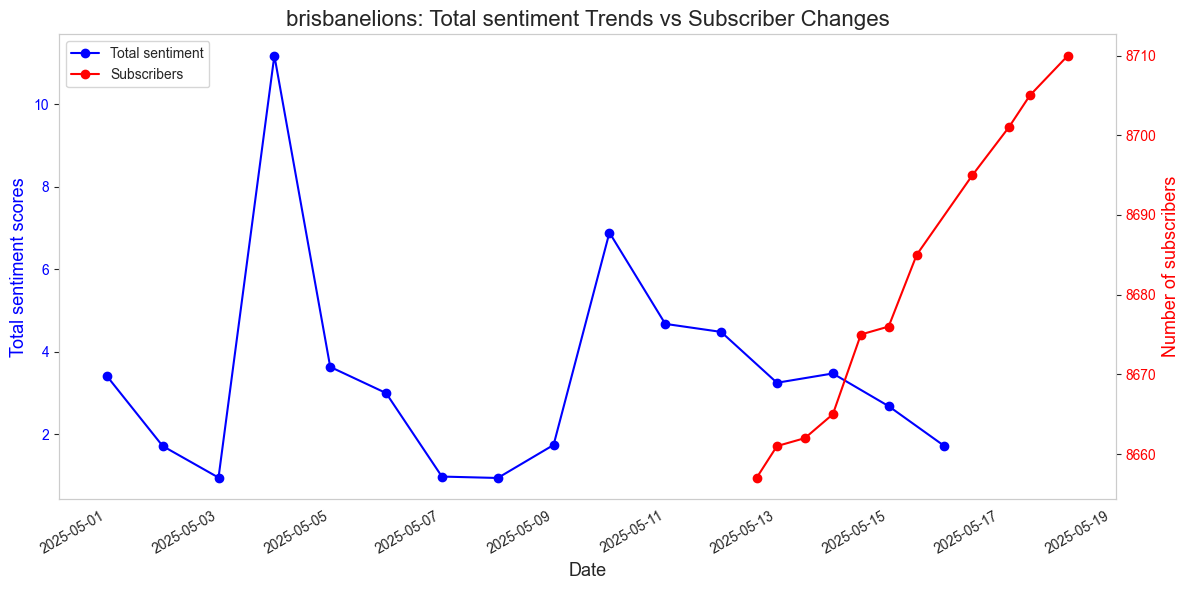

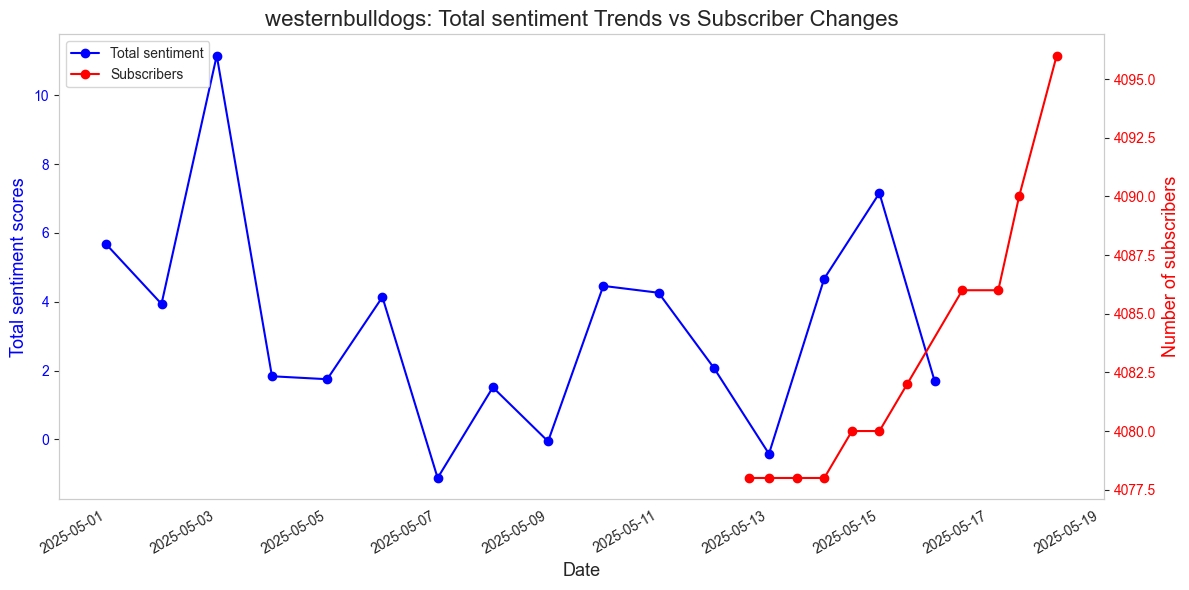

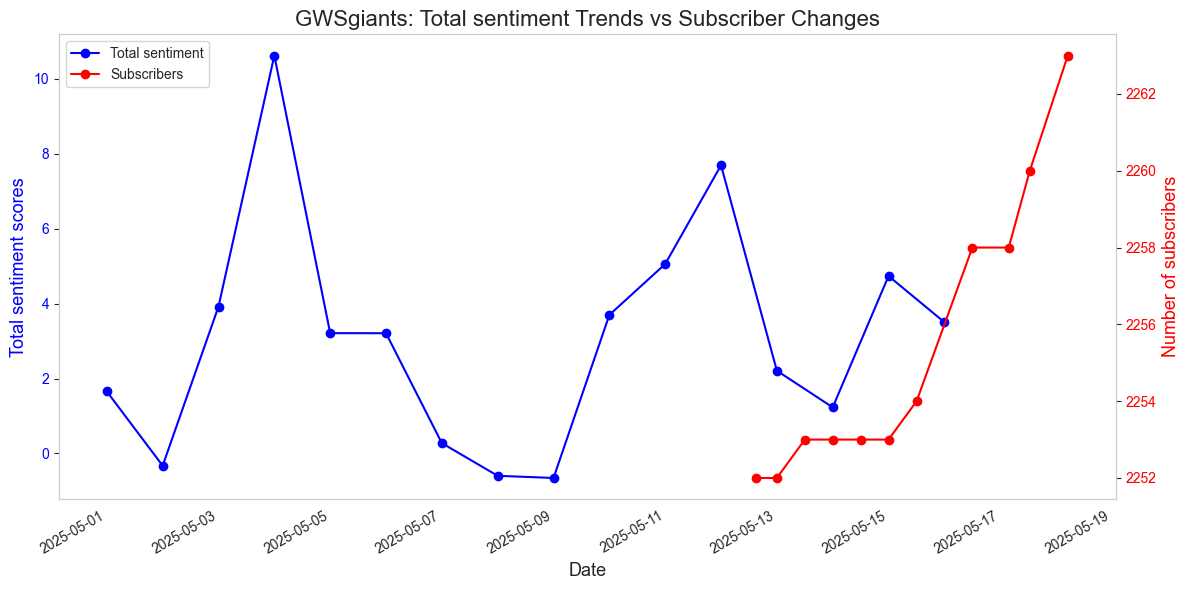

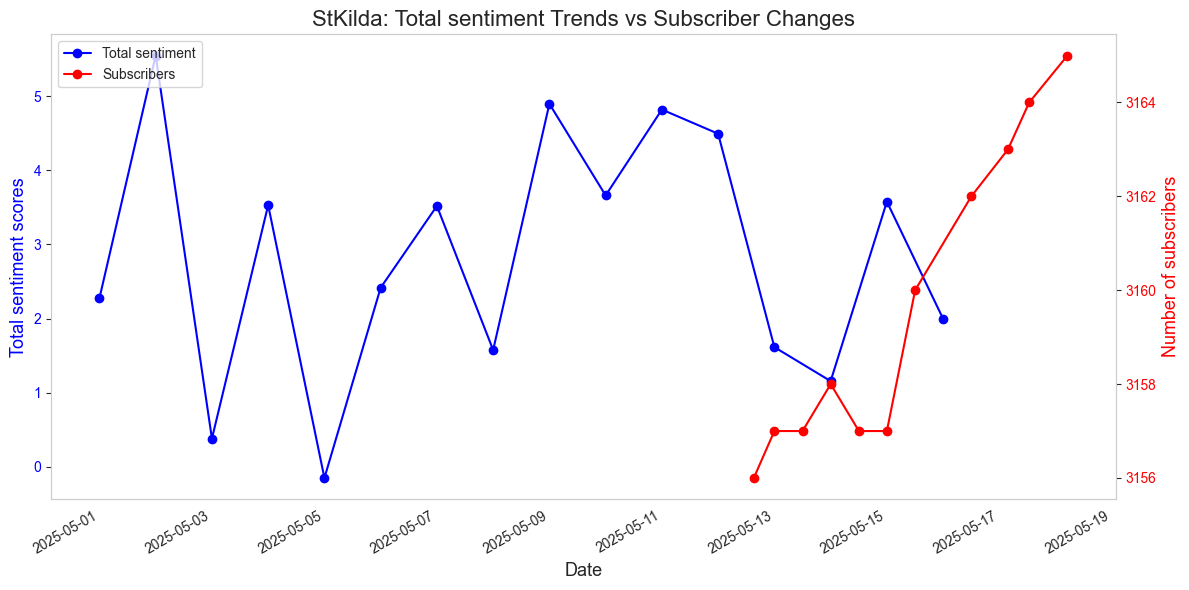

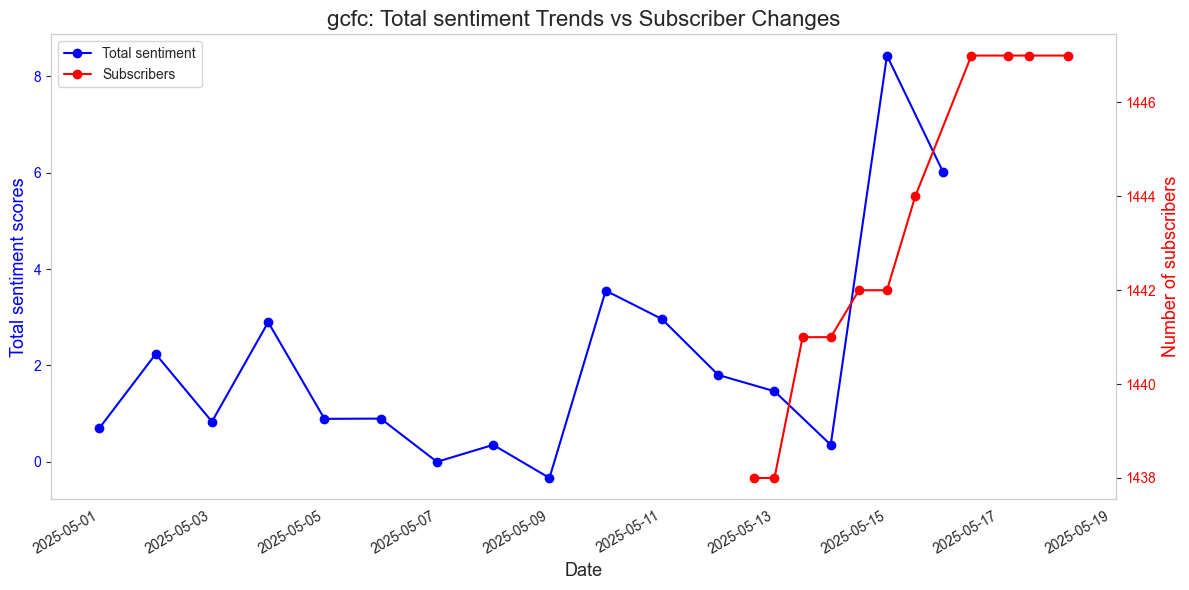

In [258]:
# Total sentiment Trends vs Subscriber Changes after 2025-05-01 (by day) for bottom 5 teams
response = requests.get('http://localhost:8080/afl/sentiment/subscribers/reddit')
data = response.json()

top_5 = data['sentiment_time_series']['top_5']
bottom_5 = data['sentiment_time_series']['bottom_5']
subs_data = data['subscribers_time_series']
team_mapping = data['team_mapping']

# Organise data into DataFrame
def extract_sentiment_df(team_list):
    records = []
    for team in team_list:
        for record in team['time_series']:
            records.append({
                'team': team['mapped_name'],
                'date': pd.to_datetime(record['date']),
                'avg_sentiment': record['avg_sentiment'],
                'total_sentiment': record['total_sentiment'],
                'doc_count': record['doc_count']
            })
    return pd.DataFrame(records)

def extract_subscriber_df(subs_dict):
    records = []
    for team, entries in subs_dict.items():
        for record in entries:
            try:
                # Standardised time format: Convert 2025-05-14T00-01-45.413232 to 2025-05-14T00:01:45.413232
                # Extract the date part (first 11 characters): "2025-05-14T"
                # Extract the time part (after the 11th character): "00-01-45.413232"
                # Replace the first two '-' with ':'
                fixed_date = record['date'][:11] + record['date'][11:].replace('-', ':', 2)
                date = pd.to_datetime(fixed_date)
                records.append({
                    'team': team,
                    'date': date,
                    'subscribers': record['subscribers']
                })
            except Exception:
                continue
    return pd.DataFrame(records)

# Convert to DataFrame
sentiment_df = extract_sentiment_df(bottom_5)
subs_df = extract_subscriber_df(subs_data)

# Visualisation
analysed_teams = sentiment_df['team'].unique()

for team in analysed_teams:
    team_sentiment = sentiment_df[sentiment_df['team'] == team]
    team_subs = subs_df[subs_df['team'] == team]

    # Draw graph
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Average sentiment scores - Left y axis
    line1, = ax1.plot(team_sentiment['date'], team_sentiment['total_sentiment'],
                    color='blue', marker='o', label='Total sentiment')
    ax1.set_xlabel('Date', fontsize=13)
    ax1.set_ylabel('Total sentiment scores', fontsize=13, color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.grid(False)

    # Subscribers - Right y axis
    ax2 = ax1.twinx()
    line2, = ax2.plot(team_subs['date'], team_subs['subscribers'],
                    color='red', marker='o', label='Subscribers')
    ax2.set_ylabel('Number of subscribers', fontsize=13, color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    ax2.grid(False)

    # Merge Legend
    ax1.legend(handles=[line1, line2], loc='upper left')

    plt.title(f"{team}: Total sentiment Trends vs Subscriber Changes", fontsize=16)
    fig.autofmt_xdate()
    plt.tight_layout()
    plt.show()

## Scenario 2: Public Transport Analysis in Major Australian Cities
#### Data: Mastodon and Reddit
#### Analytics：
- Overall Comparative Analytics of Posts from Mastodon and Reddit
- Cross-Platform Sentiment Comparison: Top/Bottom City by Sentiment Score
### 1. Overall Comparative Analytics of Posts from Mastodon and Reddit
#### 1.1 Comparison of Post Volumes

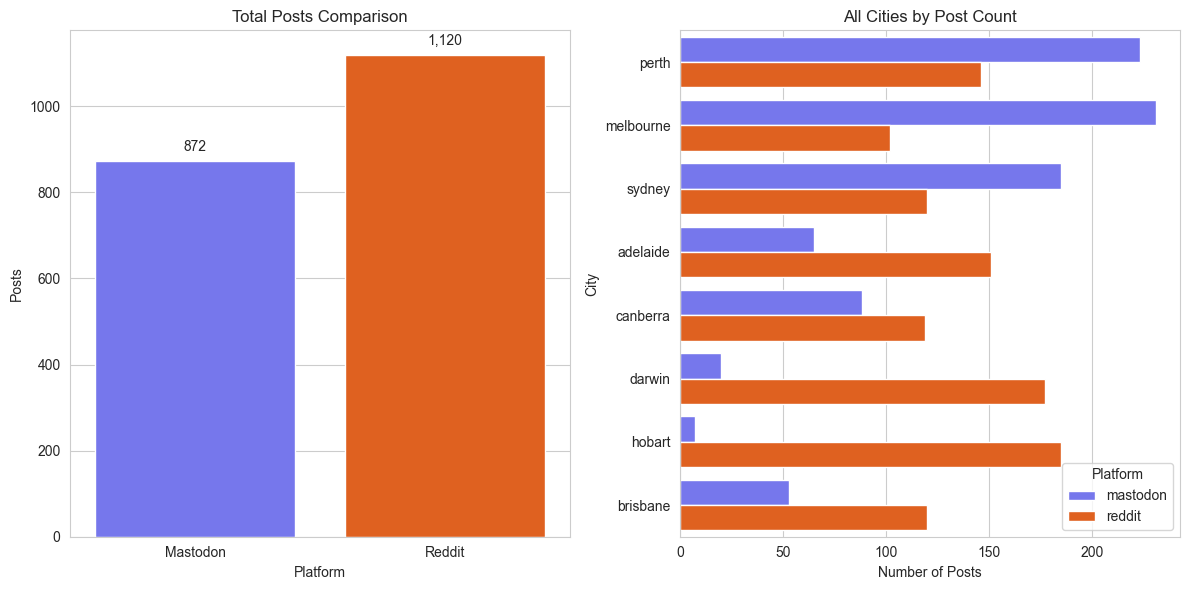

In [260]:
response = requests.get('http://localhost:8080/transportation/post/comparison')
data = response.json()

# Prepare data
total_posts = pd.DataFrame({
    'Platform': ['Mastodon', 'Reddit'],
    'Posts': [data['total_posts']['mastodon'], data['total_posts']['reddit']]
})

city_comparison = pd.DataFrame(data['city_comparison'])
all_cities = city_comparison['name'].tolist()


# Comparison of total number of posts comparison
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
ax1 = sns.barplot(x='Platform', y='Posts', data=total_posts, palette=['#6364FF', '#FF5700'])
plt.title('Total Posts Comparison')
for p in ax1.patches:
    ax1.annotate(f"{p.get_height():,.0f}", 
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Comparison of the number of posts in each city
plt.subplot(1, 2, 2)
comparison_melted = city_comparison[city_comparison['name'].isin(all_cities)].melt(
    id_vars='name', 
    value_vars=['mastodon_posts', 'reddit_posts'],
    var_name='Platform', 
    value_name='Posts'
)
comparison_melted['Platform'] = comparison_melted['Platform'].str.replace('_posts', '')

ax2 = sns.barplot(x='Posts', y='name', hue='Platform', data=comparison_melted,
                 palette={'mastodon': '#6364FF', 'reddit': '#ff5700'})
plt.title('All Cities by Post Count')
plt.ylabel('City')
plt.xlabel('Number of Posts')
plt.legend(title='Platform')

plt.tight_layout()
plt.show()

#### 1.2 Comparison of Sentiment Scores

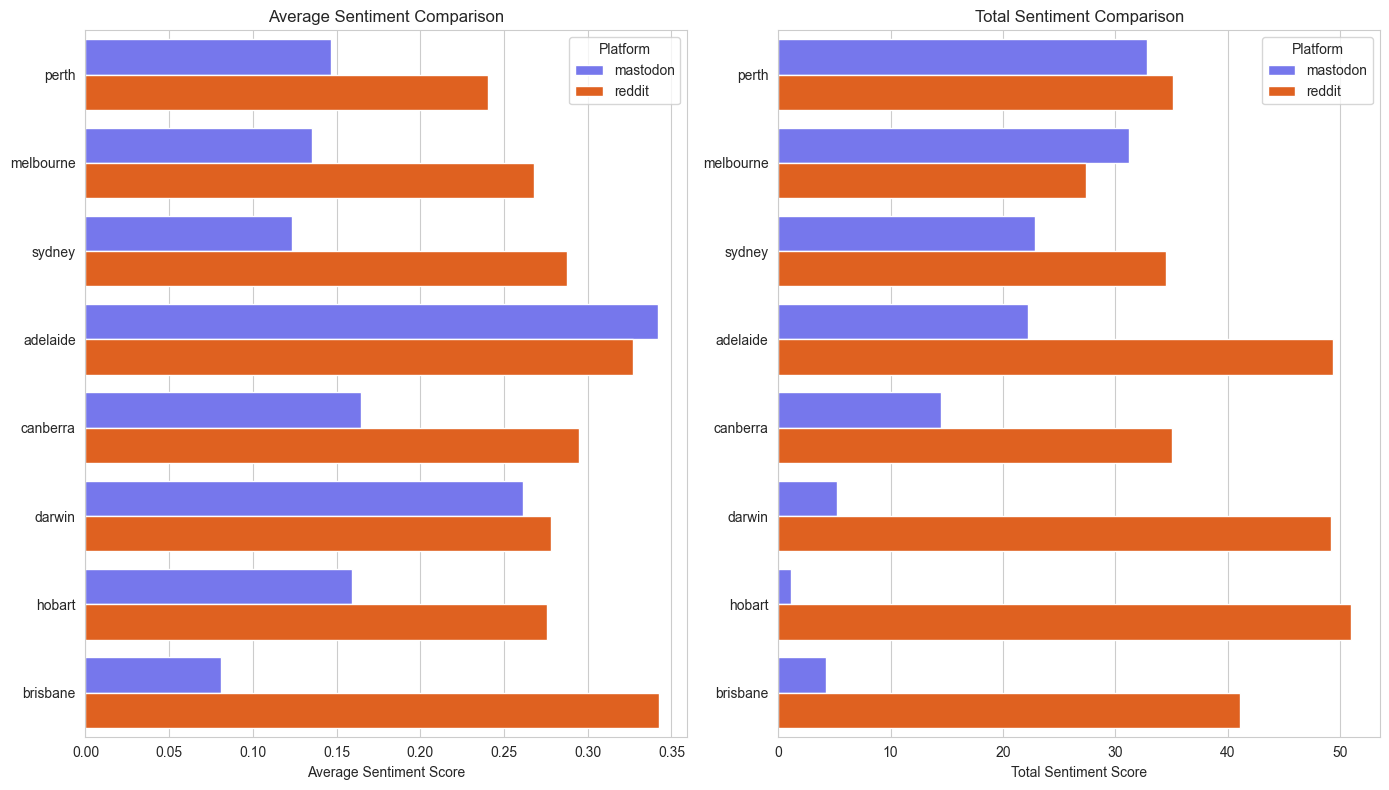

In [262]:
# Sentiment comparison
plt.figure(figsize=(14, 8))

# Average
plt.subplot(1, 2, 1)
avg_sentiment = city_comparison[city_comparison['name'].isin(all_cities)].melt(
    id_vars='name',
    value_vars=['mastodon_avg_sentiment', 'reddit_avg_sentiment'],
    var_name='Platform',
    value_name='Avg_Sentiment'
)
avg_sentiment['Platform'] = avg_sentiment['Platform'].str.replace('_avg_sentiment', '')

sns.barplot(x='Avg_Sentiment', y='name', hue='Platform', data=avg_sentiment,
           palette={'mastodon': '#6364FF', 'reddit': '#ff5700'})
plt.title('Average Sentiment Comparison')
plt.ylabel('')
plt.xlabel('Average Sentiment Score')
plt.legend(title='Platform')

# Total
plt.subplot(1, 2, 2)
total_sentiment = city_comparison[city_comparison['name'].isin(all_cities)].melt(
    id_vars='name',
    value_vars=['mastodon_total_sentiment', 'reddit_total_sentiment'],
    var_name='Platform',
    value_name='Total_Sentiment'
)
total_sentiment['Platform'] = total_sentiment['Platform'].str.replace('_total_sentiment', '')

sns.barplot(x='Total_Sentiment', y='name', hue='Platform', data=total_sentiment,
           palette={'mastodon': '#6364FF', 'reddit': '#ff5700'})
plt.title('Total Sentiment Comparison')
plt.ylabel('')
plt.xlabel('Total Sentiment Score')
plt.legend(title='Platform')

plt.tight_layout()
plt.show()

### 2. Cross-Platform Sentiment Comparison: Top/Bottom City by Sentiment Score
#### Mastodon
- Average sentiment score

Number of cities: 8

The city which has the highest average sentiment score:


avg_sentiment_mastodon  doc_count_mastodon      name  \
0                0.341811                  65  adelaide   

   total_sentiment_mastodon  
0                   22.2177


The city which has the lowest average sentiment score:


avg_sentiment_mastodon  doc_count_mastodon      name  \
0                0.080908                  53  brisbane   

   total_sentiment_mastodon  
0                    4.2881

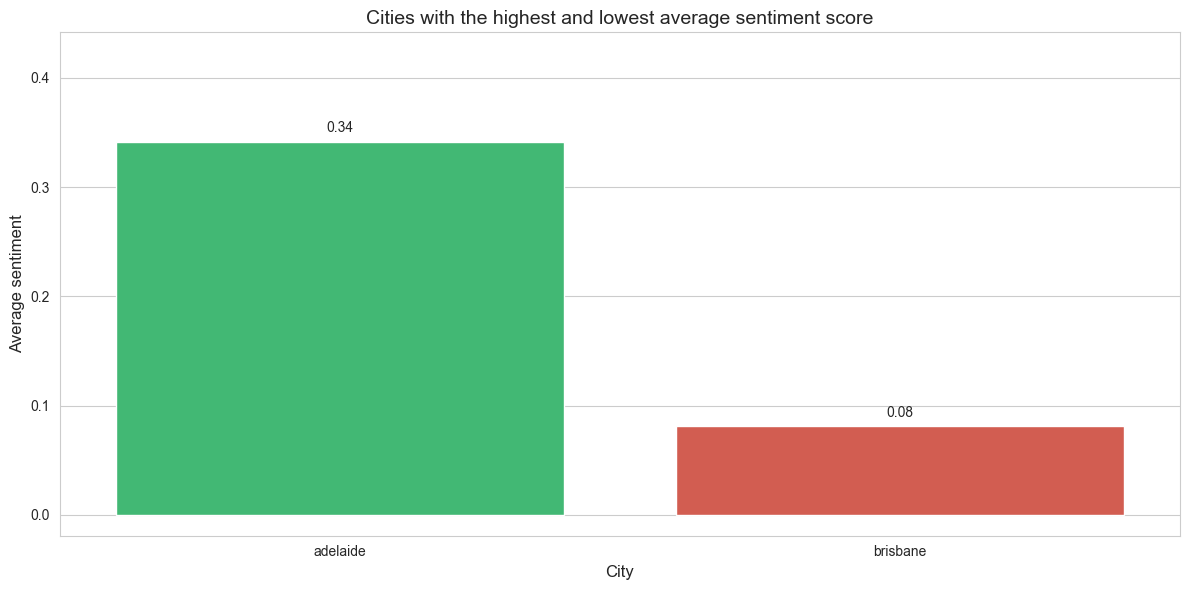

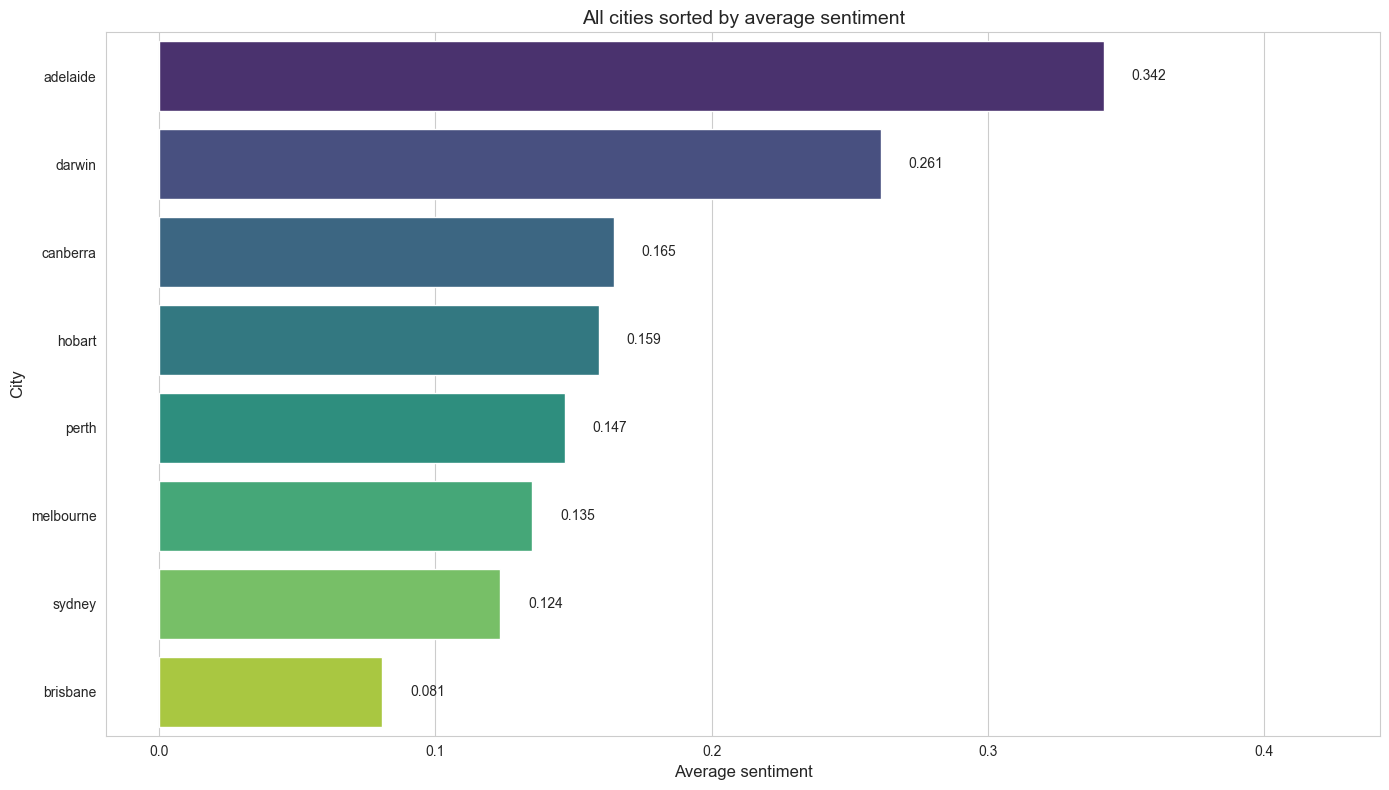

In [264]:
response = requests.get('http://localhost:8080/transportation/sentiment/mastodon')
data = response.json()

# Create DataFrame
df = pd.DataFrame(data['all_cities_avg_mastodon'])


print(f"Number of cities: {data['cities_count_mastodon']}")
print("\nThe city which has the highest average sentiment score:")
display(pd.DataFrame([data['highest_city_avg_mastodon']]))  
print("\nThe city which has the lowest average sentiment score:")
display(pd.DataFrame([data['lowest_city_avg_mastodon']]))

# Highest and lowest
plt.figure(figsize=(12, 6))

top_bottom_avg = pd.concat([
    pd.DataFrame([data['highest_city_avg_mastodon']]), 
    pd.DataFrame([data['lowest_city_avg_mastodon']])
])

barplot = sns.barplot(
    x='name', 
    y='avg_sentiment_mastodon', 
    data=top_bottom_avg,
    palette=['#2ecc71', '#e74c3c']  
)

plt.title('Cities with the highest and lowest average sentiment score', fontsize=14)
plt.xlabel('City', fontsize=12)
plt.ylabel('Average sentiment', fontsize=12)
plt.ylim(min(df['avg_sentiment_mastodon']) - 0.1, max(df['avg_sentiment_mastodon']) + 0.1)

for p in barplot.patches:
    barplot.annotate(
        format(p.get_height(), '.2f'),  
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center',  
        va='center', 
        xytext=(0, 10), 
        textcoords='offset points'
    )
plt.tight_layout()
plt.show()

# All cities
plt.figure(figsize=(14, 8))
all_cities = sns.barplot(
    x='avg_sentiment_mastodon', 
    y='name', 
    data=df.sort_values('avg_sentiment_mastodon', ascending=False), # Descending order
    palette='viridis'  
)

plt.title('All cities sorted by average sentiment', fontsize=14)
plt.xlabel('Average sentiment', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.xlim(min(df['avg_sentiment_mastodon']) - 0.1, max(df['avg_sentiment_mastodon']) + 0.1)   

for p in all_cities.patches:
    width = p.get_width() 
    plt.text(
        width + 0.01,  
        p.get_y() + p.get_height() / 2,  
        f'{width:.3f}',  
        va='center'  
    )

plt.tight_layout()  
plt.show()

- Total sentiment score

Numbers of city: 8

The city which has the highest total sentiment score:


avg_sentiment_mastodon  doc_count_mastodon   name  total_sentiment_mastodon
0                0.146939                 223  perth                   32.7675


The city which has the lowest total sentiment score:


avg_sentiment_mastodon  doc_count_mastodon    name  \
0                0.159214                   7  hobart   

   total_sentiment_mastodon  
0                    1.1145

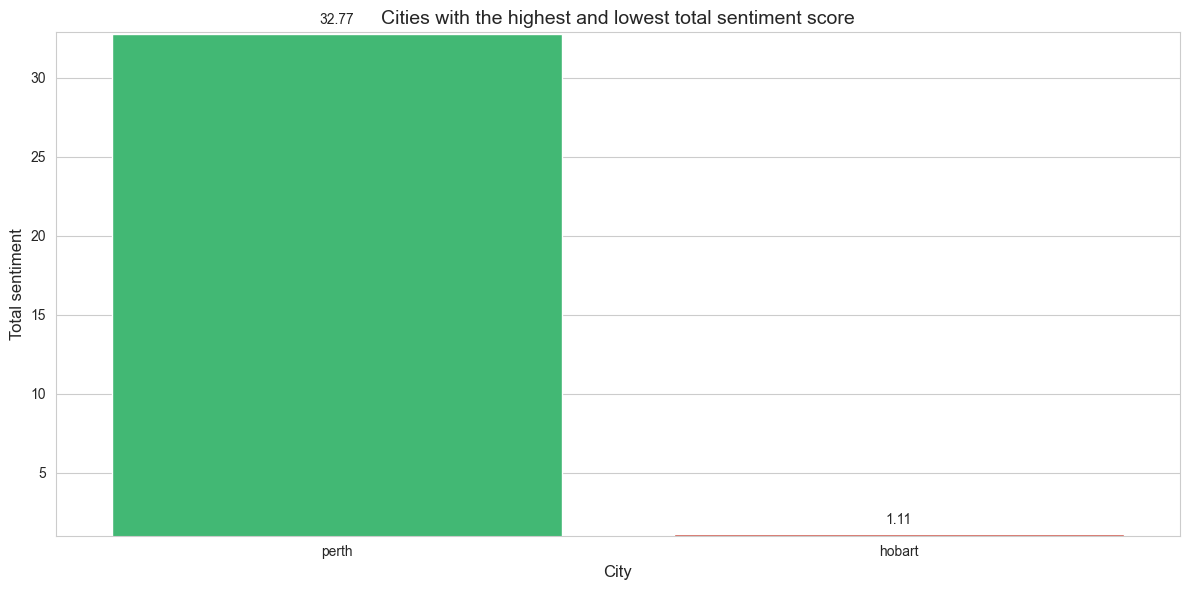

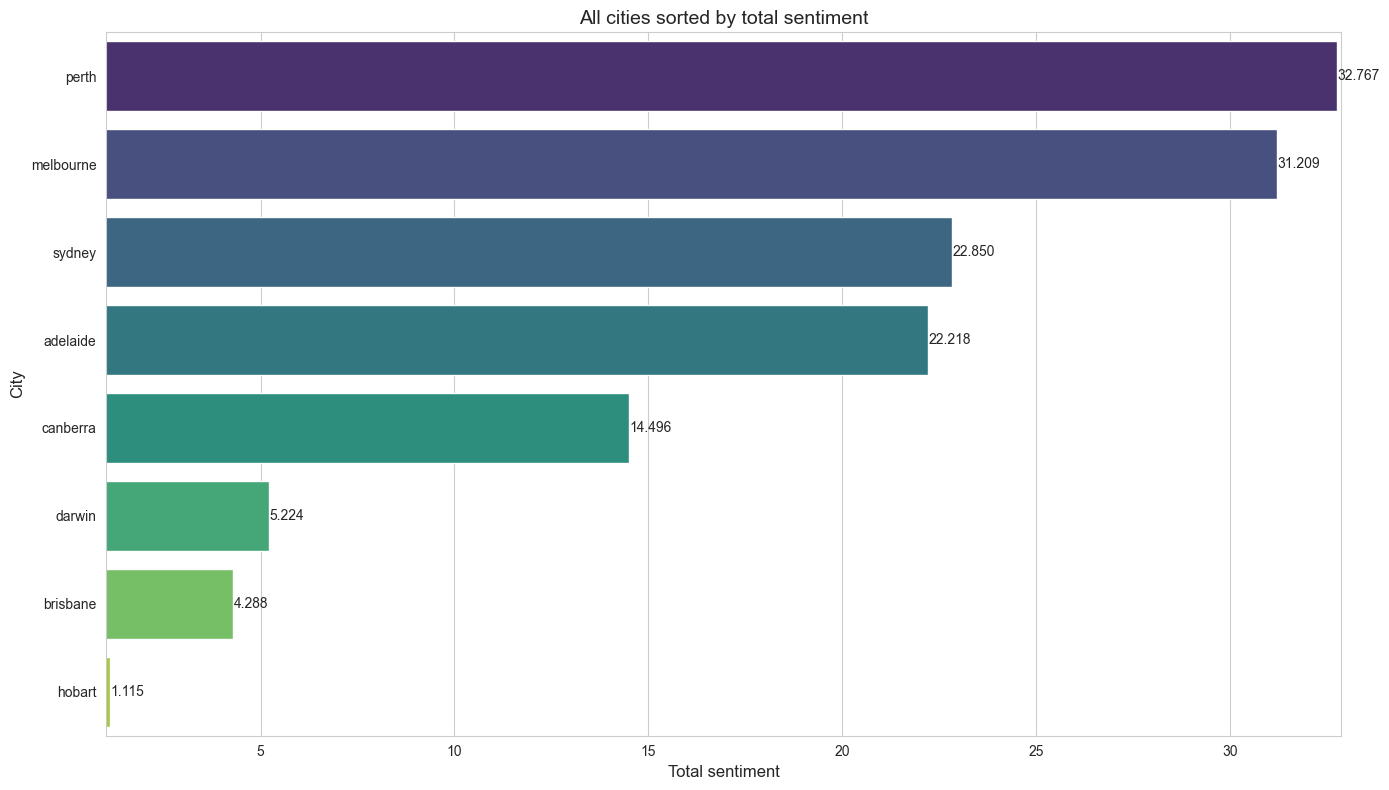

In [266]:
response = requests.get('http://localhost:8080/transportation/sentiment/mastodon')
data = response.json()

# Create DataFrame
df = pd.DataFrame(data['all_cities_total_mastodon'])


print(f"Numbers of city: {data['cities_count_mastodon']}")
print("\nThe city which has the highest total sentiment score:")
display(pd.DataFrame([data['highest_city_total_mastodon']]))  
print("\nThe city which has the lowest total sentiment score:")
display(pd.DataFrame([data['lowest_city_total_mastodon']]))  

# Highest and lowest
plt.figure(figsize=(12, 6))

top_bottom_total = pd.concat([
    pd.DataFrame([data['highest_city_total_mastodon']]), 
    pd.DataFrame([data['lowest_city_total_mastodon']])
])

barplot = sns.barplot(
    x='name', 
    y='total_sentiment_mastodon', 
    data=top_bottom_total,
    palette=['#2ecc71', '#e74c3c']  
)

plt.title('Cities with the highest and lowest total sentiment score', fontsize=14)
plt.xlabel('City', fontsize=12)
plt.ylabel('Total sentiment', fontsize=12)
plt.ylim(min(df['total_sentiment_mastodon']) - 0.1, max(df['total_sentiment_mastodon']) + 0.1)

for p in barplot.patches:
    barplot.annotate(
        format(p.get_height(), '.2f'),  
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center',  
        va='center',  
        xytext=(0, 10),  
        textcoords='offset points'
    )
plt.tight_layout()
plt.show()

# All cities
plt.figure(figsize=(14, 8))

all_cities = sns.barplot(
    x='total_sentiment_mastodon', 
    y='name', 
    data=df.sort_values('total_sentiment_mastodon', ascending=False),
    palette='viridis' 
)

plt.title('All cities sorted by total sentiment', fontsize=14)
plt.xlabel('Total sentiment', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.xlim(min(df['total_sentiment_mastodon']) - 0.1, max(df['total_sentiment_mastodon']) + 0.1)

for p in all_cities.patches:
    width = p.get_width() 
    plt.text(
        width + 0.01,  
        p.get_y() + p.get_height() / 2,  
        f'{width:.3f}',  
        va='center'  
    )

plt.tight_layout() 
plt.show()

#### Reddit
- Average sentiment score

Number of cities: 8

The city which has the highest average sentiment score:


avg_sentiment_reddit  doc_count_reddit      name  total_sentiment_reddit
0              0.342295               120  brisbane                 41.0754


The city which has the lowest average sentiment score:


avg_sentiment_reddit  doc_count_reddit   name  total_sentiment_reddit
0              0.240322               146  perth                  35.087

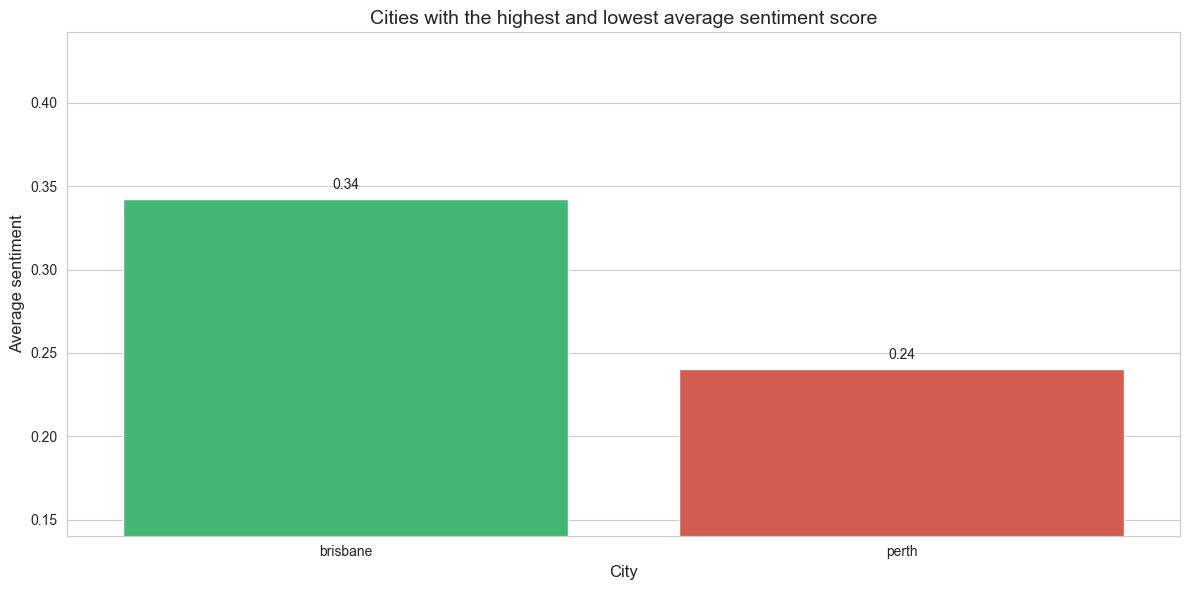

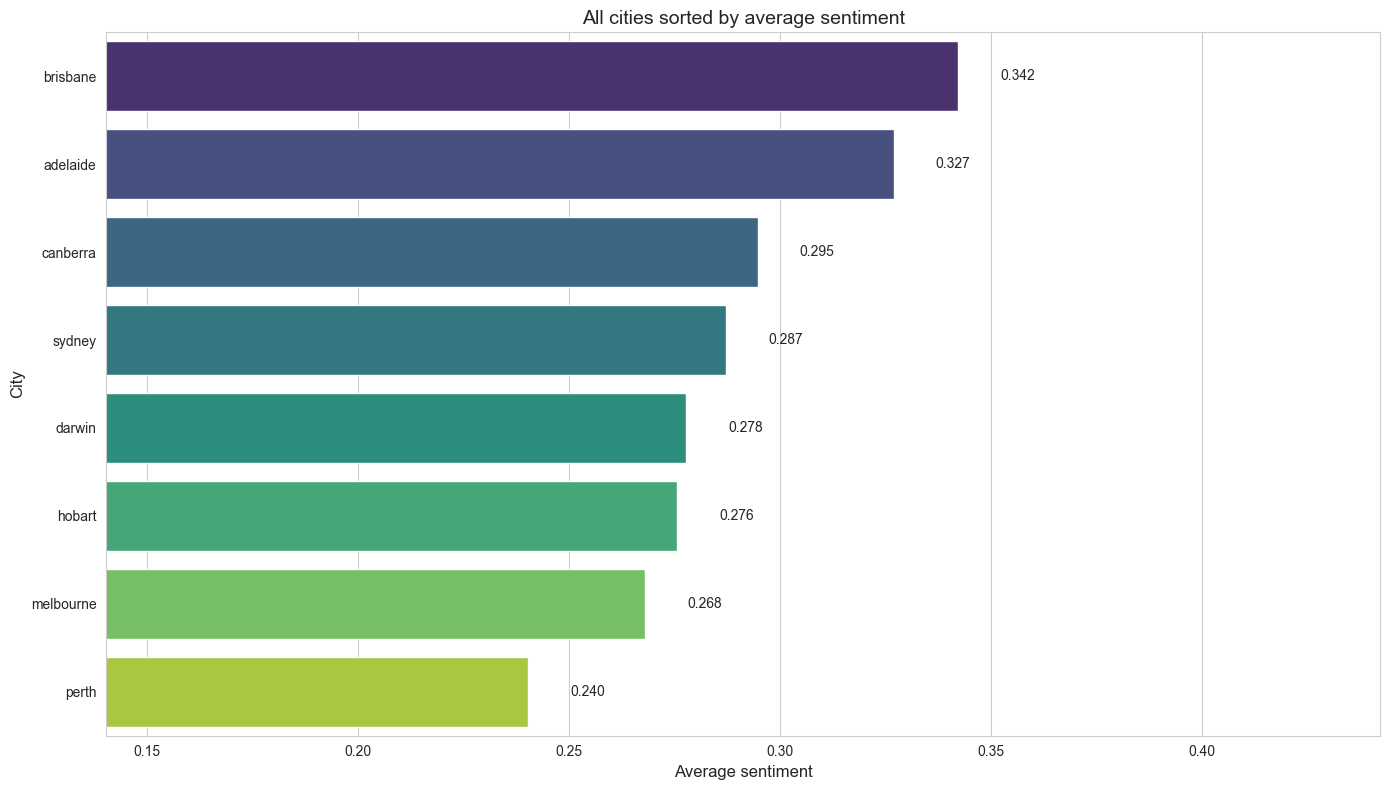

In [268]:
response = requests.get('http://localhost:8080/transportation/sentiment/reddit')
data = response.json()

# Create DataFrame
df = pd.DataFrame(data['all_cities_avg_reddit'])


print(f"Number of cities: {data['cities_count_reddit']}")
print("\nThe city which has the highest average sentiment score:")
display(pd.DataFrame([data['highest_city_avg_reddit']]))  
print("\nThe city which has the lowest average sentiment score:")
display(pd.DataFrame([data['lowest_city_avg_reddit']]))

# Highest and lowest
plt.figure(figsize=(12, 6))

top_bottom_avg = pd.concat([
    pd.DataFrame([data['highest_city_avg_reddit']]), 
    pd.DataFrame([data['lowest_city_avg_reddit']])
])

barplot = sns.barplot(
    x='name', 
    y='avg_sentiment_reddit', 
    data=top_bottom_avg,
    palette=['#2ecc71', '#e74c3c']  
)

plt.title('Cities with the highest and lowest average sentiment score', fontsize=14)
plt.xlabel('City', fontsize=12)
plt.ylabel('Average sentiment', fontsize=12)
plt.ylim(min(df['avg_sentiment_reddit']) - 0.1, max(df['avg_sentiment_reddit']) + 0.1)

for p in barplot.patches:
    barplot.annotate(
        format(p.get_height(), '.2f'),  
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center',  
        va='center', 
        xytext=(0, 10), 
        textcoords='offset points'
    )
plt.tight_layout()
plt.show()

# All cities
plt.figure(figsize=(14, 8))
all_cities = sns.barplot(
    x='avg_sentiment_reddit', 
    y='name', 
    data=df.sort_values('avg_sentiment_reddit', ascending=False), # Descending order
    palette='viridis'  
)

plt.title('All cities sorted by average sentiment', fontsize=14)
plt.xlabel('Average sentiment', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.xlim(min(df['avg_sentiment_reddit']) - 0.1, max(df['avg_sentiment_reddit']) + 0.1)   

for p in all_cities.patches:
    width = p.get_width() 
    plt.text(
        width + 0.01,  
        p.get_y() + p.get_height() / 2,  
        f'{width:.3f}',  
        va='center'  
    )

plt.tight_layout()  
plt.show()

- Total sentiment score

Numbers of city: 8

The city which has the highest total sentiment score:


avg_sentiment_reddit  doc_count_reddit    name  total_sentiment_reddit
0               0.27565               185  hobart               50.995199


The city which has the lowest total sentiment score:


avg_sentiment_reddit  doc_count_reddit       name  total_sentiment_reddit
0              0.268119               102  melbourne                 27.3481

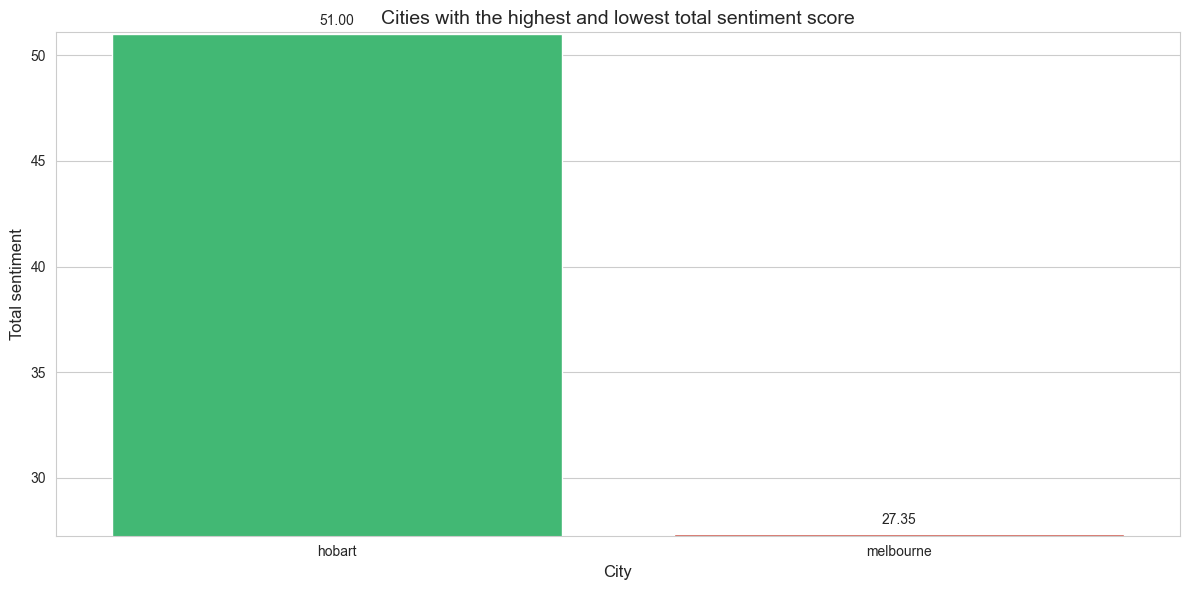

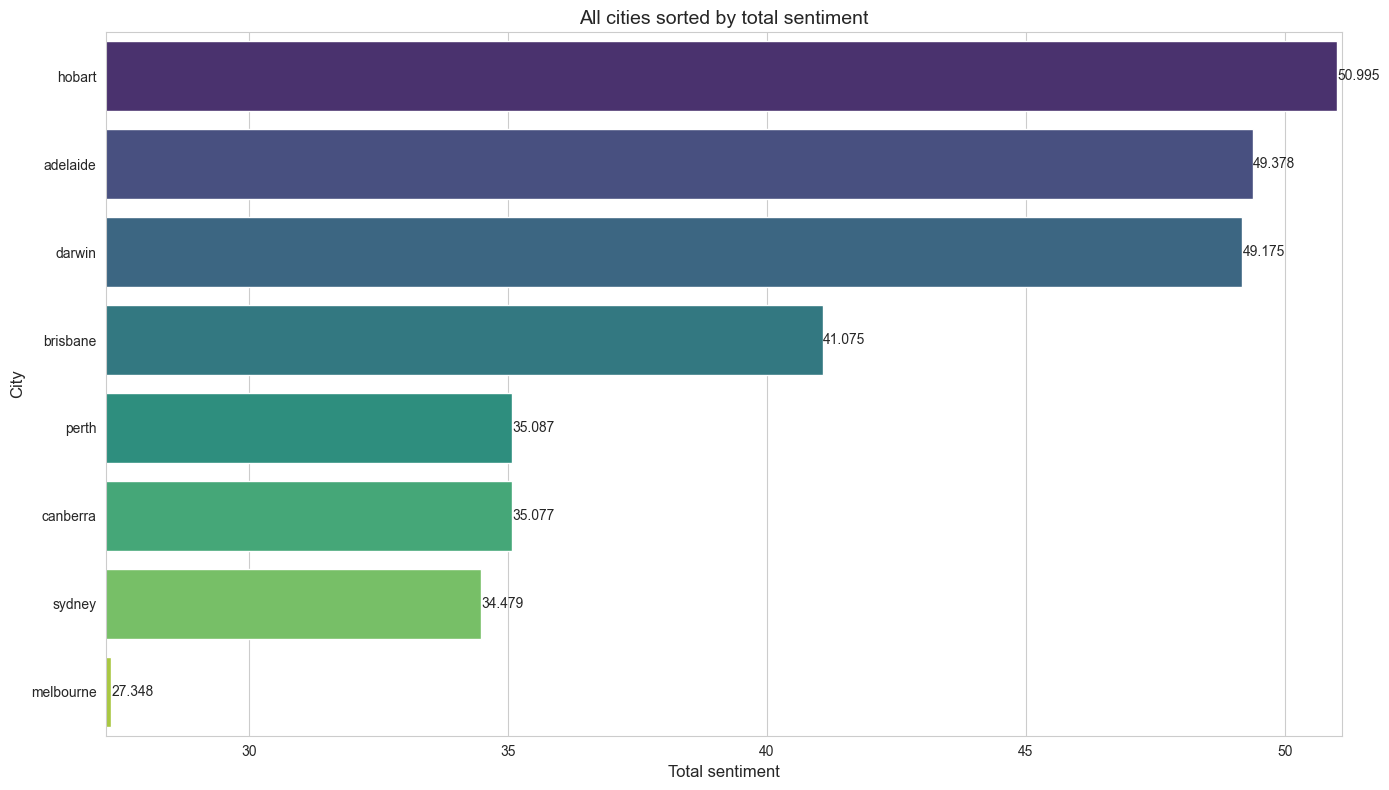

In [270]:
response = requests.get('http://localhost:8080/transportation/sentiment/reddit')
data = response.json()

# Create DataFrame
df = pd.DataFrame(data['all_cities_total_reddit'])


print(f"Numbers of city: {data['cities_count_reddit']}")
print("\nThe city which has the highest total sentiment score:")
display(pd.DataFrame([data['highest_city_total_reddit']]))  
print("\nThe city which has the lowest total sentiment score:")
display(pd.DataFrame([data['lowest_city_total_reddit']]))  

# Highest and lowest
plt.figure(figsize=(12, 6))

top_bottom_total = pd.concat([
    pd.DataFrame([data['highest_city_total_reddit']]), 
    pd.DataFrame([data['lowest_city_total_reddit']])
])

barplot = sns.barplot(
    x='name', 
    y='total_sentiment_reddit', 
    data=top_bottom_total,
    palette=['#2ecc71', '#e74c3c']  
)

plt.title('Cities with the highest and lowest total sentiment score', fontsize=14)
plt.xlabel('City', fontsize=12)
plt.ylabel('Total sentiment', fontsize=12)
plt.ylim(min(df['total_sentiment_reddit']) - 0.1, max(df['total_sentiment_reddit']) + 0.1)

for p in barplot.patches:
    barplot.annotate(
        format(p.get_height(), '.2f'),  
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center',  
        va='center',  
        xytext=(0, 10),  
        textcoords='offset points'
    )
plt.tight_layout()
plt.show()

# All cities
plt.figure(figsize=(14, 8))

all_cities = sns.barplot(
    x='total_sentiment_reddit', 
    y='name', 
    data=df.sort_values('total_sentiment_reddit', ascending=False),
    palette='viridis' 
)

plt.title('All cities sorted by total sentiment', fontsize=14)
plt.xlabel('Total sentiment', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.xlim(min(df['total_sentiment_reddit']) - 0.1, max(df['total_sentiment_reddit']) + 0.1)

for p in all_cities.patches:
    width = p.get_width() 
    plt.text(
        width + 0.01,  
        p.get_y() + p.get_height() / 2,  
        f'{width:.3f}',  
        va='center'  
    )

plt.tight_layout() 
plt.show()